<a href="https://colab.research.google.com/github/leonardosilvamelosantos/DESAFIO-CIENCIAS-DE-DADOS-PUC/blob/main/Desafio_Ciencias_de_Dados_Sociais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/leonardosilvamelosantos/DESAFIO-CIENCIAS-DE-DADOS-PUC.git

Cloning into 'DESAFIO-CIENCIAS-DE-DADOS-PUC'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 27.99 MiB | 15.59 MiB/s, done.


In [2]:

!pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=8c75ab7cfd3bd3404454a005a26ca4a8c568975e50fff381ce7223df85759a75
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [3]:
import pandas as pd
import io
import requests
import statistics
import math
import numpy as np
from scipy import stats

In [4]:
caminho_arquivo = "Dados para competição_V1_PauloFernando/MUNIC_IPMporRaca_20230403.xlsx"
IPMporRaca = pd.read_excel("/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/MUNIC_IPMporRaca_20230403.xlsx");

In [5]:

IPMporRaca.describe

<bound method NDFrame.describe of        cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0      1100015     1  1.058332e+04     7179.226549          1992.031046   
1      1100015     2  1.094002e+03      728.312925           179.740507   
2      1100015     3  9.570439e+01       83.408552             0.000000   
3      1100015     4  1.212225e+04     8958.390641          1716.999407   
4      1100015     5  4.967202e+02      476.883350            19.836875   
...        ...   ...           ...             ...                  ...   
25441  5300108     2  1.941626e+05    19066.992026         19400.368168   
25442  5300108     3  4.267936e+04     2142.805398          3239.454558   
25443  5300108     4  1.250315e+06   114139.044161        120619.822639   
25444  5300108     5  7.070282e+03      353.073977           759.558019   
25445  5300108     9  8.536041e+02        0.000000           194.986348   

       qtd_pes_pob_vul       qtd_0a11  qtd_0a11_pobres  qtd_0a11_

In [6]:
municipios = pd.read_excel("/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/MunicipioBrasil_20230102.xlsx")


In [7]:
municipios.describe

<bound method NDFrame.describe of       cod_mun                nom_mun  cod_regiao  cod_uf   qtd_dom  \
0     1100015  Alta Floresta D'Oeste           1      11    7443.0   
1     1100023              Ariquemes           1      11   27654.0   
2     1100031                 Cabixi           1      11    1979.0   
3     1100049                 Cacoal           1      11   24413.0   
4     1100056             Cerejeiras           1      11    5399.0   
...       ...                    ...         ...     ...       ...   
5560  5222005             Vianópolis           5      52    4038.0   
5561  5222054         Vicentinópolis           5      52    2402.0   
5562  5222203               Vila Boa           5      52    1418.0   
5563  5222302          Vila Propício           5      52    1609.0   
5564  5300108               Brasília           5      53  785733.0   

      qtd_dom_pobres  qtd_dom_vulneraveis  qtd_dom_pob_vul    qtd_pes  \
0        4815.110866          1378.041441      6193.

In [8]:
importa = pd.read_csv("/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/MUNIC_IPMporSexoRaca_20230403.csv", on_bad_lines='skip')

<ipython-input-8-b10c970313d7>:1: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  importa = pd.read_csv("/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/MUNIC_IPMporSexoRaca_20230403.csv", on_bad_lines='skip')


In [9]:
importa.describe


<bound method NDFrame.describe of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       cod_mun;sxraca;qtd_pessoas;qtd_pes_pobres;qtd_pes_vulneraveis;qtd_pes_pob_vul;qtd_0a11;qtd_0a11_pobres;qtd_0a11_vulneraveis;qtd_0a11_pob_vul;incidencia;intensidade;IPM;qtd_pes_E1;qtd_pes_E2;qtd_pes_E3;qtd_pes_S1;qtd_pes_S2;qtd_pes_S3;qtd_pes_S4;qtd_pes_T1;qtd_pes_T2;qtd_pes_T3;qtd_pes_P1;qtd_pes_P2;qtd_pes_P3;qtd_pes_P

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


dados = pd.read_excel('/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/MUNIC_IPMporRaca_20230403.xlsx')


X = dados[['qtd_pessoas', 'qtd_pes_pobres', 'qtd_pes_vulneraveis']]
y = dados['qtd_pes_pobres']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo = LinearRegression()
modelo.fit(X_train, y_train)
coeficientes = modelo.coef_


y_pred = modelo.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro quadrático médio (MSE): {mse}')
print(f'R-quadrado (R^2): {r2}')

Erro quadrático médio (MSE): 6.83395695784268e-23
R-quadrado (R^2): 1.0


In [11]:
warnings.filterwarnings("ignore", category=FutureWarning)


dados = pd.read_excel('/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/MUNIC_IPMporRaca_20230403.xlsx')


X = dados[['qtd_pessoas', 'qtd_pes_pobres', 'qtd_pes_vulneraveis']]
y = dados['qtd_pes_pobres']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo = LinearRegression()
modelo.fit(X_train, y_train)
coeficientes = modelo.coef_


y_pred = modelo.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro quadrático médio (MSE): {mse}')
print(f'R-quadrado (R^2): {r2}')

Erro quadrático médio (MSE): 6.83395695784268e-23
R-quadrado (R^2): 1.0


In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


modelo = RandomForestRegressor(dados)
modelo = RandomForestRegressor(n_estimators=100)
modelo.fit(X_train, y_train)

# Calcular a importância das características
resultado = permutation_importance(modelo, X_test, y_test, n_repeats=30, random_state=0)
importancias = resultado.importances_mean

print(f'resultado: {resultado}')
print(f'importancia: {importancias}')

resultado: {'importances_mean': array([-3.61011391e-05,  1.90972117e+00,  1.32572734e-03]), 'importances_std': array([1.14810402e-05, 2.65857077e-02, 2.24557354e-04]), 'importances': array([[-3.86628003e-05, -3.86843334e-05, -3.86870182e-05,
        -3.51928115e-05, -3.86659838e-05, -3.86798424e-05,
        -3.86817722e-05, -3.86844854e-05, -3.86818224e-05,
        -3.40645138e-05, -3.86994300e-05, -3.86824652e-05,
        -3.86725883e-05, -3.86361865e-05, -3.86812894e-05,
        -3.28367168e-05,  2.52436095e-05, -3.86363187e-05,
        -3.86817179e-05, -3.86815642e-05, -3.86825790e-05,
        -3.88067087e-05, -3.86817324e-05, -3.87001838e-05,
        -3.86798643e-05, -3.86812665e-05, -3.87583761e-05,
        -3.87462008e-05, -3.89579474e-05, -3.86892636e-05],
       [ 1.90903660e+00,  1.93226362e+00,  1.91754285e+00,
         1.86738552e+00,  1.93233921e+00,  1.90989701e+00,
         1.90623746e+00,  1.91751245e+00,  1.89609271e+00,
         1.89911635e+00,  1.91536016e+00,  1.9183

In [13]:
df = pd.DataFrame(IPMporRaca)
df.describe

<bound method NDFrame.describe of        cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0      1100015     1  1.058332e+04     7179.226549          1992.031046   
1      1100015     2  1.094002e+03      728.312925           179.740507   
2      1100015     3  9.570439e+01       83.408552             0.000000   
3      1100015     4  1.212225e+04     8958.390641          1716.999407   
4      1100015     5  4.967202e+02      476.883350            19.836875   
...        ...   ...           ...             ...                  ...   
25441  5300108     2  1.941626e+05    19066.992026         19400.368168   
25442  5300108     3  4.267936e+04     2142.805398          3239.454558   
25443  5300108     4  1.250315e+06   114139.044161        120619.822639   
25444  5300108     5  7.070282e+03      353.073977           759.558019   
25445  5300108     9  8.536041e+02        0.000000           194.986348   

       qtd_pes_pob_vul       qtd_0a11  qtd_0a11_pobres  qtd_0a11_

In [14]:
dados_branco = df[df['raca'] == 1]



In [158]:
dados_preto = df[df['raca'] == 2]


In [16]:
dados_pardo = df[df['raca'] == 4]

In [17]:
dados_amarelo = df[df['raca'] == 3]

In [18]:
dados_indigena = df[df['raca'] == 5]

In [19]:
quantidade_total_pessoas = df['qtd_pessoas'].sum()
print(quantidade_total_pessoas)

190755798.9999997


In [160]:
import pandas as pd

# Converter a coluna 'incidencia' para tipo numérico
dados_branco['incidencia'] = pd.to_numeric(dados_branco['incidencia'], errors='coerce')
dados_pardo['incidencia'] = pd.to_numeric(dados_pardo['incidencia'], errors='coerce')
dados_preto['incidencia'] = pd.to_numeric(dados_preto['incidencia'], errors='coerce')
dados_amarelo['incidencia'] = pd.to_numeric(dados_amarelo['incidencia'], errors='coerce')
dados_indigena['incidencia'] = pd.to_numeric(dados_indigena['incidencia'], errors='coerce')

# Calcular a média de incidência para cada grupo
media_incidencia_branco = dados_branco['incidencia'].mean()
media_incidencia_pardo = dados_pardo['incidencia'].mean()
media_incidencia_negro = dados_preto['incidencia'].mean()
media_incidencia_amarelo = dados_amarelo['incidencia'].mean()
media_incidencia_indigena = dados_indigena['incidencia'].mean()

print("Média de Incidência de Pobreza para o Grupo Branco:", media_incidencia_branco)
print("Média de Incidência de Pobreza para o Grupo Pardo:", media_incidencia_pardo)
print("Média de Incidência de Pobreza para o Grupo Negro:", media_incidencia_negro)
print("Média de Incidência de Pobreza para o Grupo Amarelo:", media_incidencia_amarelo)
print("Média de Incidência de Pobreza para o Grupo Indígena:", media_incidencia_indigena)

Média de Incidência de Pobreza para o Grupo Branco: 35.16155505369646
Média de Incidência de Pobreza para o Grupo Pardo: 42.21583205563428
Média de Incidência de Pobreza para o Grupo Negro: 50.7367495017304
Média de Incidência de Pobreza para o Grupo Amarelo: 37.27749439058363
Média de Incidência de Pobreza para o Grupo Indígena: 37.28908764426099


In [161]:
import pandas as pd

# Converter a coluna 'intensidade' para tipo numérico
dados_branco['intensidade'] = pd.to_numeric(dados_branco['intensidade'], errors='coerce')
dados_pardo['intensidade'] = pd.to_numeric(dados_pardo['intensidade'], errors='coerce')
dados_preto['intensidade'] = pd.to_numeric(dados_preto['intensidade'], errors='coerce')
dados_amarelo['intensidade'] = pd.to_numeric(dados_amarelo['intensidade'], errors='coerce')
dados_indigena['intensidade'] = pd.to_numeric(dados_indigena['intensidade'], errors='coerce')

# Calcular a média de intensidade para cada grupo
media_intensidade_branco = dados_branco['intensidade'].mean()
media_intensidade_pardo = dados_pardo['intensidade'].mean()
media_intensidade_preto = dados_preto['intensidade'].mean()
media_intensidade_amarelo = dados_amarelo['intensidade'].mean()
media_intensidade_indigena = dados_indigena['intensidade'].mean()

print("Média de Intensidade para o Grupo Branco:", media_intensidade_branco)
print("Média de Intensidade para o Grupo Pardo:", media_intensidade_pardo)
print("Média de Intensidade para o Grupo Preto:", media_intensidade_preto)
print("Média de Intensidade para o Grupo Amarelo:", media_intensidade_amarelo)
print("Média de Intensidade para o Grupo Indígena:", media_intensidade_indigena)


Média de Intensidade para o Grupo Branco: 41.38710798168035
Média de Intensidade para o Grupo Pardo: 42.3711038587893
Média de Intensidade para o Grupo Preto: 42.06249955191038
Média de Intensidade para o Grupo Amarelo: 42.04926620663882
Média de Intensidade para o Grupo Indígena: 43.26596492892076


In [20]:
quantidade_total_pessoas_brancas = int(dados_branco['qtd_pessoas'].sum())
print("A quantidade total de brancos é:", quantidade_total_pessoas_brancas)

quantidade_total_pessoas_pretas = int(dados_preto['qtd_pessoas'].sum())
print("A quantidade total de negros é:", quantidade_total_pessoas_pretas)

quantidade_total_pessoas_pardo = int(dados_pardo['qtd_pessoas'].sum())
print("A quantidade total de pardos é:", quantidade_total_pessoas_pardo)

quantidade_total_pessoas_amarelo = int(dados_amarelo['qtd_pessoas'].sum())
print("A quantidade total de amarelos é:", quantidade_total_pessoas_amarelo)

quantidade_total_pessoas_indigenas = int(dados_indigena['qtd_pessoas'].sum())
print("A quantidade total de indígenas é:", quantidade_total_pessoas_indigenas)

print("A quantidade total de pessoas destas raças= 190755799")

A quantidade total de brancos é: 90621281
A quantidade total de negros é: 14351162
A quantidade total de pardos é: 82820451
A quantidade total de amarelos é: 2105352
A quantidade total de indígenas é: 821500
A quantidade total de pessoas destas raças= 190755799


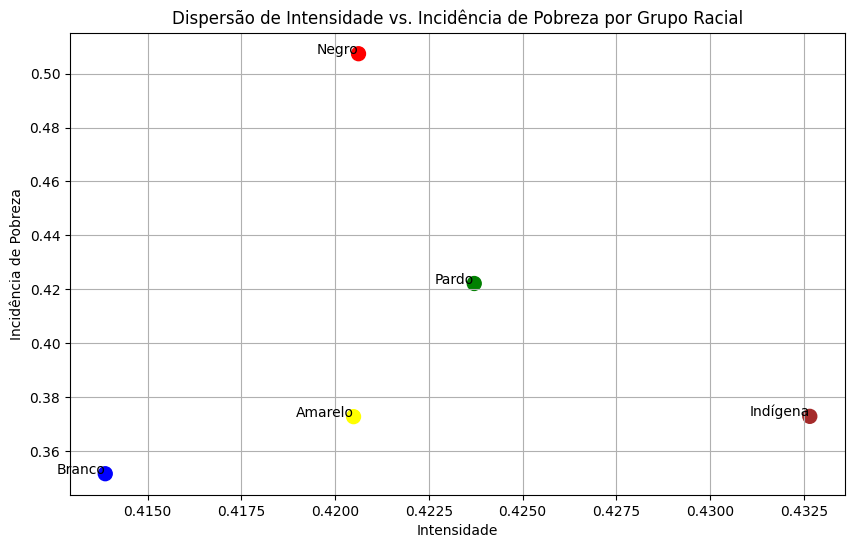

In [164]:
import matplotlib.pyplot as plt

# Dados das médias de incidência e intensidade por grupo racial
racas = ['Branco', 'Pardo', 'Negro', 'Amarelo', 'Indígena']
# Dados das médias de incidência e intensidade por grupo racial (divididos por 100)
incidencia = [35.16155505369646 / 100, 42.21583205563428 / 100, 50.7367495017304 / 100, 37.27749439058363 / 100, 37.28908764426099 / 100]
intensidade = [41.38710798168035 / 100, 42.3711038587893 / 100, 42.06249955191038 / 100, 42.04926620663882 / 100, 43.26596492892076 / 100]


# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))

# Cores para cada grupo racial
cores = ['blue', 'green', 'red', 'yellow', 'brown']

# Plotar os pontos de dispersão
plt.scatter(intensidade, incidencia, c=cores, marker='o', s=100)

# Adicionar rótulos aos pontos
for i in range(len(racas)):
    plt.annotate(racas[i], (intensidade[i], incidencia[i]), fontsize=10, ha='right')

# Rótulos dos eixos
plt.xlabel('Intensidade')
plt.ylabel('Incidência de Pobreza')

# Título do gráfico
plt.title('Dispersão de Intensidade vs. Incidência de Pobreza por Grupo Racial')

# Exibir o gráfico
plt.grid()
plt.show()


In [21]:
# Supondo que você já calculou as quantidades totais de cada raça e a quantidade total de pessoas
quantidade_total_pessoas = 190755799  # Total de pessoas

# Cálculo das porcentagens
porcentagem_brancos = (quantidade_total_pessoas_brancas / quantidade_total_pessoas) * 100
porcentagem_negros = (quantidade_total_pessoas_pretas / quantidade_total_pessoas) * 100
porcentagem_pardos = (quantidade_total_pessoas_pardo / quantidade_total_pessoas) * 100
porcentagem_amarelos = (quantidade_total_pessoas_amarelo / quantidade_total_pessoas) * 100
porcentagem_indigenas = (quantidade_total_pessoas_indigenas / quantidade_total_pessoas) * 100

# Exibindo as porcentagens
print("Porcentagem de brancos:", porcentagem_brancos, "%")
print("Porcentagem de negros:", porcentagem_negros, "%")
print("Porcentagem de pardos:", porcentagem_pardos, "%")
print("Porcentagem de amarelos:", porcentagem_amarelos, "%")
print("Porcentagem de indígenas:", porcentagem_indigenas, "%")


Porcentagem de brancos: 47.50643570211986 %
Porcentagem de negros: 7.52331623742668 %
Porcentagem de pardos: 43.41700301336579 %
Porcentagem de amarelos: 1.1036896445806086 %
Porcentagem de indígenas: 0.43065532178133153 %


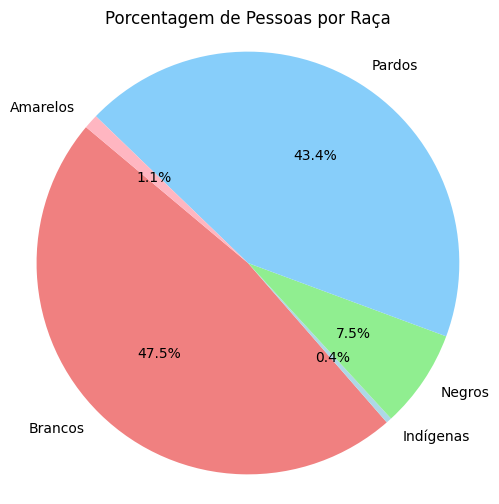

In [22]:
import matplotlib.pyplot as plt

# Dados
porcentagens = [47.50643570211986,0.43065532178133153, 7.52331623742668, 43.41700301336579, 1.1036896445806086, ]
racas = ['Brancos','Indígenas', 'Negros', 'Pardos', 'Amarelos', ]

# Cores
cores = ['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue', 'lightpink']

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(porcentagens, labels=racas, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Pessoas por Raça')
plt.axis('equal')  # Mantém o aspecto circular do gráfico

# Exibição do gráfico
plt.show()


In [23]:
# Suponha que você já tenha calculado a quantidade total de brancos com base em 'qtd_pessoas'
quantidade_total_pessoas_brancas = int(dados_branco['qtd_pessoas'].sum())

# Agora, para somar 'qtd_pes_pobres' dos brancos
quantidade_total_pobres_brancos = int(dados_branco['qtd_pes_pobres'].sum())

print("A quantidade total de brancos é:", quantidade_total_pessoas_brancas)
print("A quantidade total de brancos pobres é:", quantidade_total_pobres_brancos)


A quantidade total de brancos é: 90621281
A quantidade total de brancos pobres é: 13556547


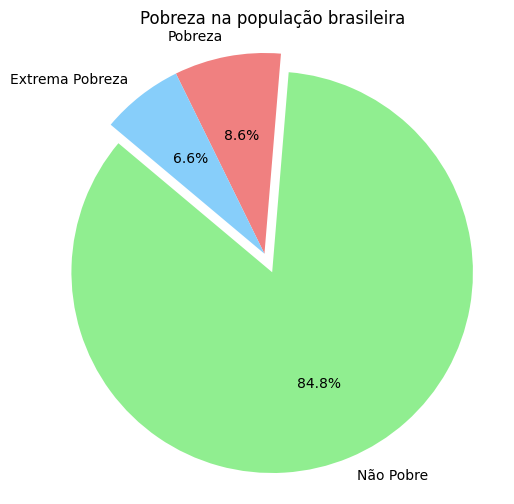

In [24]:


# Valores fornecidos
pobreza = 15.2
extrema_pobreza = 6.62
nao_pobre = 100 - pobreza

# Rótulos para as fatias
labels = ['Não Pobre', 'Pobreza', 'Extrema Pobreza']

# Valores correspondentes
sizes = [nao_pobre, pobreza - extrema_pobreza, extrema_pobreza]

# Cores das fatias
colors = ['lightgreen', 'lightcoral', 'lightskyblue']

# Explode a fatia 'Pobreza' para enfatizá-la
explode = (0.1, 0, 0)

# Cria o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)

# Adicione um título
plt.title('Pobreza na população brasileira')

# Mostra o gráfico
plt.axis('equal')  # Equal aspect ratio garante que a pizza seja circular.
plt.show()


pobres brancos: 13556547.173950909
total de brancos 90621281.1286329
branco rico 77064733.95468199


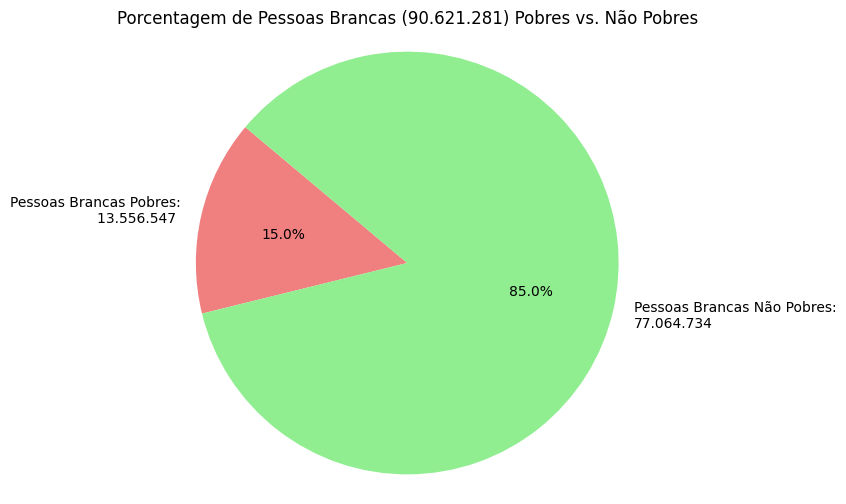

In [25]:


# Dados
quantidade_total_pessoas_brancas = (dados_branco['qtd_pessoas'].sum())
quantidade_total_pobres_brancos = (dados_branco['qtd_pes_pobres'].sum())

# Porcentagem de pessoas brancas pobres em relação ao total de pessoas brancas
porcentagem_brancos_pobres = (quantidade_total_pobres_brancos / quantidade_total_pessoas_brancas) * 100

# Porcentagem de pessoas brancas que não são pobres
porcentagem_brancos_nao_pobres = 100 - porcentagem_brancos_pobres

# Rótulos para o gráfico
labels = 'Pessoas Brancas Pobres:\n13.556.547 ', 'Pessoas Brancas Não Pobres:\n77.064.734'

# Dados para o gráfico
sizes = [porcentagem_brancos_pobres, porcentagem_brancos_nao_pobres]

# Cores
cores = ['lightcoral', 'lightgreen']

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Pessoas Brancas (90.621.281) Pobres vs. Não Pobres')
plt.axis('equal')  # Mantém o aspecto circular do gráfico

print("pobres brancos:", quantidade_total_pobres_brancos)
print("total de brancos",quantidade_total_pessoas_brancas)
print("branco rico",quantidade_total_pessoas_brancas-quantidade_total_pobres_brancos)




pobres negros: 3844309
total de negros 14351162
preto rico 10506853


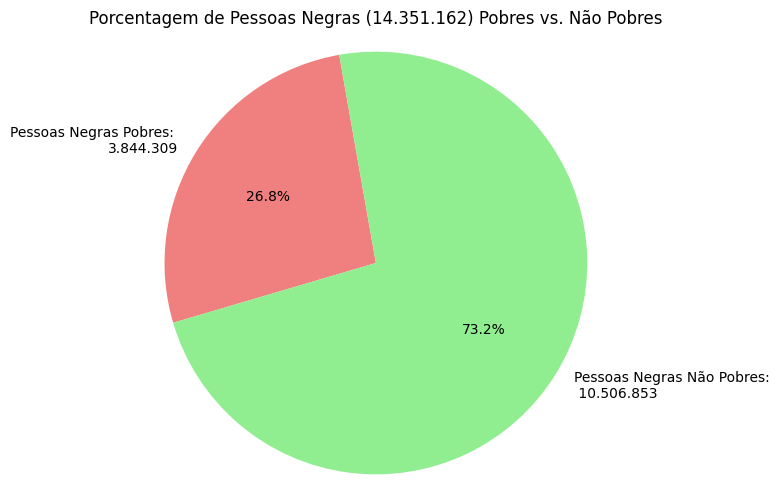

In [26]:


# Dados
quantidade_total_pessoas_negras = int(dados_preto['qtd_pessoas'].sum())
quantidade_total_pobres_negras = int(dados_preto['qtd_pes_pobres'].sum())

# Porcentagem de pessoas negras pobres em relação ao total de pessoas negras
porcentagem_negras_pobres = (quantidade_total_pobres_negras / quantidade_total_pessoas_negras) * 100

# Porcentagem de pessoas negras que não são pobres
porcentagem_negras_nao_pobres = 100 - porcentagem_negras_pobres

# Rótulos para o gráfico
labels = 'Pessoas Negras Pobres: \n3.844.309', 'Pessoas Negras Não Pobres:\n 10.506.853'

# Dados para o gráfico
sizes = [porcentagem_negras_pobres, porcentagem_negras_nao_pobres]

# Cores
cores = ['lightcoral', 'lightgreen']

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=100)
plt.title('Porcentagem de Pessoas Negras (14.351.162) Pobres vs. Não Pobres')
plt.axis('equal')  # Mantém o aspecto circular do gráfico

print("pobres negros:", quantidade_total_pobres_negras)
print("total de negros",quantidade_total_pessoas_negras)
print("preto rico",quantidade_total_pessoas_negras-quantidade_total_pobres_negras)
# Exibição do gráfico
plt.show()




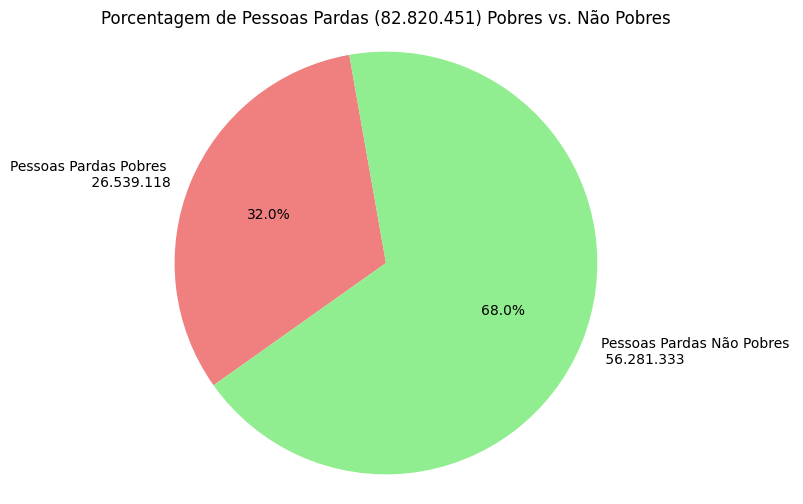

pobres pardos: 26539118
total de pardos 82820451
pardo rico 56281333


In [27]:
# Dados
quantidade_total_pessoas_pardas = int(dados_pardo['qtd_pessoas'].sum())
quantidade_total_pobres_pardas = int(dados_pardo['qtd_pes_pobres'].sum())

# Porcentagem de pessoas pardas pobres em relação ao total de pessoas pardas
porcentagem_pardas_pobres = (quantidade_total_pobres_pardas / quantidade_total_pessoas_pardas) * 100

# Porcentagem de pessoas pardas que não são pobres
porcentagem_pardas_nao_pobres = 100 - porcentagem_pardas_pobres

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
labels = 'Pessoas Pardas Pobres \n 26.539.118', 'Pessoas Pardas Não Pobres \n 56.281.333'
sizes = [porcentagem_pardas_pobres, porcentagem_pardas_nao_pobres]
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=100)
plt.title('Porcentagem de Pessoas Pardas (82.820.451) Pobres vs. Não Pobres')
plt.axis('equal')
plt.show()

print("pobres pardos:", quantidade_total_pobres_pardas)
print("total de pardos",quantidade_total_pessoas_pardas)
print("pardo rico",quantidade_total_pessoas_pardas-quantidade_total_pobres_pardas)


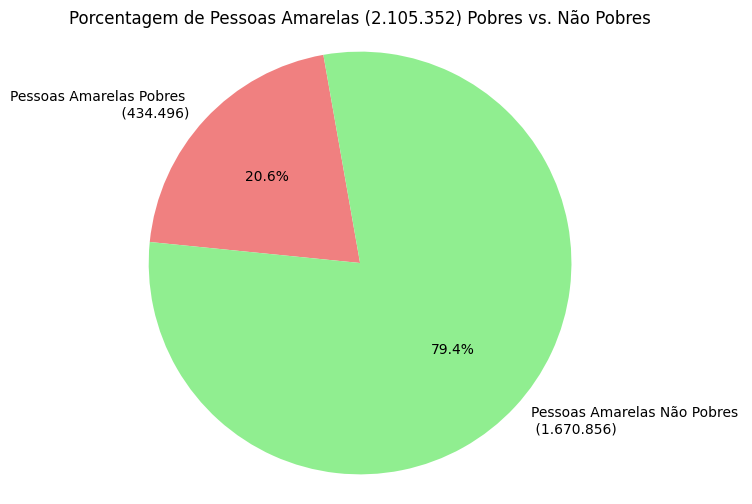

pobres amarelos: 434496
total de amarelos 2105352
amarelos rico 1670856


In [28]:
# Dados
quantidade_total_pessoas_amarelas = int(dados_amarelo['qtd_pessoas'].sum())
quantidade_total_pobres_amarelas = int(dados_amarelo['qtd_pes_pobres'].sum())

# Porcentagem de pessoas amarelas pobres em relação ao total de pessoas amarelas
porcentagem_amarelas_pobres = (quantidade_total_pobres_amarelas / quantidade_total_pessoas_amarelas) * 100

# Porcentagem de pessoas amarelas que não são pobres
porcentagem_amarelas_nao_pobres = 100 - porcentagem_amarelas_pobres

cores = ['lightcoral', 'lightgreen']
# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
labels = 'Pessoas Amarelas Pobres \n (434.496)', 'Pessoas Amarelas Não Pobres \n (1.670.856)'
sizes = [porcentagem_amarelas_pobres, porcentagem_amarelas_nao_pobres]
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=100)
plt.title('Porcentagem de Pessoas Amarelas (2.105.352) Pobres vs. Não Pobres')
plt.axis('equal')
plt.show()

print("pobres amarelos:", quantidade_total_pobres_amarelas)
print("total de amarelos",quantidade_total_pessoas_amarelas)
print("amarelos rico",quantidade_total_pessoas_amarelas-quantidade_total_pobres_amarelas)

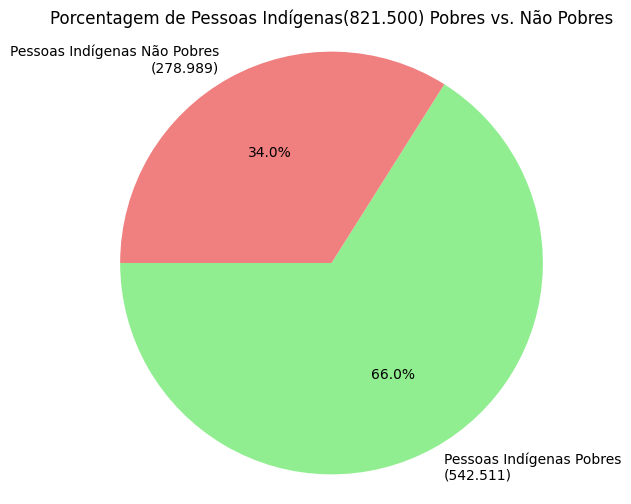

pobres indigenas: 542511
total de indigenas 821500
indigenas rico 278989


In [29]:
# Dados
quantidade_total_pessoas_indigenas = int(dados_indigena['qtd_pessoas'].sum())
quantidade_total_pobres_indigenas = int(dados_indigena['qtd_pes_pobres'].sum())

# Porcentagem de pessoas indígenas pobres em relação ao total de pessoas indígenas
porcentagem_indigenas_pobres = (quantidade_total_pobres_indigenas / quantidade_total_pessoas_indigenas) * 100

# Porcentagem de pessoas indígenas que não são pobres
porcentagem_indigenas_nao_pobres = 100 - porcentagem_indigenas_pobres

cores_invertidas = ['lightgreen', 'lightcoral']

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
labels = 'Pessoas Indígenas Pobres\n(542.511)', 'Pessoas Indígenas Não Pobres\n(278.989)'
sizes = [porcentagem_indigenas_pobres, porcentagem_indigenas_nao_pobres]
plt.pie(sizes, labels=labels, colors=cores_invertidas, autopct='%1.1f%%', startangle=180)
plt.title('Porcentagem de Pessoas Indígenas(821.500) Pobres vs. Não Pobres')
plt.axis('equal')
plt.show()


print("pobres indigenas:", quantidade_total_pobres_indigenas)
print("total de indigenas",quantidade_total_pessoas_indigenas)
print("indigenas rico",quantidade_total_pessoas_indigenas-quantidade_total_pobres_indigenas)

In [30]:
IPMporSEXO = pd.read_excel("/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/MUNIC_IPMporSexo_20230403.xlsx")

In [31]:
IPMporSEXO.describe

<bound method NDFrame.describe of        cod_mun  sexo  qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0      1100015     1      12656.0     9234.796745          1827.226063   
1      1100015     2      11736.0     8191.425273          2081.381772   
2      1100023     1      45543.0    22768.166964          9587.697225   
3      1100023     2      44810.0    21404.689853          9840.558146   
4      1100031     1       3266.0     2338.226108           621.726135   
...        ...   ...          ...             ...                  ...   
11125  5222203     2       2147.0      830.472469           440.849704   
11126  5222302     1       2689.0     1340.085346           558.063419   
11127  5222302     2       2456.0     1207.431386           480.863554   
11128  5300108     1    1228880.0    91001.245116        100726.845227   
11129  5300108     2    1341280.0    90126.369498        103421.254122   

       qtd_pes_pob_vul       qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis 

In [32]:

dados = pd.DataFrame(IPMporSEXO)

# Filtrar os dados por sexo masculino (sexo = 1) e sexo feminino (sexo = 2).
dados_masculino = dados[dados['sexo'] == 1]
dados_feminino = dados[dados['sexo'] == 2]

# Calcular a soma total de pessoas, pessoas pobres e pessoas vulneráveis para cada sexo.
total_masculino = dados_masculino['qtd_pessoas'].sum()
total_feminino = dados_feminino['qtd_pessoas'].sum()

total_pobres_masculino = dados_masculino['qtd_pes_pobres'].sum()
total_pobres_feminino = dados_feminino['qtd_pes_pobres'].sum()

total_vulneraveis_masculino = dados_masculino['qtd_pes_vulneraveis'].sum()
total_vulneraveis_feminino = dados_feminino['qtd_pes_vulneraveis'].sum()

# Calcular a proporção de pessoas pobres e vulneráveis em relação ao sexo.
proporcao_pobres_masculino = total_pobres_masculino / total_masculino
proporcao_pobres_feminino = total_pobres_feminino / total_feminino

proporcao_vulneraveis_masculino = total_vulneraveis_masculino / total_masculino
proporcao_vulneraveis_feminino = total_vulneraveis_feminino / total_feminino

# Calcular as disparidades de gênero.
disparidade_pobreza = proporcao_pobres_feminino - proporcao_pobres_masculino
disparidade_vulnerabilidade = proporcao_vulneraveis_feminino - proporcao_vulneraveis_masculino

print("Disparidade de Pobreza entre Gêneros:", disparidade_pobreza)
print("Disparidade de Vulnerabilidade entre Gêneros:", disparidade_vulnerabilidade)
print("proporão pobres femininos", proporcao_pobres_feminino)
print("proporão pobres masculino", proporcao_pobres_masculino)
print("proporão vulneraveis femininos", proporcao_vulneraveis_feminino)
print("proporão vulneraveis masculino", proporcao_vulneraveis_masculino)


Disparidade de Pobreza entre Gêneros: -0.023037534424451778
Disparidade de Vulnerabilidade entre Gêneros: -0.00353321857431671
proporão pobres femininos 0.22419460662816212
proporão pobres masculino 0.2472321410526139
proporão vulneraveis femininos 0.13044216284225604
proporão vulneraveis masculino 0.13397538141657275


In [33]:
# Calculando total de pessoas de cada sexo
total_masculino = dados_masculino['qtd_pessoas'].sum()
total_feminino = dados_feminino['qtd_pessoas'].sum()
print(total_masculino)
print(total_feminino)

93406989.99999996
97348809.00000009


In [34]:
# Totais de pessoas por sexo
masculino_total = 93406989.99999996
feminino_total = 97348809.00000009

# Proporções de pobreza e vulnerabilidade
proporcao_pobres_femininos = 0.22419460662816212
proporcao_pobres_masculinos = 0.2472321410526139
proporcao_vulneraveis_femininos = 0.13044216284225604
proporcao_vulneraveis_masculinos = 0.13397538141657275

# Cálculo do número de pessoas pobres por sexo
qtd_pobres_femininos = proporcao_pobres_femininos * feminino_total
qtd_pobres_masculinos = proporcao_pobres_masculinos * masculino_total

# Cálculo do número de pessoas vulneráveis por sexo
qtd_vulneraveis_femininos = proporcao_vulneraveis_femininos * feminino_total
qtd_vulneraveis_masculinos = proporcao_vulneraveis_masculinos * masculino_total

# Cálculo das disparidades reais de pobreza e vulnerabilidade
disparidade_pobreza_real = (qtd_pobres_femininos / feminino_total) - (qtd_pobres_masculinos / masculino_total)
disparidade_vulnerabilidade_real = (qtd_vulneraveis_femininos / feminino_total) - (qtd_vulneraveis_masculinos / masculino_total)

# Imprimindo os resultados
print("Disparidade de Pobreza (Real):", disparidade_pobreza_real)
print("Disparidade de Vulnerabilidade (Real):", disparidade_vulnerabilidade_real)
print("Quantidade de Mulheres Pobres:", qtd_pobres_femininos)
print("Quantidade de Homens Pobres:",qtd_pobres_masculinos)
print("Quantidade de Mulheres Vulneraveis:",qtd_vulneraveis_femininos)
print("Quantidade de Homens Vulneraveis:",qtd_vulneraveis_masculinos)

Disparidade de Pobreza (Real): -0.023037534424451778
Disparidade de Vulnerabilidade (Real): -0.00353321857431671
Quantidade de Mulheres Pobres: 21825077.939475108
Quantidade de Homens Pobres: 23093210.126980085
Quantidade de Mulheres Vulneraveis: 12698389.196077693
Quantidade de Homens Vulneraveis: 12514237.11222399


In [35]:
# Resultados originais
disparidade_pobreza_real = -0.023037534424451778
disparidade_vulnerabilidade_real = -0.00353321857431671
qtd_pobres_femininos = 21825077.939475108
qtd_pobres_masculinos = 23093210.126980085
qtd_vulneraveis_femininos = 12698389.196077693
qtd_vulneraveis_masculinos = 12514237.11222399

# Resultados originais
disparidade_pobreza_real = -0.023037534424451778
disparidade_vulnerabilidade_real = -0.00353321857431671

# Transformando em porcentagens
disparidade_pobreza_real_percent = disparidade_pobreza_real * 100
disparidade_vulnerabilidade_real_percent = disparidade_vulnerabilidade_real * 100

# Imprimindo os resultados transformados em porcentagens
print("Disparidade de Pobreza (Real):", disparidade_pobreza_real_percent, "%")
print("Disparidade de Vulnerabilidade (Real):", disparidade_vulnerabilidade_real_percent, "%")


# Transformando em inteiros

qtd_pobres_femininos_int = int(qtd_pobres_femininos)
qtd_pobres_masculinos_int = int(qtd_pobres_masculinos)
qtd_vulneraveis_femininos_int = int(qtd_vulneraveis_femininos)
qtd_vulneraveis_masculinos_int = int(qtd_vulneraveis_masculinos)

# Imprimindo os resultados transformados em inteiros

print("Quantidade de Mulheres Pobres:", qtd_pobres_femininos_int)
print("Quantidade de Homens Pobres:", qtd_pobres_masculinos_int)
print("Quantidade de Mulheres Vulneráveis:", qtd_vulneraveis_femininos_int)
print("Quantidade de Homens Vulneráveis:", qtd_vulneraveis_masculinos_int)


Disparidade de Pobreza (Real): -2.3037534424451778 %
Disparidade de Vulnerabilidade (Real): -0.353321857431671 %
Quantidade de Mulheres Pobres: 21825077
Quantidade de Homens Pobres: 23093210
Quantidade de Mulheres Vulneráveis: 12698389
Quantidade de Homens Vulneráveis: 12514237


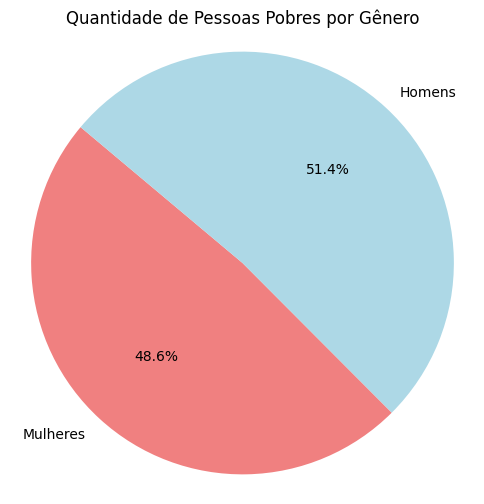

In [36]:


# Dados
quantidade_pobres_mulheres = 21825077
quantidade_pobres_homens = 23093210

# Rótulos e valores
labels = ['Mulheres', 'Homens']
sizes = [quantidade_pobres_mulheres, quantidade_pobres_homens]
colors = ['lightcoral', 'lightblue']

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Quantidade de Pessoas Pobres por Gênero')
plt.axis('equal')  # Mantém o aspecto circular do gráfico

# Exibição do gráfico
plt.show()


**Pessoas em Condições de Pobreza:**

- Pessoas em condições de pobreza são aquelas que não têm acesso adequado a recursos econômicos, sociais e materiais para atender às suas necessidades básicas, como alimentação, moradia, saúde e educação.

- A pobreza é uma condição em que as pessoas têm uma renda tão baixa que não conseguem garantir um padrão de vida adequado. Isso pode ser devido a desemprego, baixos salários, falta de educação ou acesso limitado a serviços essenciais.

- Pessoas em situação de pobreza geralmente enfrentam dificuldades para satisfazer necessidades fundamentais, como alimentação, cuidados de saúde e habitação adequada. A pobreza é frequentemente medida em termos de renda per capita, em que pessoas cuja renda está abaixo de um determinado limiar são consideradas pobres.

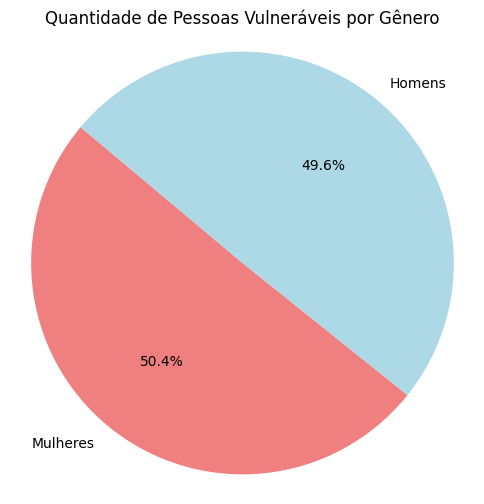

In [37]:


# Dados
quantidade_vulneraveis_mulheres = 12698389
quantidade_vulneraveis_homens = 12514237

# Rótulos e valores
labels = ['Mulheres', 'Homens']
sizes = [quantidade_vulneraveis_mulheres, quantidade_vulneraveis_homens]
colors = ['lightcoral', 'lightblue']

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Quantidade de Pessoas Vulneráveis por Gênero')
plt.axis('equal')  # Mantém o aspecto circular do gráfico

# Exibição do gráfico
plt.show()


Pessoas em Condições Vulneráveis:

Pessoas em condições vulneráveis referem-se àquelas que estão em risco de cair em situação de pobreza devido a circunstâncias específicas. Isso pode incluir eventos imprevistos, como desastres naturais, perda de emprego, doença ou outros fatores que podem comprometer sua capacidade de sustentar um padrão de vida adequado.

A vulnerabilidade está relacionada à probabilidade de enfrentar dificuldades econômicas ou sociais no futuro devido a fatores que podem afetar negativamente a capacidade de uma pessoa ou família de manter um padrão de vida decente.

Pessoas em condições vulneráveis podem não estar em situação de pobreza atualmente, mas estão em risco de cair nessa condição se ocorrerem eventos ou mudanças nas circunstâncias que as deixem em desvantagem econômica.

Interpretação dos resultados:

1. **Disparidade de Pobreza (Real): -2.30%**
   - Este valor representa a diferença percentual na proporção de pessoas pobres entre homens e mulheres no contexto de seus totais. Um valor negativo indica que a proporção de pessoas pobres é cerca de 2.30% menor entre as mulheres em relação aos homens. Em outras palavras, as mulheres têm uma menor proporção de pessoas pobres em comparação com os homens, de acordo com os dados fornecidos.

2. **Disparidade de Vulnerabilidade (Real): -0.35%**
   - Esse valor representa a diferença percentual na proporção de pessoas vulneráveis entre homens e mulheres no contexto de seus totais. Um valor negativo indica que a proporção de pessoas vulneráveis é cerca de 0.35% menor entre as mulheres em relação aos homens. Isso sugere que, com base nos dados disponíveis, as mulheres têm uma ligeira vantagem em relação à vulnerabilidade, com uma menor proporção de pessoas vulneráveis em comparação com os homens.

Em resumo, esses resultados indicam que, com base nos dados fornecidos, as mulheres parecem estar em uma posição ligeiramente melhor em termos de pobreza e vulnerabilidade em relação aos homens.

In [38]:
quantidade_total_pessoas = dados['qtd_pessoas'].sum()

# Exibindo a quantidade total de pessoas
print("Quantidade Total de Pessoas:", quantidade_total_pessoas)


quantidade_total_pobres = dados['qtd_pes_pobres']. sum()
print("Quantidade Total de Pessoas pobres:", quantidade_total_pobres)

Quantidade Total de Pessoas: 190755799.00000006
Quantidade Total de Pessoas pobres: 44918288.06645519


In [39]:

# Cálculo da taxa de incidência da pobreza
taxa_incidencia_pobreza = (quantidade_total_pobres / quantidade_total_pessoas) * 100

# Imprimindo o resultado
print("Taxa de Incidência da Pobreza:", taxa_incidencia_pobreza, "%")

Taxa de Incidência da Pobreza: 23.547534754870114 %


**1. Com base na análise de incidência de pobreza**:

 - No Brasil, em uma população total de 190.755.799 pessoas, aproximadamente 44.9 milhões de pessoas vivem em situação de pobreza. Isso indica uma proporção significativa da população que enfrenta desafios econômicos e sociais, como dificuldades de acesso a recursos e serviços básicos.

**2. Importância:**

 - Essa informação é importante para orientar políticas e intervenções visando a redução da pobreza e melhoria das condições de vida para as pessoas em situação de vulnerabilidade. Portanto, é fundamental que políticas públicas e programas sociais sejam desenvolvidos e implementados para abordar as necessidades das pessoas em situação de pobreza e promover a inclusão econômica e social.

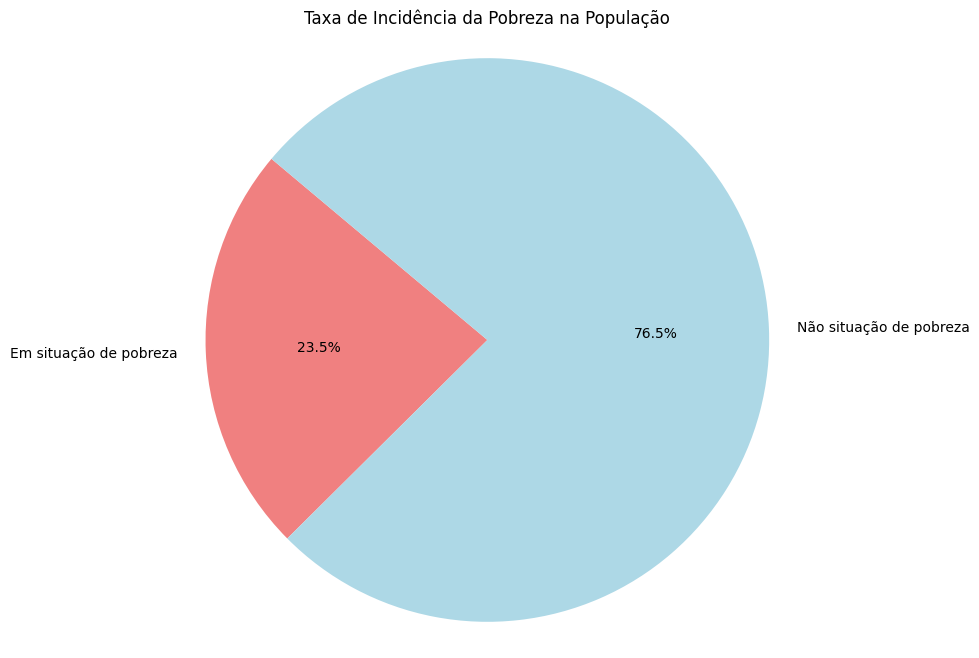

In [40]:


# População total
populacao_total = 190755799

# Taxa de incidência da pobreza (em porcentagem)
taxa_incidencia_pobreza = 23.547534754870114

# Quantidade de pessoas em situação de pobreza
quantidade_pessoas_pobreza = (taxa_incidencia_pobreza / 100) * populacao_total

# Rótulos para o gráfico
labels = ['Em situação de pobreza', 'Não situação de pobreza']
sizes = [quantidade_pessoas_pobreza, populacao_total - quantidade_pessoas_pobreza]
colors = ['lightcoral', 'lightblue']

# Criação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Taxa de Incidência da Pobreza na População')
plt.axis('equal')  # Mantém o aspecto circular do gráfico

# Exibição do gráfico
plt.show()


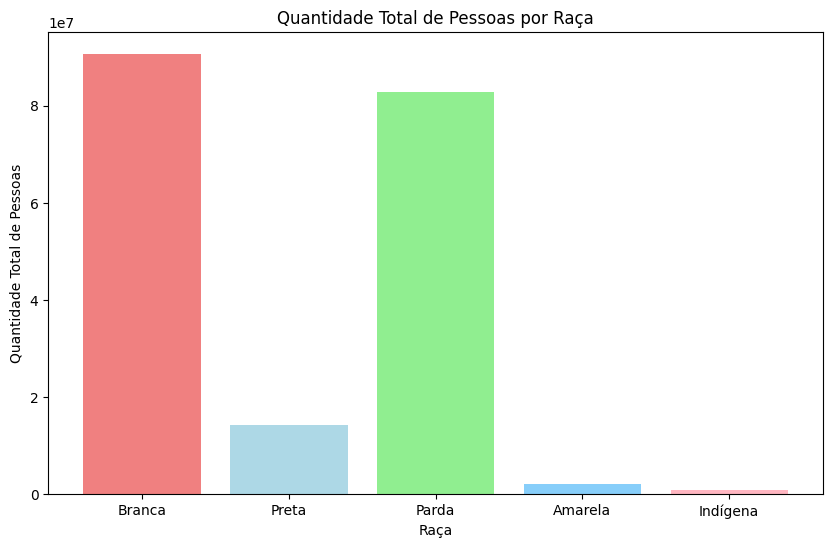

In [41]:


# Dados
racas = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
quantidades = [
    int(dados_branco['qtd_pessoas'].sum()),
    int(dados_preto['qtd_pessoas'].sum()),
    int(dados_pardo['qtd_pessoas'].sum()),
    int(dados_amarelo['qtd_pessoas'].sum()),
    int(dados_indigena['qtd_pessoas'].sum())
]

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(racas, quantidades, color=['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue', 'lightpink'])
plt.title('Quantidade Total de Pessoas por Raça')
plt.xlabel('Raça')
plt.ylabel('Quantidade Total de Pessoas')

# Exibição do gráfico
plt.show()


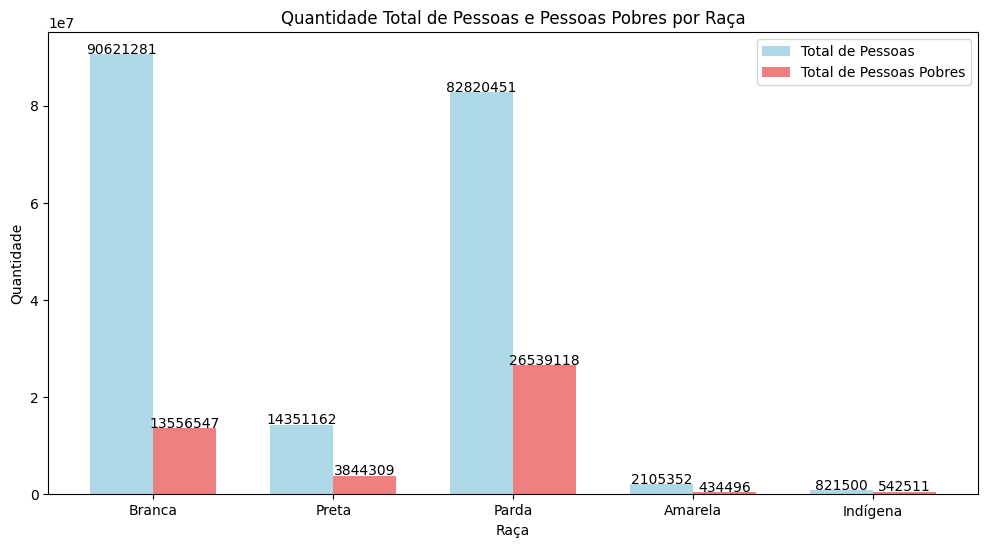

In [42]:


# Dados
racas = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
quantidades = [
    int(dados_branco['qtd_pessoas'].sum()),
    int(dados_preto['qtd_pessoas'].sum()),
    int(dados_pardo['qtd_pessoas'].sum()),
    int(dados_amarelo['qtd_pessoas'].sum()),
    int(dados_indigena['qtd_pessoas'].sum())
]
quantidades_pobres = [
    int(dados_branco['qtd_pes_pobres'].sum()),
    int(dados_preto['qtd_pes_pobres'].sum()),
    int(dados_pardo['qtd_pes_pobres'].sum()),
    int(dados_amarelo['qtd_pes_pobres'].sum()),
    int(dados_indigena['qtd_pes_pobres'].sum())
]

# Largura de cada barra
largura = 0.35

# Coordenadas no eixo x para as barras
x = range(len(racas))

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(x, quantidades, largura, label='Total de Pessoas', color='lightblue')
plt.bar([i + largura for i in x], quantidades_pobres, largura, label='Total de Pessoas Pobres', color='lightcoral')
plt.xticks([i + largura / 2 for i in x], racas)
plt.title('Quantidade Total de Pessoas e Pessoas Pobres por Raça')
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.legend()

# Adiciona os números acima das barras
for i in range(len(x)):
    plt.text(x[i], quantidades[i] + 100000, str(quantidades[i]), ha='center')
    plt.text(x[i] + largura, quantidades_pobres[i] + 100000, str(quantidades_pobres[i]), ha='center')

# Exibição do gráfico
plt.show()


In [43]:
# Calcular as porcentagens de pessoas pobres entre negros e brancos
porcentagem_pobres_negros = (quantidade_total_pobres_negras / quantidade_total_pessoas_negras) * 100
porcentagem_pobres_brancos = (quantidade_total_pobres_brancos / quantidade_total_pessoas_brancas) * 100

# Calcular a diferença percentual
diferenca_percentual = porcentagem_pobres_negros - porcentagem_pobres_brancos

# Exibir as porcentagens e a diferença
print("Porcentagem de pobres entre negros: {:.2f}%".format(porcentagem_pobres_negros))
print("Porcentagem de pobres entre brancos: {:.2f}%".format(porcentagem_pobres_brancos))
print("Diferença percentual: {:.2f}%".format(diferenca_percentual))


Porcentagem de pobres entre negros: 26.79%
Porcentagem de pobres entre brancos: 14.96%
Diferença percentual: 11.83%


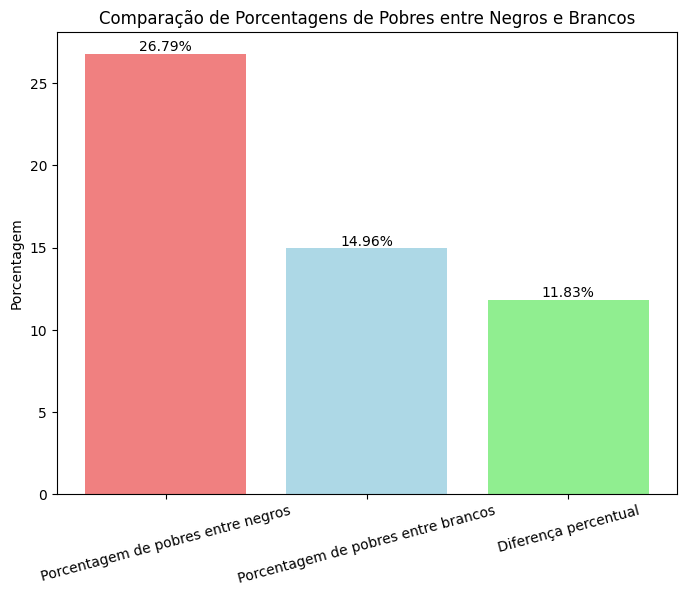

In [44]:


# Porcentagens
porcentagem_pobres_negros = 26.79
porcentagem_pobres_brancos = 14.96
diferenca_percentual = 11.83

# Categorias
categorias = ['Porcentagem de pobres entre negros', 'Porcentagem de pobres entre brancos', 'Diferença percentual']

# Valores
valores = [porcentagem_pobres_negros, porcentagem_pobres_brancos, diferenca_percentual]

# Cores
cores = ['lightcoral', 'lightblue', 'lightgreen']

# Criação do gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=cores)
plt.title('Comparação de Porcentagens de Pobres entre Negros e Brancos')
plt.ylabel('Porcentagem')
plt.xticks(rotation=15)

# Adicionar rótulos com os valores
for i, v in enumerate(valores):
    plt.text(i, v, "{:.2f}%".format(v), ha='center', va='bottom')

# Exibição do gráfico
plt.show()


**Disparidade na Pobreza:**
 A porcentagem de pobres entre negros (26.79%) é significativamente maior do que a porcentagem entre brancos (14.96%). Isso indica uma disparidade na distribuição da pobreza entre esses dois grupos.

**Desigualdade Econômica:**
 A diferença percentual de 11.83% entre as porcentagens é um indicador da desigualdade econômica entre negros e brancos em relação à pobreza. Essa diferença destaca que uma proporção maior de negros está em situação de pobreza em comparação com brancos.

**Desafios Socioeconômicos:**
 Essas estatísticas sugerem que negros podem enfrentar desafios socioeconômicos adicionais em comparação com brancos, o que pode incluir acesso limitado a oportunidades educacionais, empregos bem remunerados e outros recursos que podem ajudar a reduzir a pobreza.

**Necessidade de Políticas Públicas:**
 A disparidade na pobreza destaca a importância de políticas públicas que abordem as desigualdades econômicas e sociais entre grupos raciais. Essas políticas podem incluir ações afirmativas, acesso igualitário à educação e oportunidades de emprego, e programas de assistência social.

**Conscientização e Advocacia:**
 Essas estatísticas também podem servir como um ponto de partida para a conscientização e a advocacia por medidas que reduzam a disparidade na pobreza entre grupos raciais, promovendo equidade e justiça social.

In [45]:
porcentagem_pobres_pardos = (quantidade_total_pobres_pardas / quantidade_total_pessoas_pardas) * 100
porcentagem_pobres_brancos = (quantidade_total_pobres_brancos / quantidade_total_pessoas_brancas) * 100

# Calcular a diferença percentual
diferenca_percentual = porcentagem_pobres_pardos - porcentagem_pobres_brancos

# Exibir as porcentagens e a diferença
print("Porcentagem de pobres entre pardos: {:.2f}%".format(porcentagem_pobres_pardos))
print("Porcentagem de pobres entre brancos: {:.2f}%".format(porcentagem_pobres_brancos))
print("Diferença percentual: {:.2f}%".format(diferenca_percentual))

Porcentagem de pobres entre pardos: 32.04%
Porcentagem de pobres entre brancos: 14.96%
Diferença percentual: 17.08%


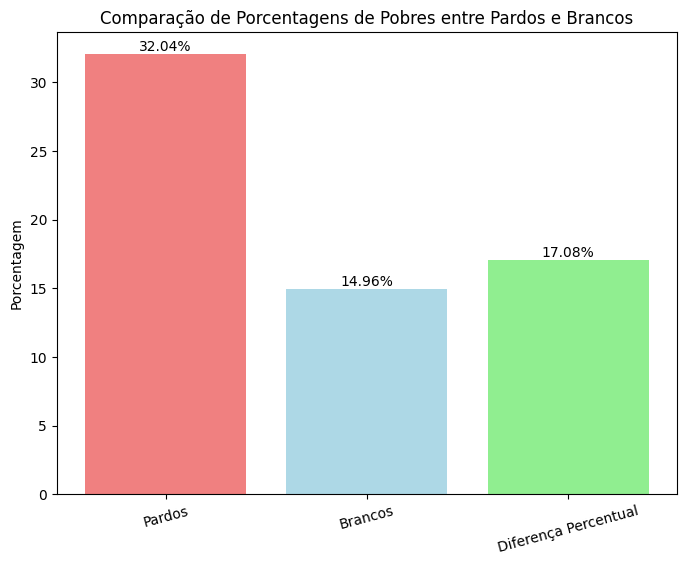

In [46]:


# Porcentagens
porcentagem_pobres_pardos = 32.04
porcentagem_pobres_brancos = 14.96
diferenca_percentual = 17.08

# Categorias
categorias = ['Pardos', 'Brancos', 'Diferença Percentual']

# Valores
valores = [porcentagem_pobres_pardos, porcentagem_pobres_brancos, diferenca_percentual]

# Cores
cores = ['lightcoral', 'lightblue', 'lightgreen']

# Criação do gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=cores)
plt.title('Comparação de Porcentagens de Pobres entre Pardos e Brancos')
plt.ylabel('Porcentagem')
plt.xticks(rotation=15)

# Adicionar rótulos com os valores
for i, v in enumerate(valores):
    plt.text(i, v, "{:.2f}%".format(v), ha='center', va='bottom')

# Exibição do gráfico
plt.show()


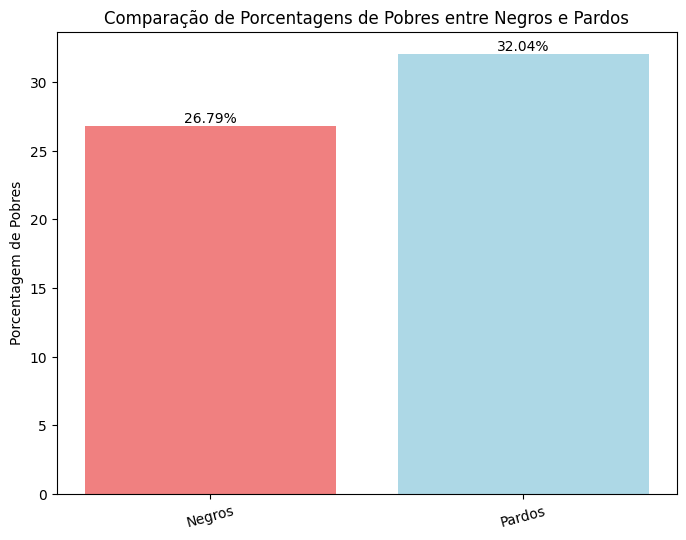

In [47]:

# Porcentagens
porcentagem_pobres_negros = 26.79
porcentagem_pobres_pardos = 32.04

# Categorias
categorias = ['Negros', 'Pardos']

# Valores
valores = [porcentagem_pobres_negros, porcentagem_pobres_pardos]

# Cores
cores = ['lightcoral', 'lightblue']

# Criação do gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=cores)
plt.title('Comparação de Porcentagens de Pobres entre Negros e Pardos')
plt.ylabel('Porcentagem de Pobres')
plt.xticks(rotation=15)

# Adicionar rótulos com os valores
for i, v in enumerate(valores):
    plt.text(i, v, "{:.2f}%".format(v), ha='center', va='bottom')

# Exibição do gráfico
plt.show()


In [48]:
df = pd.DataFrame(IPMporRaca)
dados_regiao_11 = df[df['cod_mun'].astype(str).str.startswith('11')]

dados_regiao_11.describe

<bound method NDFrame.describe of      cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0    1100015     1  10583.324108     7179.226549          1992.031046   
1    1100015     2   1094.001805      728.312925           179.740507   
2    1100015     3     95.704395       83.408552             0.000000   
3    1100015     4  12122.249467     8958.390641          1716.999407   
4    1100015     5    496.720225      476.883350            19.836875   
..       ...   ...           ...             ...                  ...   
251  1101757     5      6.294403        0.000000             6.294403   
252  1101807     1   2777.372333     2280.172013           296.656498   
253  1101807     2    548.481386      448.612169            54.966731   
254  1101807     3     71.820172       40.773631             5.735709   
255  1101807     4   4812.326109     3925.315016           559.029209   

     qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
0        9171

In [49]:
dados_regiao_12 = df[df['cod_mun'].astype(str).str.startswith('12')]
dados_regiao_12.describe


<bound method NDFrame.describe of      cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
256  1200013     1   3384.272588     2520.023374           498.192833   
257  1200013     2    553.638529      434.434184            74.721087   
258  1200013     3    132.337438       80.877155            51.460284   
259  1200013     4   8467.751444     6609.080103          1217.903137   
260  1200054     1   1638.045413     1172.980706           270.983245   
..       ...   ...           ...             ...                  ...   
357  1200708     4  11435.985558     7459.907212          1736.187638   
358  1200807     1   3113.857378     2493.917305           401.672911   
359  1200807     2    633.940964      584.952918            48.988046   
360  1200807     3    152.358266      140.771525             5.152352   
361  1200807     4  10979.843392     8961.775420          1232.741721   

     qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
256      3018

In [137]:
#SEPARANDO DATAFRAME POR REGIAO
#NORTE
dados_regiao_11 = df[df['cod_mun'].astype(str).str.startswith('11')]
dados_regiao_12 = df[df['cod_mun'].astype(str).str.startswith('12')]
dados_regiao_13 = df[df['cod_mun'].astype(str).str.startswith('13')]
dados_regiao_14 = df[df['cod_mun'].astype(str).str.startswith('14')]

dados_regiao_15 = df[df['cod_mun'].astype(str).str.startswith('15')]
dados_regiao_16 = df[df['cod_mun'].astype(str).str.startswith('16')]
dados_regiao_17 = df[df['cod_mun'].astype(str).str.startswith('17')]

#NORDESTE
dados_regiao_21 = df[df['cod_mun'].astype(str).str.startswith('21')]
dados_regiao_22 = df[df['cod_mun'].astype(str).str.startswith('22')]
dados_regiao_23 = df[df['cod_mun'].astype(str).str.startswith('23')]
dados_regiao_24 = df[df['cod_mun'].astype(str).str.startswith('24')]
dados_regiao_25 = df[df['cod_mun'].astype(str).str.startswith('25')]
dados_regiao_26 = df[df['cod_mun'].astype(str).str.startswith('26')]
dados_regiao_27 = df[df['cod_mun'].astype(str).str.startswith('27')]
dados_regiao_28 = df[df['cod_mun'].astype(str).str.startswith('28')]
dados_regiao_29 = df[df['cod_mun'].astype(str).str.startswith('29')]
#SUDESTE
dados_regiao_31 = df[df['cod_mun'].astype(str).str.startswith('31')]
dados_regiao_32 = df[df['cod_mun'].astype(str).str.startswith('32')]
dados_regiao_33 = df[df['cod_mun'].astype(str).str.startswith('33')]
dados_regiao_34 = df[df['cod_mun'].astype(str).str.startswith('34')]
dados_regiao_35 = df[df['cod_mun'].astype(str).str.startswith('35')]
#SUL
dados_regiao_41 = df[df['cod_mun'].astype(str).str.startswith('41')]
dados_regiao_42 = df[df['cod_mun'].astype(str).str.startswith('42')]
dados_regiao_43 = df[df['cod_mun'].astype(str).str.startswith('43')]
#CENTRO OESTE
dados_regiao_50 = df[df['cod_mun'].astype(str).str.startswith('50')]
dados_regiao_51 = df[df['cod_mun'].astype(str).str.startswith('51')]
dados_regiao_52 = df[df['cod_mun'].astype(str).str.startswith('52')]
dados_regiao_53 = df[df['cod_mun'].astype(str).str.startswith('53')]

<bound method NDFrame.describe of Empty DataFrame
Columns: [cod_mun, raca, qtd_pessoas, qtd_pes_pobres, qtd_pes_vulneraveis, qtd_pes_pob_vul, qtd_0a11, qtd_0a11_pobres, qtd_0a11_vulneraveis, qtd_0a11_pob_vul, incidencia, intensidade, IPM, qtd_pes_E1, qtd_pes_E2, qtd_pes_E3, qtd_pes_S1, qtd_pes_S2, qtd_pes_S3, qtd_pes_S4, qtd_pes_T1, qtd_pes_T2, qtd_pes_T3, qtd_pes_P1, qtd_pes_P2, qtd_pes_P3, qtd_pes_P4, contr_E1, contr_E2, contr_E3, contr_S1, contr_S2, contr_S3, contr_S4, contr_T1, contr_T2, contr_T3, contr_P1, contr_P2, contr_P3, contr_P4]
Index: []

[0 rows x 41 columns]>

In [51]:
dados_regiao_31.describe

<bound method NDFrame.describe of        cod_mun  raca  qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
10254  3100104     1  4663.439195     1760.620289           366.147557   
10255  3100104     2   260.379148       35.198184            28.742196   
10256  3100104     3    37.682769        2.796377             9.010561   
10257  3100104     4  1739.801559      571.847335           201.572928   
10258  3100104     5     2.697328        0.000000             0.000000   
...        ...   ...          ...             ...                  ...   
14050  3172103     4  1548.556846      358.939030           210.995832   
14051  3172103     5     5.560479        0.000000             0.000000   
14052  3172202     1  1963.824294      519.073277           561.928775   
14053  3172202     2    67.982135        9.104141            22.449654   
14054  3172202     4   521.193571      154.895727           124.776065   

       qtd_pes_pob_vul    qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \


In [52]:
#criando dicionário para os estados
# Dicionário com códigos e nomes das regiões
nomes_regioes = {
    '11': 'Rondônia (RO)',
    '12': 'Acre (AC)',
    '13': 'Amazonas (AM)',
    '14': 'Roraima (RR)',
    '15': 'Pará (PA)',
    '16': 'Amapá (AP)',
    '17': 'Tocantins (TO)',
    '21': 'Maranhão (MA)',
    '22': 'Piauí (PI)',
    '23': 'Ceará (CE)',
    '24': 'Rio Grande do Norte (RN)',
    '25': 'Paraíba (PB)',
    '26': 'Pernambuco (PE)',
    '27': 'Alagoas (AL)',
    '28': 'Sergipe (SE)',
    '29': 'Bahia (BA)',
    '31': 'Minas Gerais (MG)',
    '32': 'Espírito Santo (ES)',
    '33': 'Rio de Janeiro (RJ)',
    '35': 'São Paulo (SP)',
    '41': 'Paraná (PR)',
    '42': 'Santa Catarina (SC)',
    '43': 'Rio Grande do Sul (RS)',
    '50': 'Mato Grosso do Sul (MS)',
    '51': 'Mato Grosso (MT)',
    '52': 'Goiás (GO)',
    '53': 'Distrito Federal (DF)'
}




In [53]:

dados_regiao_31.to_excel('/content/DESAFIO-CIENCIAS-DE-DADOS-PUC/Dados para competição_V1_PauloFernando/regiao_31.xlsx', index=False)


In [54]:
regioes = {
    "Norte": {
        "Rondônia (RO)": dados_regiao_11,
        "Acre (AC)": dados_regiao_12,
        "Amazonas (AM)": dados_regiao_13,
        "Roraima (RR)": dados_regiao_14,
        "Pará (PA)": dados_regiao_15,
        "Amapá (AP)": dados_regiao_16,
        "Tocantins (TO)": dados_regiao_17
    },
    "Nordeste": {
        "Maranhão (MA)": dados_regiao_21,
        "Piauí (PI)": dados_regiao_22,
        "Ceará (CE)": dados_regiao_23,
        "Rio Grande do Norte (RN)": dados_regiao_24,
        "Paraíba (PB)": dados_regiao_25,
        "Pernambuco (PE)": dados_regiao_26,
        "Alagoas (AL)": dados_regiao_27,
        "Sergipe (SE)": dados_regiao_28,
        "Bahia (BA)": dados_regiao_29
    },
    "Sudeste": {
        "Minas Gerais (MG)": dados_regiao_31,
        "Espírito Santo (ES)": dados_regiao_32,
        "Rio de Janeiro (RJ)": dados_regiao_33,
        "São Paulo (SP)": dados_regiao_35
    },
    "Sul": {
        "Paraná (PR)": dados_regiao_41,
        "Santa Catarina (SC)": dados_regiao_42,
        "Rio Grande do Sul (RS)": dados_regiao_43
    },
    "Centro-Oeste": {
        "Mato Grosso do Sul (MS)": dados_regiao_50,
        "Mato Grosso (MT)": dados_regiao_51,
        "Goiás (GO)": dados_regiao_52,
        "Distrito Federal (DF)": dados_regiao_53
    }
}


In [139]:
# Acesse os DataFrames da região Sudeste usando a chave "Sudeste"
regiao_sudeste = regioes["Sudeste"]

# Agora você pode acessar cada DataFrame individualmente pelo nome do estado
dados_sp = regiao_sudeste["São Paulo (SP)"]
dados_rj = regiao_sudeste["Rio de Janeiro (RJ)"]
dados_mg = regiao_sudeste["Minas Gerais (MG)"]
dados_es = regiao_sudeste["Espírito Santo (ES)"]

dados_sp.describe

TypeError: ignored

In [136]:
dados_sp.describe

<bound method NDFrame.describe of        cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
14884  3500105     1  25019.629308     1060.970540          1259.376632   
14885  3500105     2    754.481861       23.713187            56.215746   
14886  3500105     3    716.950546        4.690886             9.476426   
14887  3500105     4   7292.731352      547.573442           813.028714   
14889  3500204     1   2993.521969      175.867933           157.371532   
...        ...   ...           ...             ...                  ...   
17903  3557204     2    614.770069       79.185343           144.304805   
17905  3557204     4   3167.827644      245.155178           406.578219   
17907  3557303     1   7871.546353      442.562909           666.451649   
17908  3557303     2    210.118671        5.955287             0.000000   
17910  3557303     4   1909.562967      319.742654           204.892358   

       qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vu

In [124]:
import pandas as pd
import numpy as np

 # Define a configuração para evitar os avisos de SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Dicionário com os DataFrames de cada estado
estados = {
    "São Paulo": dados_sp,
    "Minas Gerais": dados_mg,
    "Rio de Janeiro": dados_rj,
    "Espírito Santo": dados_es,
    "Maranhão": dados_ma,
    "Piauí": dados_pi,
    "Ceará": dados_ce,
    "Rio Grande do Norte": dados_rn,
    "Paraíba": dados_pb,
    "Pernambuco": dados_pe,
    "Alagoas": dados_al,
    "Sergipe": dados_se,
    "Bahia": dados_ba,
    "Paraná": dados_pr,
    "Santa Catarina": dados_sc,
    "Rio Grande do Sul": dados_rs,
    "Goiás": dados_go,
    "Mato Grosso": dados_mt,
    "Mato Grosso do Sul": dados_ms,
    "Rondônia": dados_ro,
    "Acre": dados_ac,
    "Amazonas": dados_am,
    "Roraima": dados_rr,
    "Pará": dados_pa,
    "Amapá": dados_ap,
    "Tocantins": dados_to
}

# Listas para armazenar as médias
medias_incidencia = []
medias_intensidade = []

# Itera sobre os DataFrames de cada estado
for estado, df in estados.items():
    # Remove a primeira linha (cabeçalho)
    df = df.iloc[1:]

    # Converte a coluna "intensidade" para texto, substitui vírgulas por pontos e extrai o valor numérico
    df["intensidade"] = df["intensidade"].astype(str).str.replace(',', '.').str.extract(r'(\d+\.\d+)').astype(float)

    # Substitui valores vazios por 0
    df["intensidade"].fillna(0, inplace=True)

    # Calcula a média da coluna "incidencia" e "intensidade"
    media_incidencia_estado = df["incidencia"].mean()
    media_intensidade_estado = df["intensidade"].mean()

    medias_incidencia.append(media_incidencia_estado)
    medias_intensidade.append(media_intensidade_estado)

# Cria um DataFrame com as médias
medias_df = pd.DataFrame({
    "Estado": estados.keys(),
    "Média Incidência": medias_incidencia,
    "Média Intensidade": medias_intensidade
})

# Exibe o DataFrame com as médias
print(medias_df)


                 Estado  Média Incidência  Média Intensidade
0             São Paulo         15.435198          39.410227
1          Minas Gerais         32.539463          40.994388
2        Rio de Janeiro         21.942853          40.481283
3        Espírito Santo         33.215171          41.278681
4              Maranhão         66.721186          43.915779
5                 Piauí         58.907250          41.472416
6                 Ceará         50.280753          40.253278
7   Rio Grande do Norte         40.847219          39.545382
8               Paraíba         51.020365          41.384521
9            Pernambuco         44.350502          40.283963
10              Alagoas         54.422438          42.281307
11              Sergipe         43.258914          41.457539
12                Bahia         46.467897          40.619271
13               Paraná         35.096862          37.870357
14       Santa Catarina         37.871089          36.519400
15    Rio Grande do Sul 

In [ ]:

# Lista de estados com as médias de incidência e intensidade
estados = [
    {"Estado": "SP", "Média Incidência": 15.435198, "Média Intensidade": 39.410227},
    {"Estado": "MG", "Média Incidência": 32.539463, "Média Intensidade": 40.994388},
    {"Estado": "RJ", "Média Incidência": 21.942853, "Média Intensidade": 40.481283},
    {"Estado": "ES", "Média Incidência": 33.215171, "Média Intensidade": 41.278681},
    {"Estado": "MA", "Média Incidência": 66.721186, "Média Intensidade": 43.915779},
    {"Estado": "PI", "Média Incidência": 58.907250, "Média Intensidade": 41.472416},
    {"Estado": "CE", "Média Incidência": 50.280753, "Média Intensidade": 40.253278},
    {"Estado": "RN", "Média Incidência": 40.847219, "Média Intensidade": 39.545382},
    {"Estado": "PB", "Média Incidência": 51.020365, "Média Intensidade": 41.384521},
    {"Estado": "PE", "Média Incidência": 44.350502, "Média Intensidade": 40.283963},
    {"Estado": "AL", "Média Incidência": 54.422438, "Média Intensidade": 42.281307},
    {"Estado": "SE", "Média Incidência": 43.258914, "Média Intensidade": 41.457539},
    {"Estado": "BA", "Média Incidência": 46.467897, "Média Intensidade": 40.619271},
    {"Estado": "PR", "Média Incidência": 35.096862, "Média Intensidade": 37.870357},
    {"Estado": "SC", "Média Incidência": 37.871089, "Média Intensidade": 36.519400},
    {"Estado": "RS", "Média Incidência": 37.811229, "Média Intensidade": 36.508917},
    {"Estado": "GO", "Média Incidência": 28.212420, "Média Intensidade": 35.737676},
    {"Estado": "MT", "Média Incidência": 43.428050, "Média Intensidade": 39.622030},
    {"Estado": "MS", "Média Incidência": 36.588095, "Média Intensidade": 39.002033},
    {"Estado": "RO", "Média Incidência": 66.259398, "Média Intensidade": 44.127524},
    {"Estado": "AC", "Média Incidência": 74.054231, "Média Intensidade": 48.115623},
    {"Estado": "AM", "Média Incidência": 77.352212, "Média Intensidade": 49.888271},
    {"Estado": "RR", "Média Incidência": 58.315504, "Média Intensidade": 44.797140},
    {"Estado": "PA", "Média Incidência": 72.211061, "Média Intensidade": 46.810464},
    {"Estado": "AP", "Média Incidência": 61.815573, "Média Intensidade": 44.983945},
    {"Estado": "TO", "Média Incidência": 46.233164, "Média Intensidade": 39.670549},
]

# Extrai as médias de incidência e intensidade
incidencia = [estado["Média Incidência"] for estado in estados]
intensidade = [estado["Média Intensidade"] for estado in estados]

# Extrai os estados
nomes_estados = [estado["Estado"] for estado in estados]

# Cria um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(incidencia, intensidade)

# Adiciona os nomes dos estados como rótulos
for i, nome_estado in enumerate(nomes_estados):
    plt.annotate(nome_estado, (incidencia[i], intensidade[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Rótulos dos eixos
plt.xlabel('Média Incidência')
plt.ylabel('Média Intensidade')

# Título
plt.title('Gráfico de Dispersão - Incidência vs. Intensidade por Estado')

# Exibe o gráfico
plt.grid()
plt.show()


In [ ]:


# Lista de estados com as médias de incidência e intensidade
estados = [
    {"Estado": "SP", "Média Incidência": 15.435198 / 100, "Média Intensidade": 39.410227 / 100},
    {"Estado": "MG", "Média Incidência": 32.539463 / 100, "Média Intensidade": 40.994388 / 100},
    {"Estado": "RJ", "Média Incidência": 21.942853 / 100, "Média Intensidade": 40.481283 / 100},
    {"Estado": "ES", "Média Incidência": 33.215171 / 100, "Média Intensidade": 41.278681 / 100},
    {"Estado": "MA", "Média Incidência": 66.721186 / 100, "Média Intensidade": 43.915779 / 100},
    {"Estado": "PI", "Média Incidência": 58.907250 / 100, "Média Intensidade": 41.472416 / 100},
    {"Estado": "CE", "Média Incidência": 50.280753 / 100, "Média Intensidade": 40.253278 / 100},
    {"Estado": "RN", "Média Incidência": 40.847219 / 100, "Média Intensidade": 39.545382 / 100},
    {"Estado": "PB", "Média Incidência": 51.020365 / 100, "Média Intensidade": 41.384521 / 100},
    {"Estado": "PE", "Média Incidência": 44.350502 / 100, "Média Intensidade": 40.283963 / 100},
    {"Estado": "AL", "Média Incidência": 54.422438 / 100, "Média Intensidade": 42.281307 / 100},
    {"Estado": "SE", "Média Incidência": 43.258914 / 100, "Média Intensidade": 41.457539 / 100},
    {"Estado": "BA", "Média Incidência": 46.467897 / 100, "Média Intensidade": 40.619271 / 100},
    {"Estado": "PR", "Média Incidência": 35.096862 / 100, "Média Intensidade": 37.870357 / 100},
    {"Estado": "SC", "Média Incidência": 37.871089 / 100, "Média Intensidade": 36.519400 / 100},
    {"Estado": "RS", "Média Incidência": 37.811229 / 100, "Média Intensidade": 36.508917 / 100},
    {"Estado": "GO", "Média Incidência": 28.212420 / 100, "Média Intensidade": 35.737676 / 100},
    {"Estado": "MT", "Média Incidência": 43.428050 / 100, "Média Intensidade": 39.622030 / 100},
    {"Estado": "MS", "Média Incidência": 36.588095 / 100, "Média Intensidade": 39.002033 / 100},
    {"Estado": "RO", "Média Incidência": 66.259398 / 100, "Média Intensidade": 44.127524 / 100},
    {"Estado": "AC", "Média Incidência": 74.054231 / 100, "Média Intensidade": 48.115623 / 100},
    {"Estado": "AM", "Média Incidência": 77.352212 / 100, "Média Intensidade": 49.888271 / 100},
    {"Estado": "RR", "Média Incidência": 58.315504 / 100, "Média Intensidade": 44.797140 / 100},
    {"Estado": "PA", "Média Incidência": 72.211061 / 100, "Média Intensidade": 46.810464 / 100},
    {"Estado": "AP", "Média Incidência": 61.815573 / 100, "Média Intensidade": 44.983945 / 100},
    {"Estado": "TO", "Média Incidência": 46.233164 / 100, "Média Intensidade": 39.670549 / 100},
]

# Extrai as médias de incidência e intensidade
incidencia = [estado["Média Incidência"] for estado in estados]
intensidade = [estado["Média Intensidade"] for estado in estados]

# Extrai os estados
nomes_estados = [estado["Estado"] for estado in estados]

# Cria um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(incidencia, intensidade)

# Adiciona os nomes dos estados como rótulos
for i, nome_estado in enumerate(nomes_estados):
    plt.annotate(nome_estado, (incidencia[i], intensidade[i]), textcoords="offset points", xytext=(0, 10), ha='center')


# Rótulos dos eixos
plt.xlabel('Média Incidência (0-1)')
plt.ylabel('Média Intensidade (0-1)')

# Título
plt.title('Gráfico de Dispersão - Incidência vs. Intensidade por Estado')

# Exibe o gráfico
plt.grid()
plt.show()


In [57]:
regiao_norte = regioes["Norte"]

dados_am = regiao_norte["Amazonas (AM)"]
dados_pa = regiao_norte["Pará (PA)"]
dados_rr = regiao_norte["Roraima (RR)"]
dados_ro = regiao_norte["Rondônia (RO)"]
dados_ac = regiao_norte["Acre (AC)"]
dados_ap = regiao_norte["Amapá (AP)"]
dados_to = regiao_norte["Tocantins (TO)"]

# Agora você tem DataFrames para todos os estados da região Norte.


In [58]:
regiao_nordeste = regioes["Nordeste"]

dados_ma = regiao_nordeste["Maranhão (MA)"]
dados_pi = regiao_nordeste["Piauí (PI)"]
dados_ce = regiao_nordeste["Ceará (CE)"]
dados_rn = regiao_nordeste["Rio Grande do Norte (RN)"]
dados_pb = regiao_nordeste["Paraíba (PB)"]
dados_pe = regiao_nordeste["Pernambuco (PE)"]
dados_al = regiao_nordeste["Alagoas (AL)"]
dados_se = regiao_nordeste["Sergipe (SE)"]
dados_ba = regiao_nordeste["Bahia (BA)"]

# Agora você tem DataFrames para todos os estados da região Nordeste.


In [59]:
regiao_sul = regioes["Sul"]

dados_pr = regiao_sul["Paraná (PR)"]
dados_sc = regiao_sul["Santa Catarina (SC)"]
dados_rs = regiao_sul["Rio Grande do Sul (RS)"]

# Agora você tem DataFrames para todos os estados da região Sul.


In [60]:
regiao_centro_oeste = regioes["Centro-Oeste"]

dados_ms = regiao_centro_oeste["Mato Grosso do Sul (MS)"]
dados_mt = regiao_centro_oeste["Mato Grosso (MT)"]
dados_go = regiao_centro_oeste["Goiás (GO)"]
dados_df = regiao_centro_oeste["Distrito Federal (DF)"]

# Agora você tem DataFrames para todos os estados da região Centro-Oeste.


In [61]:


# Supondo que você tenha um DataFrame chamado 'dados'
colunas = dados.columns
print(colunas)


Index(['cod_mun', 'sexo', 'qtd_pessoas', 'qtd_pes_pobres',
       'qtd_pes_vulneraveis', 'qtd_pes_pob_vul', 'qtd_0a11', 'qtd_0a11_pobres',
       'qtd_0a11_vulneraveis', 'qtd_0a11_pob_vul', 'incidencia', 'intensidade',
       'IPM', 'qtd_pes_E1', 'qtd_pes_E2', 'qtd_pes_E3', 'qtd_pes_S1',
       'qtd_pes_S2', 'qtd_pes_S3', 'qtd_pes_S4', 'qtd_pes_T1', 'qtd_pes_T2',
       'qtd_pes_T3', 'qtd_pes_P1', 'qtd_pes_P2', 'qtd_pes_P3', 'qtd_pes_P4',
       'contr_E1', 'contr_E2', 'contr_E3', 'contr_S1', 'contr_S2', 'contr_S3',
       'contr_S4', 'contr_T1', 'contr_T2', 'contr_T3', 'contr_P1', 'contr_P2',
       'contr_P3', 'contr_P4'],
      dtype='object')


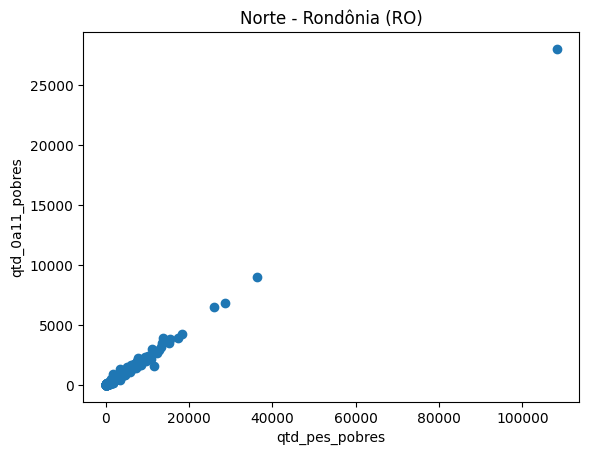

Correlação em Norte - Rondônia (RO): 1.00


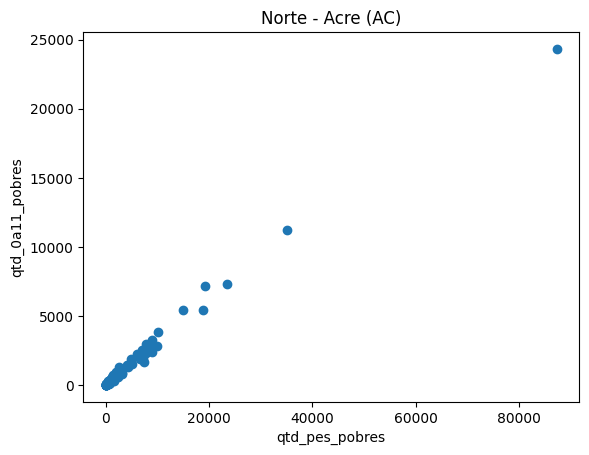

Correlação em Norte - Acre (AC): 0.99


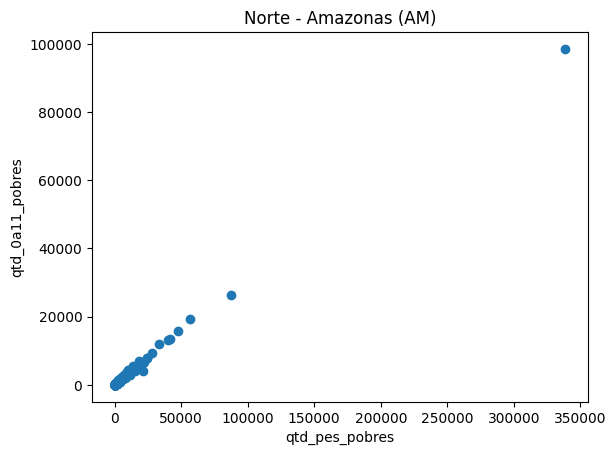

Correlação em Norte - Amazonas (AM): 1.00


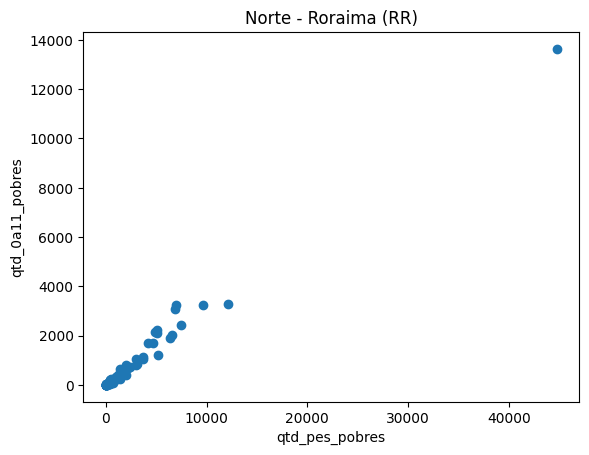

Correlação em Norte - Roraima (RR): 0.99


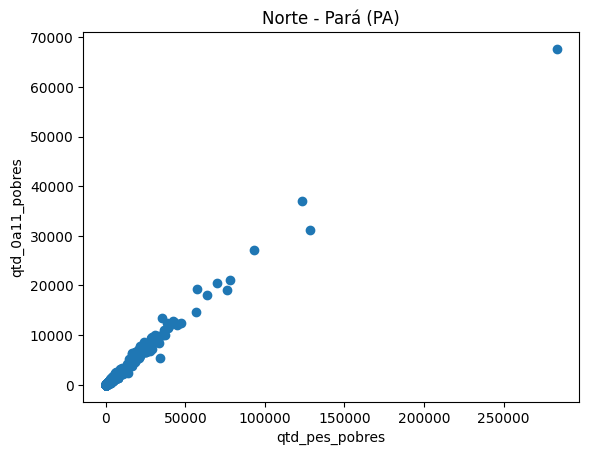

Correlação em Norte - Pará (PA): 0.99


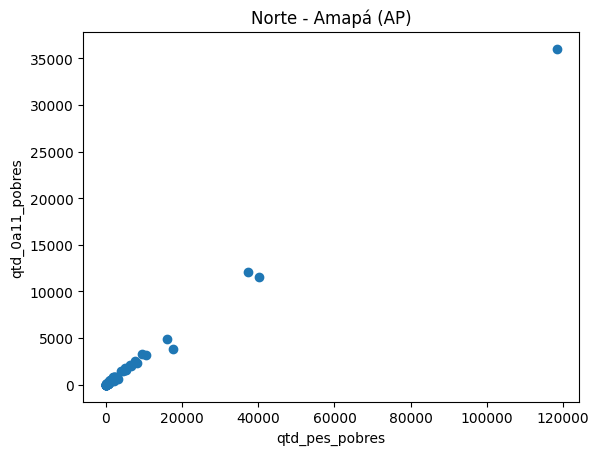

Correlação em Norte - Amapá (AP): 1.00


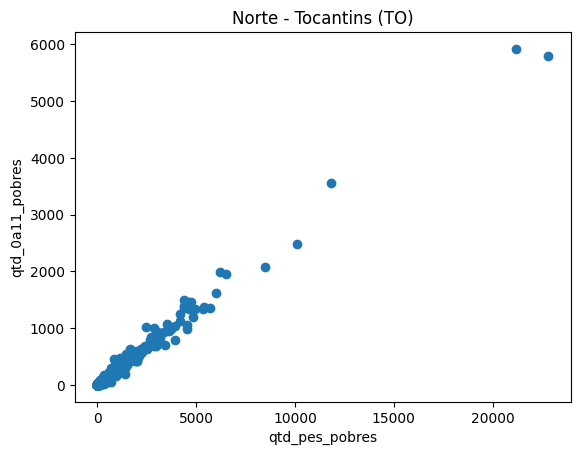

Correlação em Norte - Tocantins (TO): 0.99


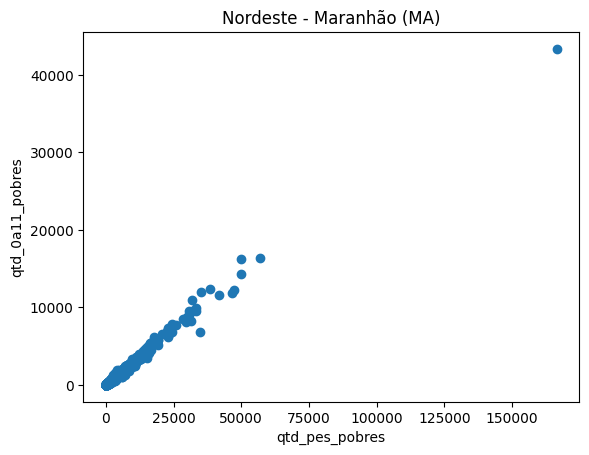

Correlação em Nordeste - Maranhão (MA): 0.99


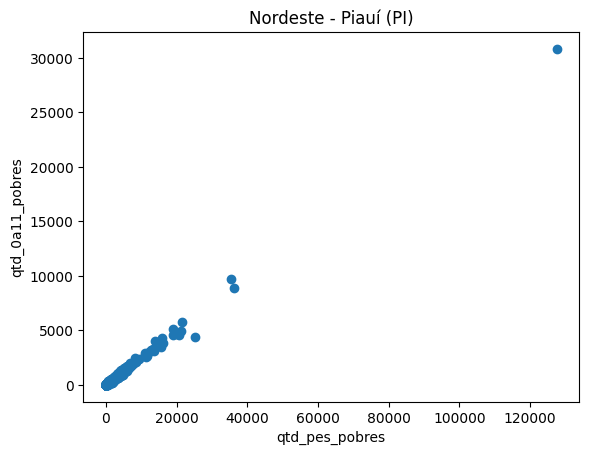

Correlação em Nordeste - Piauí (PI): 1.00


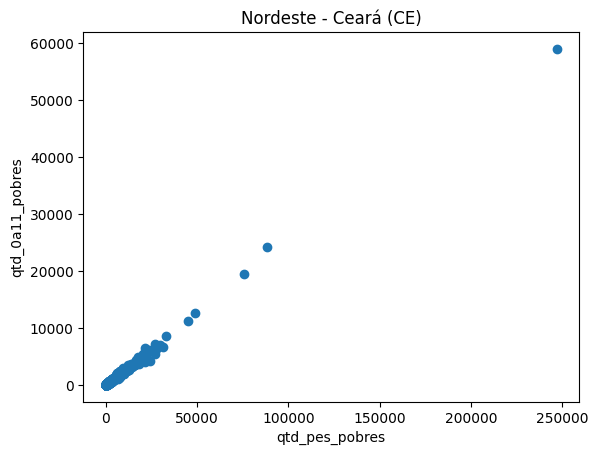

Correlação em Nordeste - Ceará (CE): 1.00


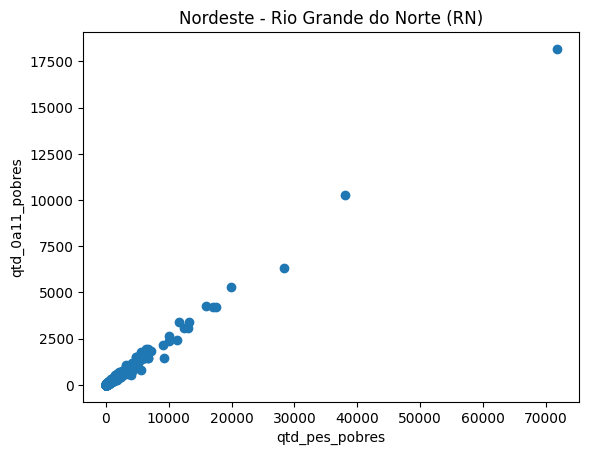

Correlação em Nordeste - Rio Grande do Norte (RN): 1.00


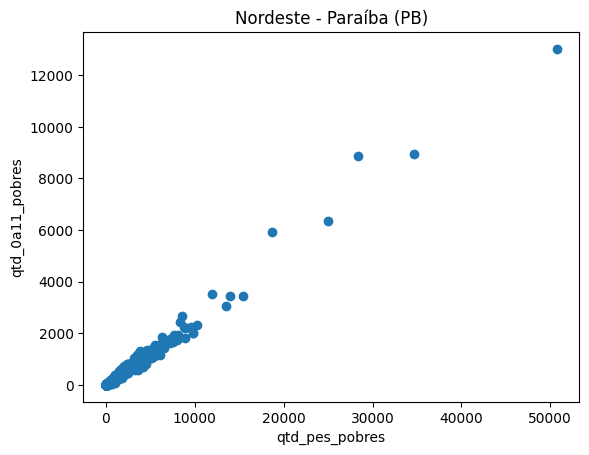

Correlação em Nordeste - Paraíba (PB): 0.99


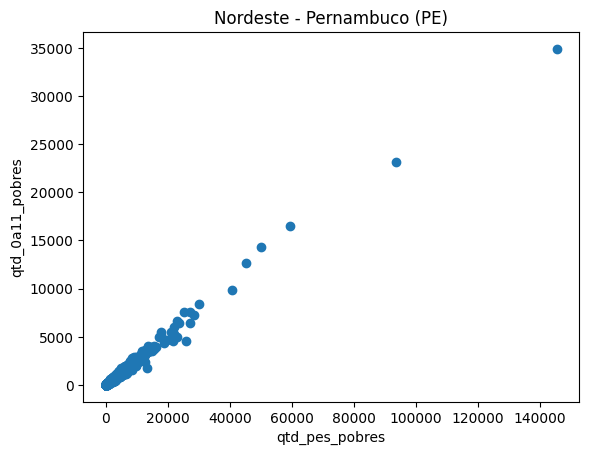

Correlação em Nordeste - Pernambuco (PE): 0.99


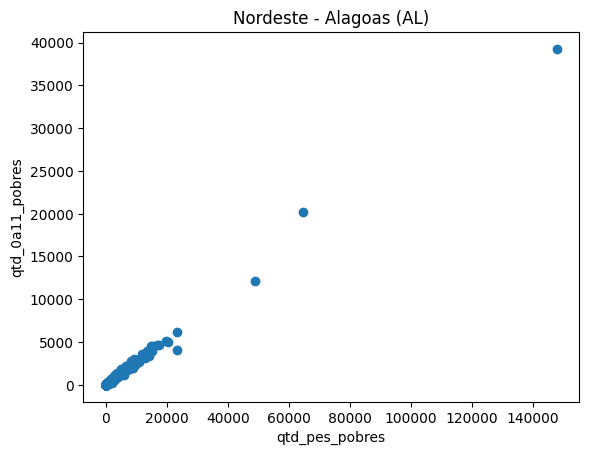

Correlação em Nordeste - Alagoas (AL): 1.00


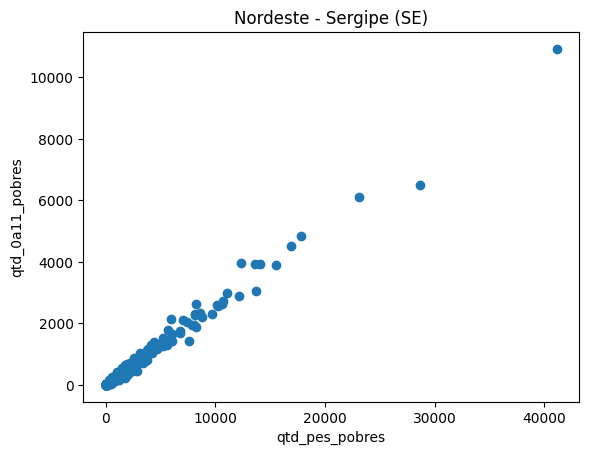

Correlação em Nordeste - Sergipe (SE): 0.99


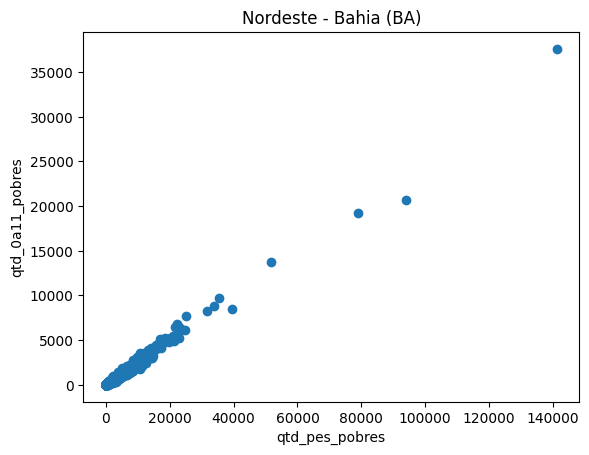

Correlação em Nordeste - Bahia (BA): 0.99


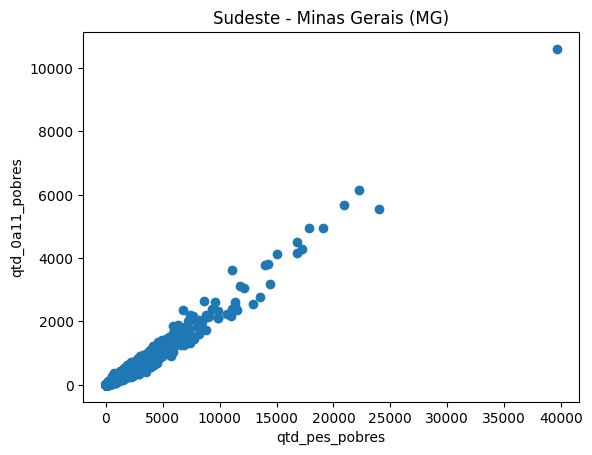

Correlação em Sudeste - Minas Gerais (MG): 0.99


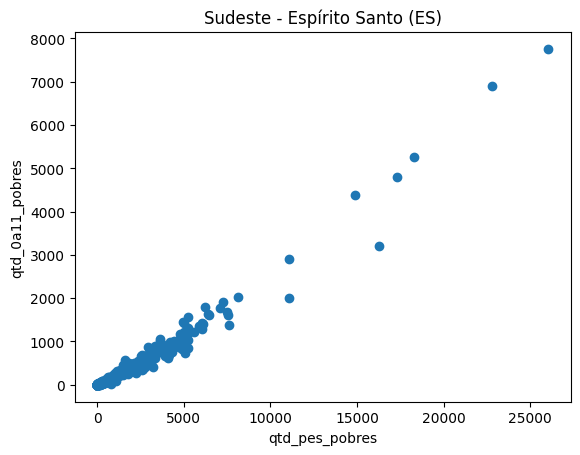

Correlação em Sudeste - Espírito Santo (ES): 0.98


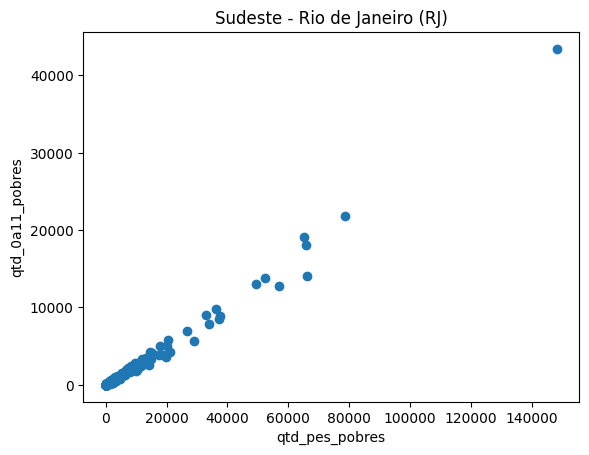

Correlação em Sudeste - Rio de Janeiro (RJ): 0.99


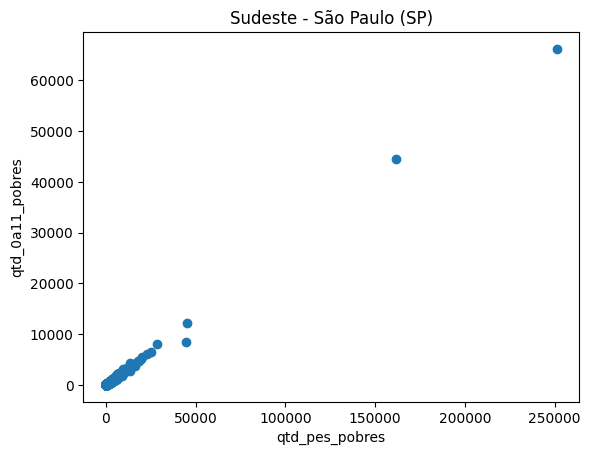

Correlação em Sudeste - São Paulo (SP): 1.00


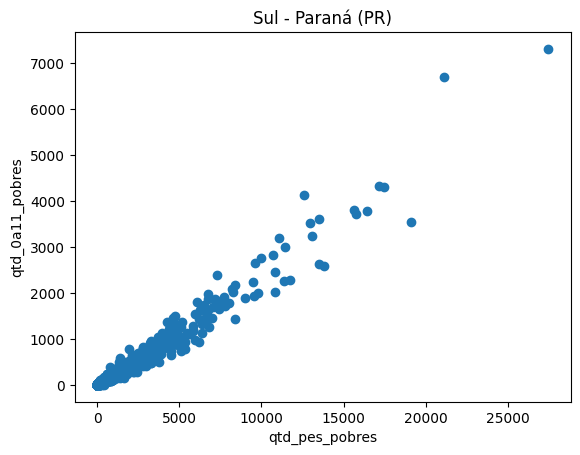

Correlação em Sul - Paraná (PR): 0.98


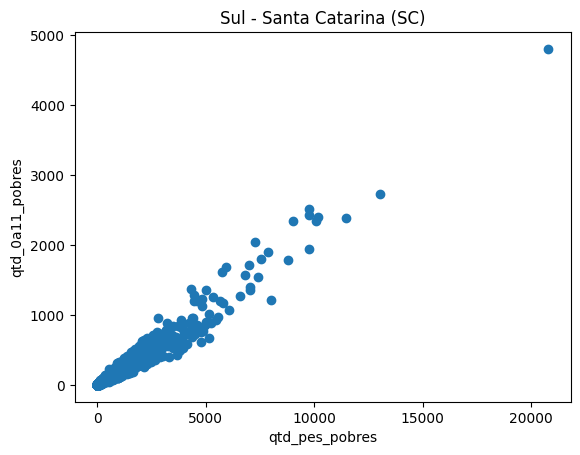

Correlação em Sul - Santa Catarina (SC): 0.98


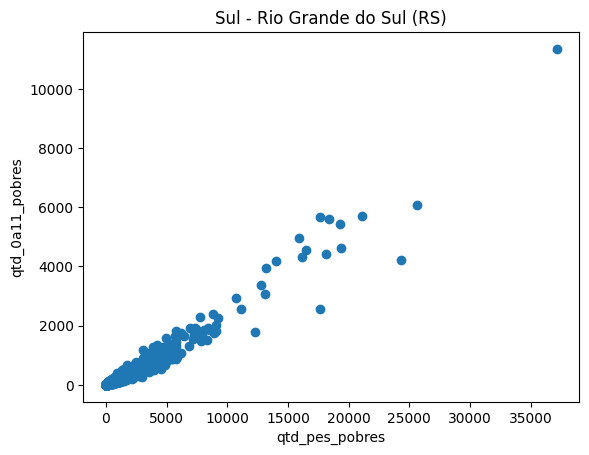

Correlação em Sul - Rio Grande do Sul (RS): 0.97


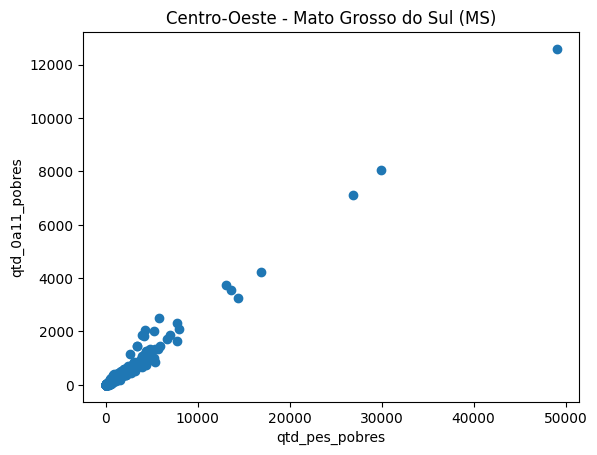

Correlação em Centro-Oeste - Mato Grosso do Sul (MS): 0.99


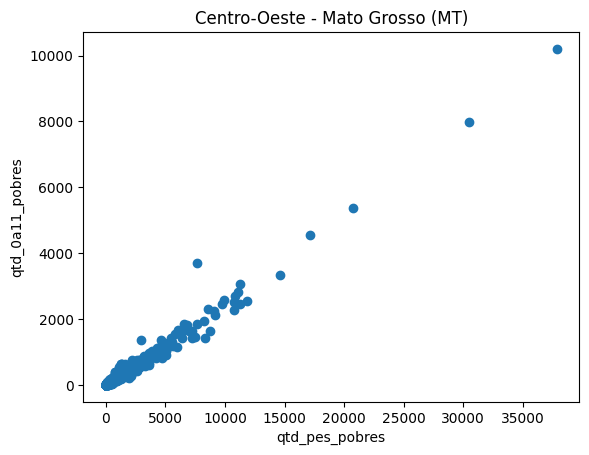

Correlação em Centro-Oeste - Mato Grosso (MT): 0.99


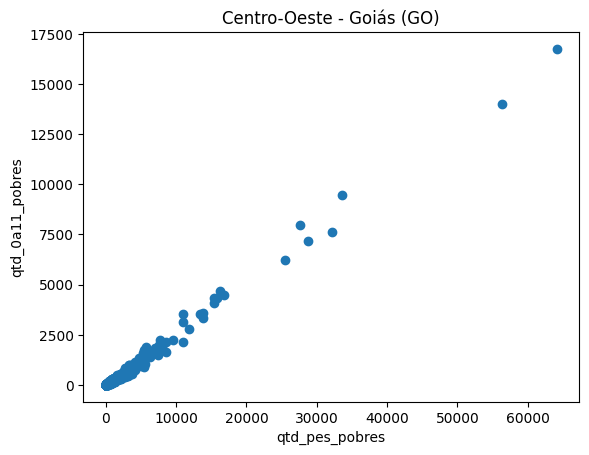

Correlação em Centro-Oeste - Goiás (GO): 1.00


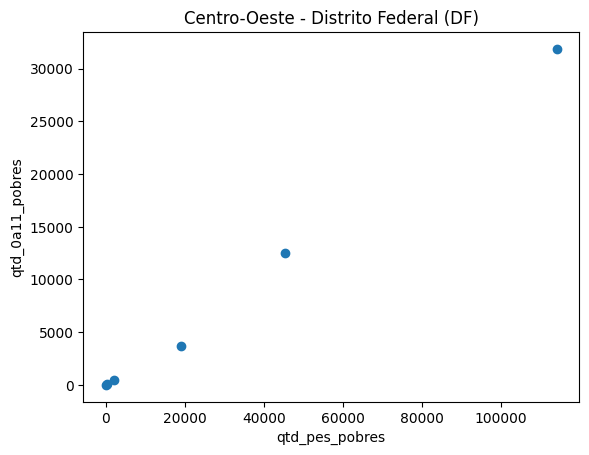

Correlação em Centro-Oeste - Distrito Federal (DF): 1.00


In [62]:


# Suponha que você tenha DataFrames para cada região, como 'regiao_norte', 'regiao_nordeste', etc.
# Certifique-se de que cada DataFrame tenha as colunas 'qtd_pes_pobres' e 'qtd_0a11_pobres'.

# Lista de DataFrames das regiões
regioes = [regiao_norte, regiao_nordeste, regiao_sudeste, regiao_sul, regiao_centro_oeste]

# Títulos das regiões
titulos = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

# Nome das colunas que você deseja plotar
coluna1 = 'qtd_pes_pobres'
coluna2 = 'qtd_0a11_pobres'

# Loop para criar gráficos de dispersão e calcular a correlação em cada região
for regiao, titulo in zip(regioes, titulos):
    for estado in regiao.keys():
        estado_dataframe = regiao[estado]
        # Verifique se as colunas desejadas existem no DataFrame
        if coluna1 in estado_dataframe.columns and coluna2 in estado_dataframe.columns:
            # Plotar gráfico de dispersão
            plt.scatter(estado_dataframe[coluna1], estado_dataframe[coluna2])
            plt.xlabel(coluna1)
            plt.ylabel(coluna2)
            plt.title(f'{titulo} - {estado}')
            plt.show()

            # Calcular a correlação entre as duas colunas
            correlacao = estado_dataframe[coluna1].corr(estado_dataframe[coluna2])
            print(f'Correlação em {titulo} - {estado}: {correlacao:.2f}')


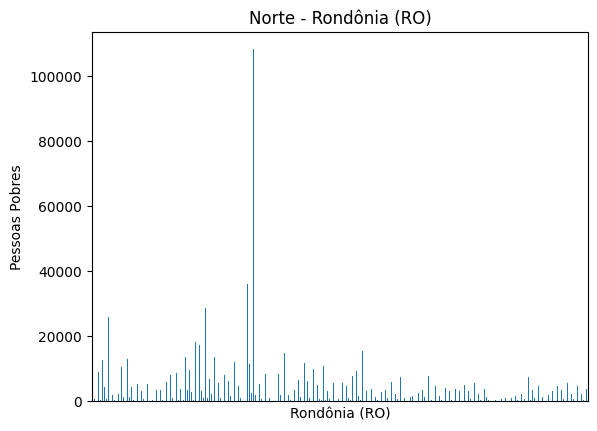

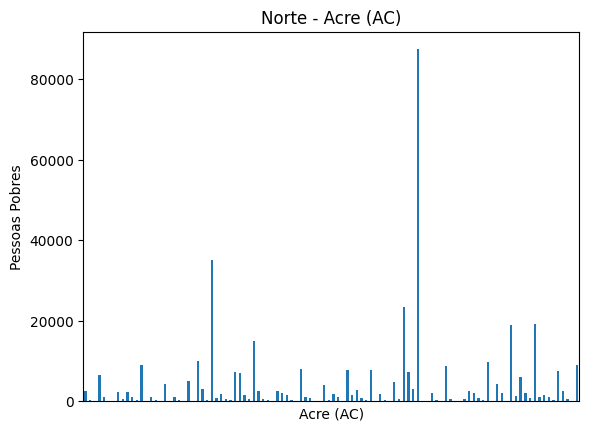

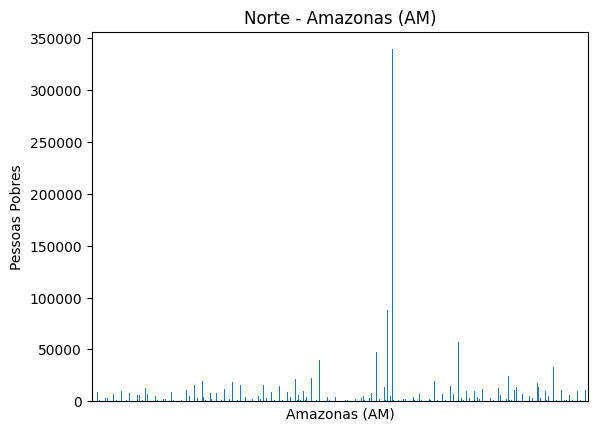

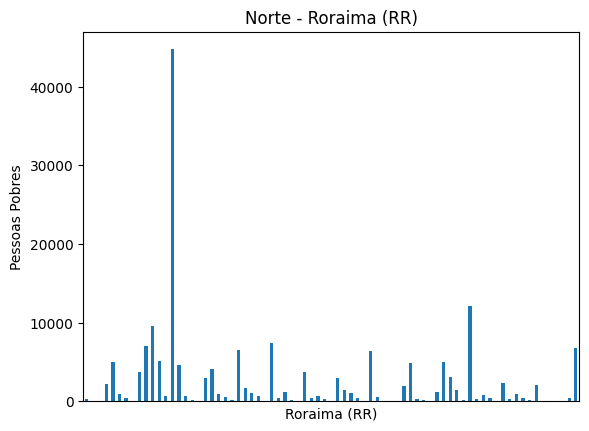

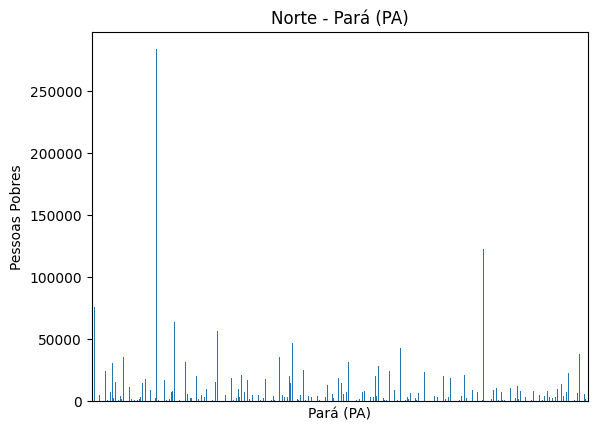

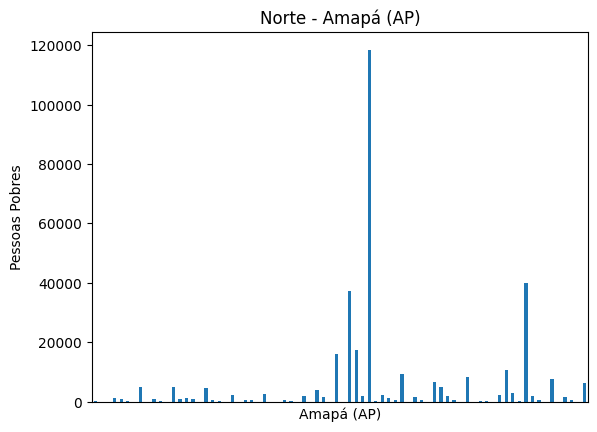

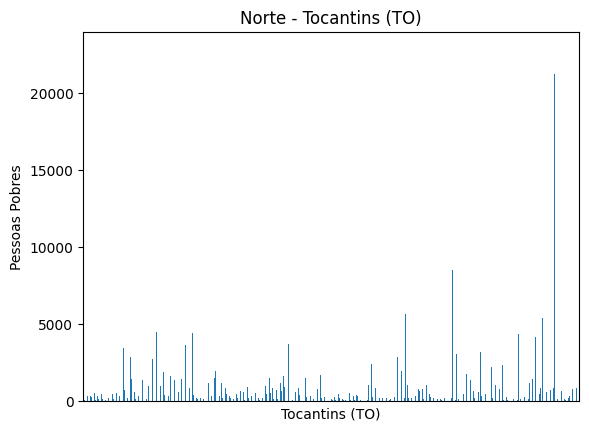

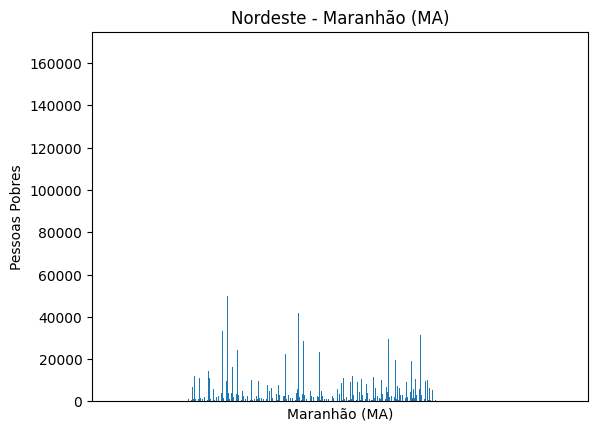

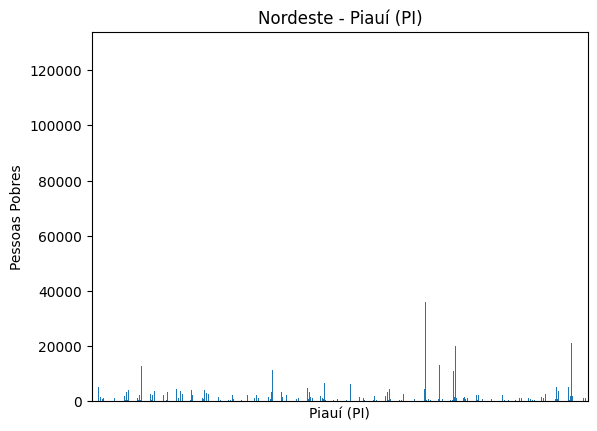

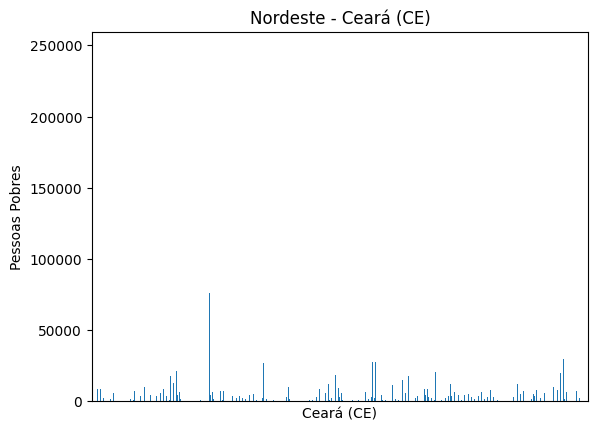

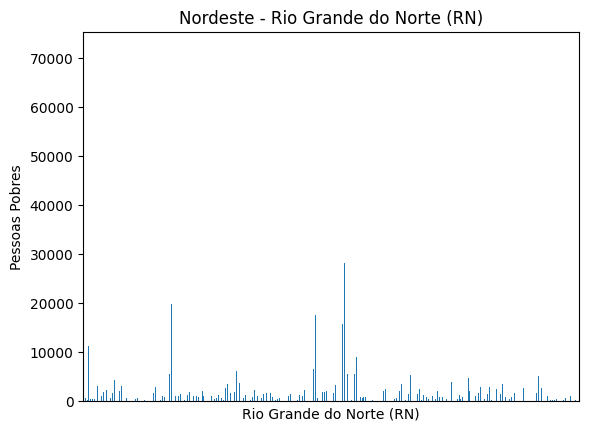

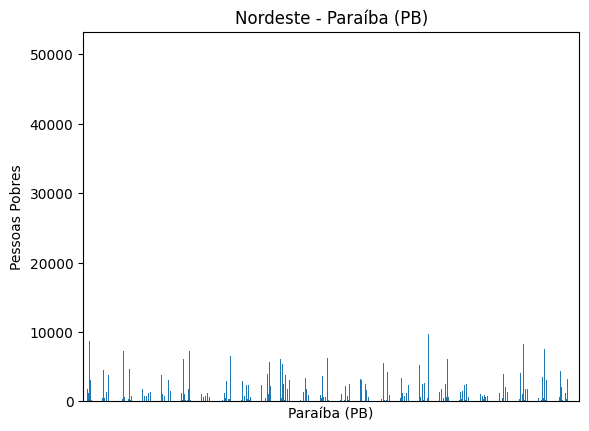

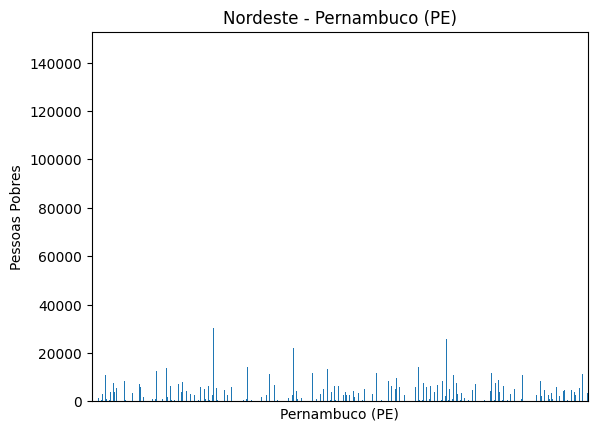

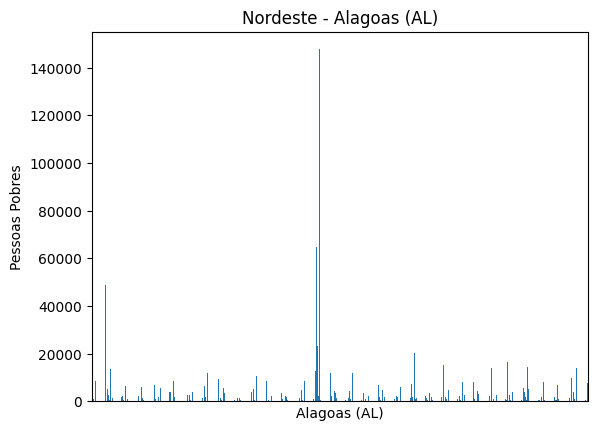

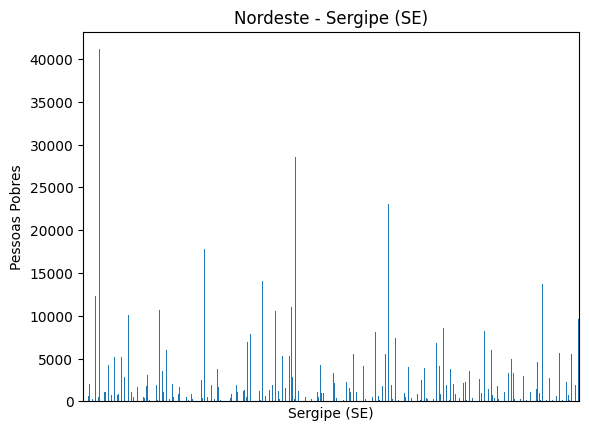

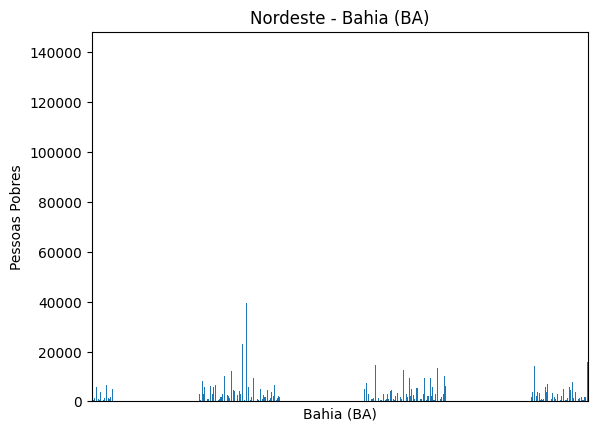

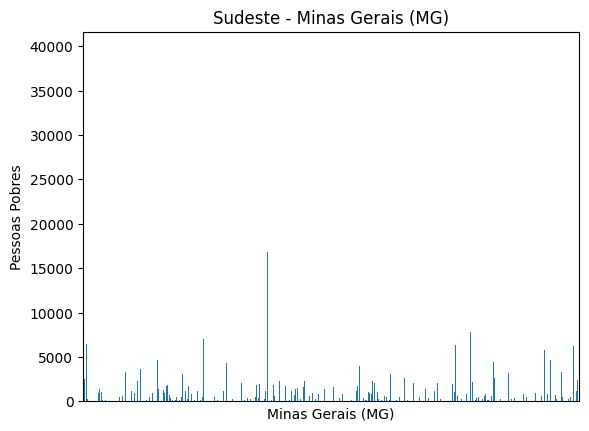

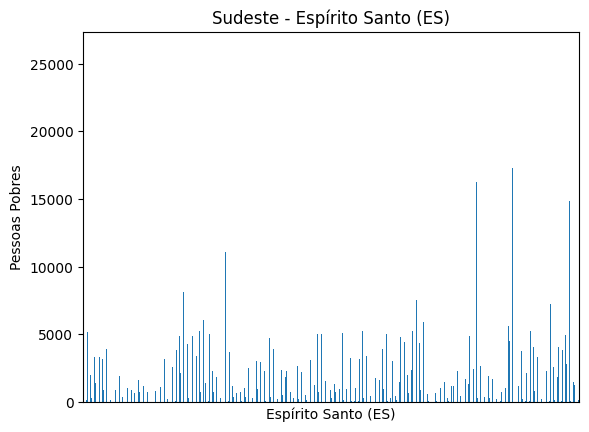

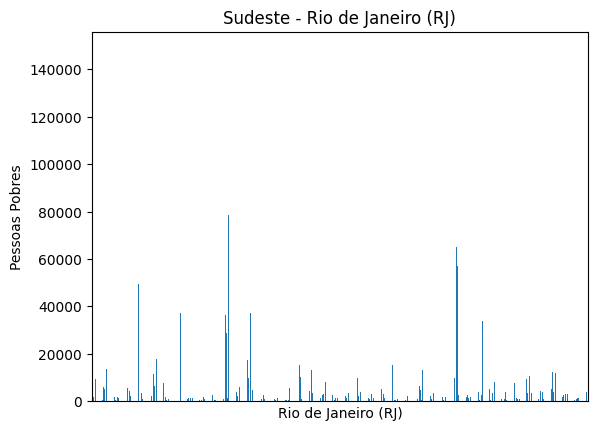

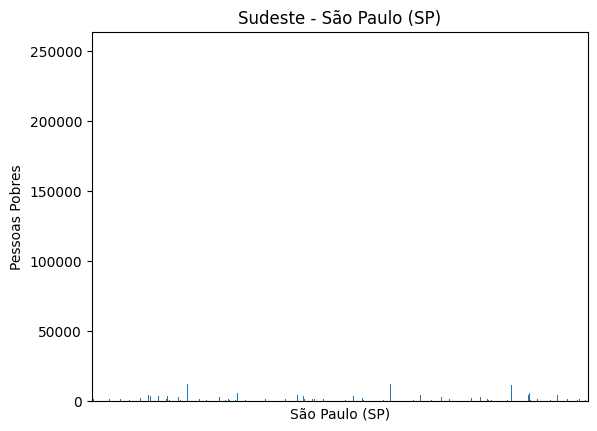

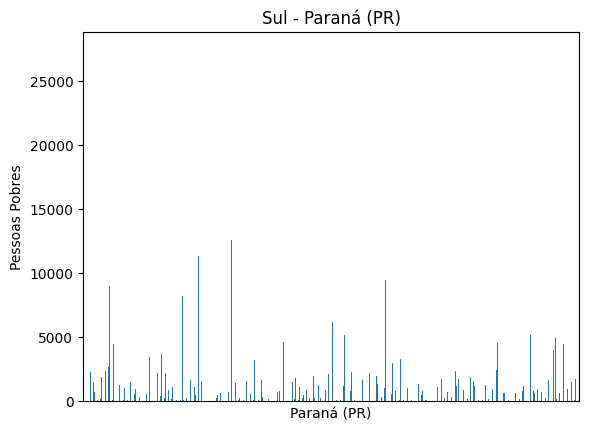

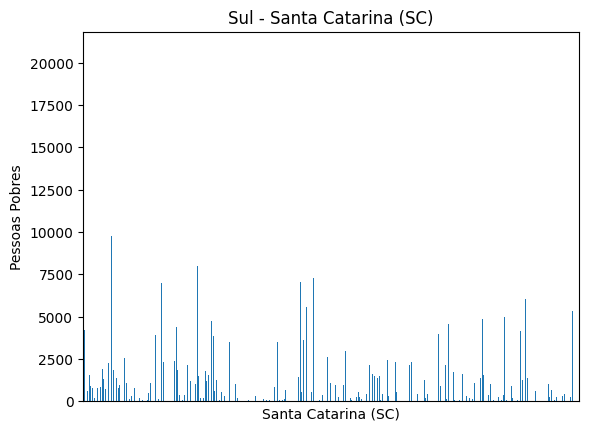

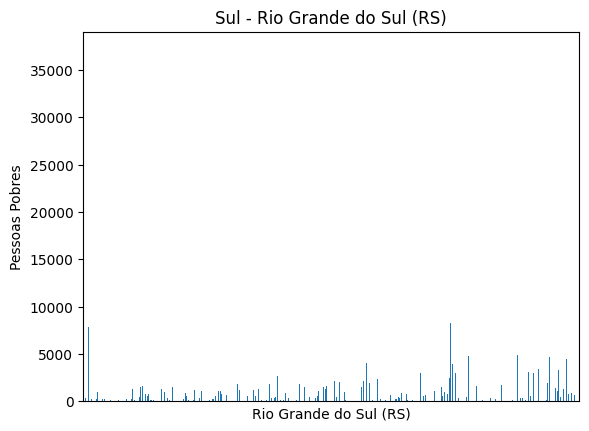

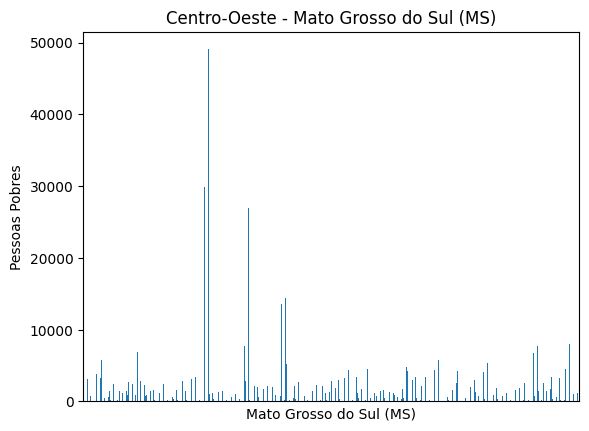

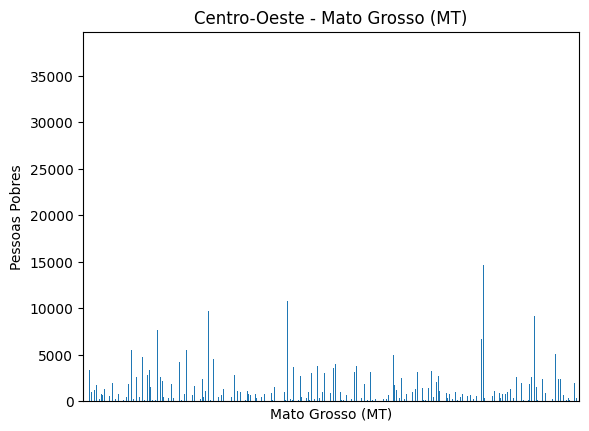

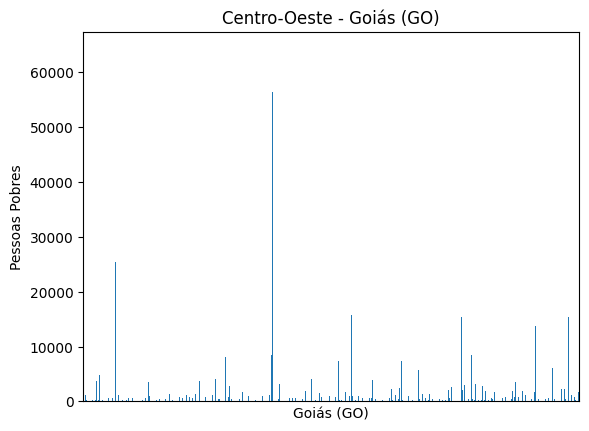

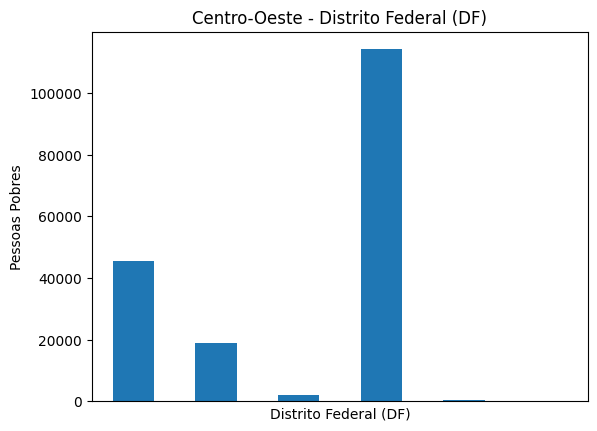

In [63]:


# Suponha que 'regiao_norte', 'regiao_nordeste', 'regiao_sudeste', 'regiao_sul', 'regiao_centro_oeste' já sejam DataFrames para as respectivas regiões

# Lista de DataFrames das regiões
regioes = [regiao_norte, regiao_nordeste, regiao_sudeste, regiao_sul, regiao_centro_oeste]

# Títulos das regiões
titulos = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']


nome_da_coluna = 'qtd_pes_pobres'

# Loop para criar gráficos de barras para a coluna em cada estado de cada região
for regiao, titulo in zip(regioes, titulos):
    for estado in regiao.keys():
        # Crie um gráfico de barras para a coluna em cada estado
        estado_dataframe = regiao[estado]
        estado_dataframe[nome_da_coluna].plot(kind='bar')
        plt.xticks([])
        plt.xlabel(estado )
        plt.ylabel('Pessoas Pobres')
        plt.title(f'{titulo} - {estado}')
        plt.show()


In [64]:
# Suponha que 'regiao_sudeste' seja o DataFrame da região Sudeste
# 'qtd_pessoas' está nos estados

# Soma a coluna 'qtd_pessoas' em cada estado
soma_qtd_pessoas_sp = regiao_sudeste['São Paulo (SP)']['qtd_pessoas'].sum()
soma_qtd_pessoas_rj = regiao_sudeste['Rio de Janeiro (RJ)']['qtd_pessoas'].sum()
soma_qtd_pessoas_mg = regiao_sudeste['Minas Gerais (MG)']['qtd_pessoas'].sum()
soma_qtd_pessoas_es = regiao_sudeste['Espírito Santo (ES)']['qtd_pessoas'].sum()

# Soma os valores dos estados para obter o total da região
soma_qtd_pessoas_regiao_sudeste = soma_qtd_pessoas_sp + soma_qtd_pessoas_rj + soma_qtd_pessoas_mg + soma_qtd_pessoas_es

print(f"Total de pessoas na região Sudeste: {soma_qtd_pessoas_regiao_sudeste}")

# Suponha que 'regiao_sudeste' seja o DataFrame da região Sudeste
# 'qtd_pes_pobres' está nos estados

# Soma a coluna 'qtd_pes_pobres' em cada estado
soma_qtd_pes_pobres_sp = regiao_sudeste['São Paulo (SP)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_rj = regiao_sudeste['Rio de Janeiro (RJ)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_mg = regiao_sudeste['Minas Gerais (MG)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_es = regiao_sudeste['Espírito Santo (ES)']['qtd_pes_pobres'].sum()

# Soma os valores dos estados para obter o total da região
soma_qtd_pes_pobres_regiao_sudeste = soma_qtd_pes_pobres_sp + soma_qtd_pes_pobres_rj + soma_qtd_pes_pobres_mg + soma_qtd_pes_pobres_es

print(f"Total de pessoas pobres na região Sudeste: {soma_qtd_pes_pobres_regiao_sudeste}")



Total de pessoas na região Sudeste: 80364409.99999964
Total de pessoas pobres na região Sudeste: 8295707.2646137485


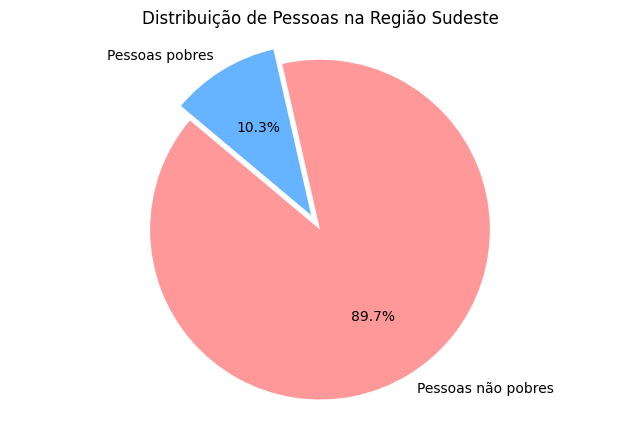

In [65]:


# Dados
total_pessoas = 80364410
total_pessoas_pobres = 8295708

# Rótulos para o gráfico
labels = ['Pessoas não pobres', 'Pessoas pobres']

# Dados para cada categoria
sizes = [total_pessoas - total_pessoas_pobres, total_pessoas_pobres]

# Cores para cada categoria
colors = ['#ff9999', '#66b3ff']

# Explodir a segunda fatia (Pessoas pobres)
explode = (0.1, 0)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribuição de Pessoas na Região Sudeste")

# Mostrar o gráfico
plt.axis('equal')
plt.show()


Total de pessoas na região Nordeste: 53081949.999999985
Total de pessoas pobres na região Nordeste: 20559194.891400725


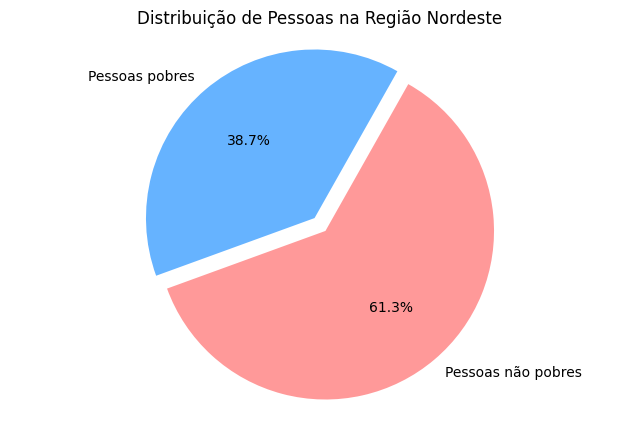

In [66]:
# Suponha que 'regiao_nordeste' seja o DataFrame da região Nordeste

# Lista de estados da região Nordeste
estados_nordeste = ['Pernambuco (PE)', 'Bahia (BA)', 'Ceará (CE)', 'Alagoas (AL)', 'Maranhão (MA)', 'Paraíba (PB)', 'Piauí (PI)', 'Rio Grande do Norte (RN)', 'Sergipe (SE)']

# Função para calcular a soma de uma coluna em um estado específico
def soma_coluna_estado(dataframe, estado, coluna):
    return dataframe[estado][coluna].sum()

# Função para calcular a soma de uma coluna em toda a região Nordeste
def soma_coluna_regiao(dataframe, estados, coluna):
    total_regiao = sum(soma_coluna_estado(dataframe, estado, coluna) for estado in estados)
    return total_regiao

# Exemplo de cálculo da soma de 'qtd_pessoas' na região Nordeste
total_pessoas_regiao_nordeste = soma_coluna_regiao(regiao_nordeste, estados_nordeste, 'qtd_pessoas')

print(f"Total de pessoas na região Nordeste: {total_pessoas_regiao_nordeste}")

# Exemplo de cálculo da soma de 'qtd_pes_pobres' na região Nordeste
total_pessoas_pobres_regiao_nordeste = soma_coluna_regiao(regiao_nordeste, estados_nordeste, 'qtd_pes_pobres')

print(f"Total de pessoas pobres na região Nordeste: {total_pessoas_pobres_regiao_nordeste}")



# Dados
total_pessoas_nordeste = 53081949.999999985
total_pessoas_pobres_nordeste = 20559194.891400725

# Rótulos para o gráfico
labels = ['Pessoas não pobres', 'Pessoas pobres']

# Dados para cada categoria
sizes = [total_pessoas_nordeste - total_pessoas_pobres_nordeste, total_pessoas_pobres_nordeste]

# Cores para cada categoria
colors = ['#ff9999', '#66b3ff']

# Explodir a segunda fatia (Pessoas pobres)
explode = (0.1, 0)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=200, explode=explode)
plt.title("Distribuição de Pessoas na Região Nordeste")

# Mostrar o gráfico
plt.axis('equal')
plt.show()



Total de pessoas na região Sul: 27386891.000000082
Total de pessoas pobres na região Sul: 4605876.761115318


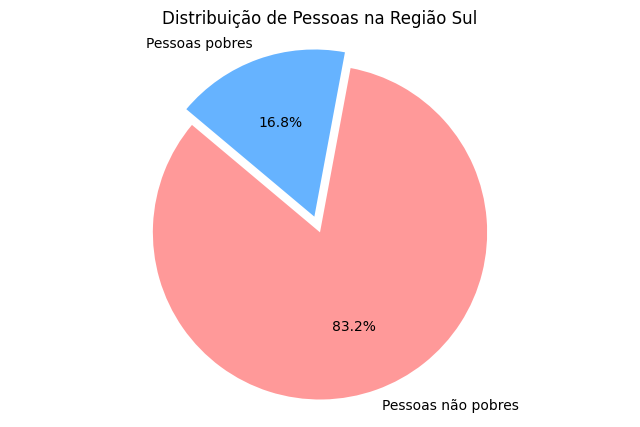

In [67]:
# Soma a coluna 'qtd_pessoas' em cada estado da região Sul
soma_qtd_pessoas_rs = regiao_sul['Rio Grande do Sul (RS)']['qtd_pessoas'].sum()
soma_qtd_pessoas_sc = regiao_sul['Santa Catarina (SC)']['qtd_pessoas'].sum()
soma_qtd_pessoas_pr = regiao_sul['Paraná (PR)']['qtd_pessoas'].sum()

# Soma os valores dos estados para obter o total da região Sul
soma_qtd_pessoas_regiao_sul = soma_qtd_pessoas_rs + soma_qtd_pessoas_sc + soma_qtd_pessoas_pr

# Soma a coluna 'qtd_pes_pobres' em cada estado da região Sul
soma_qtd_pes_pobres_rs = regiao_sul['Rio Grande do Sul (RS)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_sc = regiao_sul['Santa Catarina (SC)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_pr = regiao_sul['Paraná (PR)']['qtd_pes_pobres'].sum()

# Soma os valores dos estados para obter o total de pessoas pobres na região Sul
soma_qtd_pes_pobres_regiao_sul = soma_qtd_pes_pobres_rs + soma_qtd_pes_pobres_sc + soma_qtd_pes_pobres_pr

print(f"Total de pessoas na região Sul: {soma_qtd_pessoas_regiao_sul}")
print(f"Total de pessoas pobres na região Sul: {soma_qtd_pes_pobres_regiao_sul}")



# Dados
total_pessoas_sul = soma_qtd_pessoas_regiao_sul
total_pessoas_pobres_sul = soma_qtd_pes_pobres_regiao_sul

# Rótulos para o gráfico
labels = ['Pessoas não pobres', 'Pessoas pobres']

# Dados para cada categoria
sizes = [total_pessoas_sul - total_pessoas_pobres_sul, total_pessoas_pobres_sul]

# Cores para cada categoria
colors = ['#ff9999', '#66b3ff']

# Explodir a segunda fatia (Pessoas pobres)
explode = (0.1, 0)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribuição de Pessoas na Região Sul")

# Mostrar o gráfico
plt.axis('equal')
plt.show()


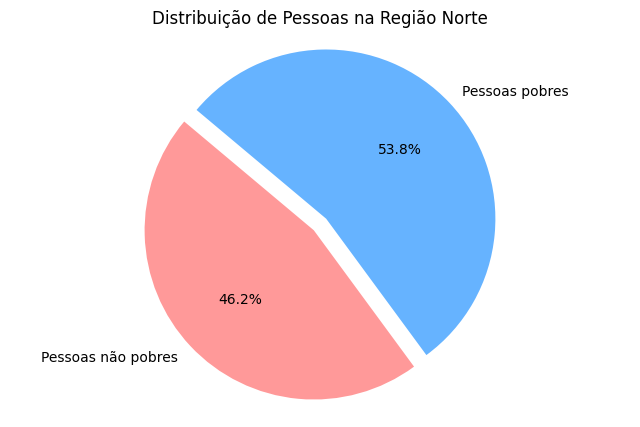

In [68]:


# Cálculo da Região Norte
soma_qtd_pessoas_am = regiao_norte['Amazonas (AM)']['qtd_pessoas'].sum()
soma_qtd_pessoas_pa = regiao_norte['Pará (PA)']['qtd_pessoas'].sum()
soma_qtd_pessoas_rr = regiao_norte['Roraima (RR)']['qtd_pessoas'].sum()
soma_qtd_pessoas_ap = regiao_norte['Amapá (AP)']['qtd_pessoas'].sum()
soma_qtd_pessoas_to = regiao_norte['Tocantins (TO)']['qtd_pessoas'].sum()
soma_qtd_pessoas_ro = regiao_norte['Rondônia (RO)']['qtd_pessoas'].sum()
soma_qtd_pessoas_ac = regiao_norte['Acre (AC)']['qtd_pessoas'].sum()

soma_qtd_pessoas_regiao_norte = (
    soma_qtd_pessoas_am + soma_qtd_pessoas_pa + soma_qtd_pessoas_rr +
    soma_qtd_pessoas_ap + soma_qtd_pessoas_to + soma_qtd_pessoas_ro +
    soma_qtd_pessoas_ac
)

soma_qtd_pes_pobres_am = regiao_norte['Amazonas (AM)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_pa = regiao_norte['Pará (PA)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_rr = regiao_norte['Roraima (RR)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_ap = regiao_norte['Amapá (AP)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_to = regiao_norte['Tocantins (TO)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_ro = regiao_norte['Rondônia (RO)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_ac = regiao_norte['Acre (AC)']['qtd_pes_pobres'].sum()

soma_qtd_pes_pobres_regiao_norte = (
    soma_qtd_pes_pobres_am + soma_qtd_pes_pobres_pa + soma_qtd_pes_pobres_rr +
    soma_qtd_pes_pobres_ap + soma_qtd_pes_pobres_to + soma_qtd_pes_pobres_ro +
    soma_qtd_pes_pobres_ac
)

# Gráfico de Pizza
total_pessoas_norte = soma_qtd_pessoas_regiao_norte
total_pessoas_pobres_norte = soma_qtd_pes_pobres_regiao_norte

labels = ['Pessoas não pobres', 'Pessoas pobres']
sizes = [total_pessoas_norte - total_pessoas_pobres_norte, total_pessoas_pobres_norte]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribuição de Pessoas na Região Norte")

plt.axis('equal')
plt.show()


Total de pessoas na região Centro-Oeste: 14058093.999999952
Total de pessoas pobres na região Centro-Oeste: 2922156.1466473034


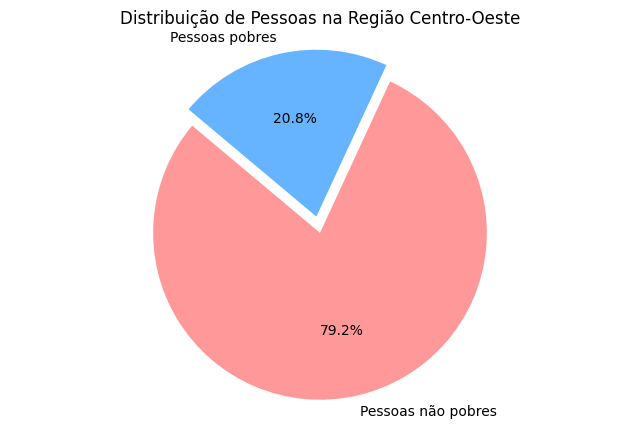

In [69]:
# Suponha que 'regiao_centro_oeste' seja o DataFrame da região Centro-Oeste
# 'qtd_pessoas' e 'qtd_pes_pobres' estão nos estados

# Soma a coluna 'qtd_pessoas' em cada estado
soma_qtd_pessoas_go = regiao_centro_oeste['Goiás (GO)']['qtd_pessoas'].sum()
soma_qtd_pessoas_mt = regiao_centro_oeste['Mato Grosso (MT)']['qtd_pessoas'].sum()
soma_qtd_pessoas_ms = regiao_centro_oeste['Mato Grosso do Sul (MS)']['qtd_pessoas'].sum()
soma_qtd_pessoas_df = regiao_centro_oeste['Distrito Federal (DF)']['qtd_pessoas'].sum()

# Soma os valores dos estados para obter o total da região
soma_qtd_pessoas_regiao_centro_oeste = soma_qtd_pessoas_go + soma_qtd_pessoas_mt + soma_qtd_pessoas_ms + soma_qtd_pessoas_df

# Soma a coluna 'qtd_pes_pobres' em cada estado
soma_qtd_pes_pobres_go = regiao_centro_oeste['Goiás (GO)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_mt = regiao_centro_oeste['Mato Grosso (MT)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_ms = regiao_centro_oeste['Mato Grosso do Sul (MS)']['qtd_pes_pobres'].sum()
soma_qtd_pes_pobres_df = regiao_centro_oeste['Distrito Federal (DF)']['qtd_pes_pobres'].sum()

# Soma os valores dos estados para obter o total de pessoas pobres na região
soma_qtd_pes_pobres_regiao_centro_oeste = soma_qtd_pes_pobres_go + soma_qtd_pes_pobres_mt + soma_qtd_pes_pobres_ms + soma_qtd_pes_pobres_df

print(f"Total de pessoas na região Centro-Oeste: {soma_qtd_pessoas_regiao_centro_oeste}")
print(f"Total de pessoas pobres na região Centro-Oeste: {soma_qtd_pes_pobres_regiao_centro_oeste}")



# Dados
total_pessoas_centro_oeste = soma_qtd_pessoas_regiao_centro_oeste
total_pessoas_pobres_centro_oeste = soma_qtd_pes_pobres_regiao_centro_oeste

# Rótulos para o gráfico
labels_centro_oeste = ['Pessoas não pobres', 'Pessoas pobres']

# Dados para cada categoria
sizes_centro_oeste = [total_pessoas_centro_oeste - total_pessoas_pobres_centro_oeste, total_pessoas_pobres_centro_oeste]

# Cores para cada categoria
colors_centro_oeste = ['#ff9999', '#66b3ff']

# Explodir a segunda fatia (Pessoas pobres)
explode_centro_oeste = (0.1, 0)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 5))
plt.pie(sizes_centro_oeste, labels=labels_centro_oeste, colors=colors_centro_oeste, autopct='%1.1f%%', startangle=140, explode=explode_centro_oeste)
plt.title("Distribuição de Pessoas na Região Centro-Oeste")

# Mostrar o gráfico
plt.axis('equal')
plt.show()


In [70]:
# Dicionário com pesos das variáveis
pesos_variaveis = {
    "contr_E1": 8.33,
    "contr_E2": 8.33,
    "contr_E3": 8.33,
    "contr_S1": 6.25,
    "contr_S2": 6.25,
    "contr_S3": 6.25,
    "contr_S4": 6.25,
    "contr_T1": 8.33,
    "contr_T2": 8.33,
    "contr_T3": 8.33,
    "contr_P1": 6.25,
    "contr_P2": 6.25,
    "contr_P3": 6.25,
    "contr_P4": 6.25,
}

# Exemplo de acesso ao peso de uma variável
variavel = "contr_S2"
peso = pesos_variaveis.get(variavel, 0.0)  # Se a variável não estiver no dicionário, o peso padrão é 0.0

print(f"Peso da variável {variavel}: {peso}")


Peso da variável contr_S2: 6.25


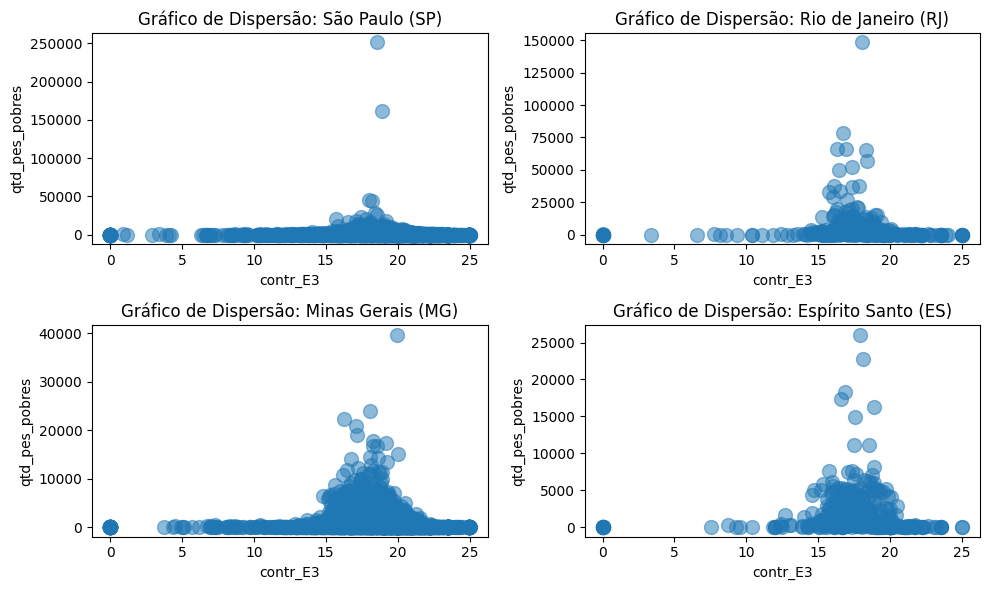

In [71]:


# Suponha que 'regioes' seja o dicionário que contém os DataFrames das regiões
regioes = {
    "Sudeste": regiao_sudeste,  # Substitua 'dados_sudeste' pelo seu DataFrame
    # ... outras regiões ...
}

# Acesse os DataFrames de cada estado na Região Sudeste
dados_sp = regioes["Sudeste"]["São Paulo (SP)"]
dados_rj = regioes["Sudeste"]["Rio de Janeiro (RJ)"]
dados_mg = regioes["Sudeste"]["Minas Gerais (MG)"]
dados_es = regioes["Sudeste"]["Espírito Santo (ES)"]

# Remova as linhas com valores problemáticos (vazios ou caracteres não numéricos)
dados_sp = dados_sp[pd.to_numeric(dados_sp['contr_E3'], errors='coerce').notnull()]
dados_sp = dados_sp[pd.to_numeric(dados_sp['qtd_pes_pobres'], errors='coerce').notnull()]

dados_rj = dados_rj[pd.to_numeric(dados_rj['contr_E3'], errors='coerce').notnull()]
dados_rj = dados_rj[pd.to_numeric(dados_rj['qtd_pes_pobres'], errors='coerce').notnull()]

dados_mg = dados_mg[pd.to_numeric(dados_mg['contr_E3'], errors='coerce').notnull()]
dados_mg = dados_mg[pd.to_numeric(dados_mg['qtd_pes_pobres'], errors='coerce').notnull()]

dados_es = dados_es[pd.to_numeric(dados_es['contr_E3'], errors='coerce').notnull()]
dados_es = dados_es[pd.to_numeric(dados_es['qtd_pes_pobres'], errors='coerce').notnull()]

# Substitua os valores vazios (NaN) por um valor padrão, como 0
dados_sp['contr_E3'].fillna(0, inplace=True)
dados_sp['qtd_pes_pobres'].fillna(0, inplace=True)

dados_rj['contr_E3'].fillna(0, inplace=True)
dados_rj['qtd_pes_pobres'].fillna(0, inplace=True)

dados_mg['contr_E3'].fillna(0, inplace=True)
dados_mg['qtd_pes_pobres'].fillna(0, inplace=True)

dados_es['contr_E3'].fillna(0, inplace=True)
dados_es['qtd_pes_pobres'].fillna(0, inplace=True)

# Criar os gráficos de dispersão
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(dados_sp['contr_E3'], dados_sp['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_E3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: São Paulo (SP)')

plt.subplot(222)
plt.scatter(dados_rj['contr_E3'], dados_rj['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_E3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Rio de Janeiro (RJ)')

plt.subplot(223)
plt.scatter(dados_mg['contr_E3'], dados_mg['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_E3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Minas Gerais (MG)')

plt.subplot(224)
plt.scatter(dados_es['contr_E3'], dados_es['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_E3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Espírito Santo (ES)')

# Ajustar layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


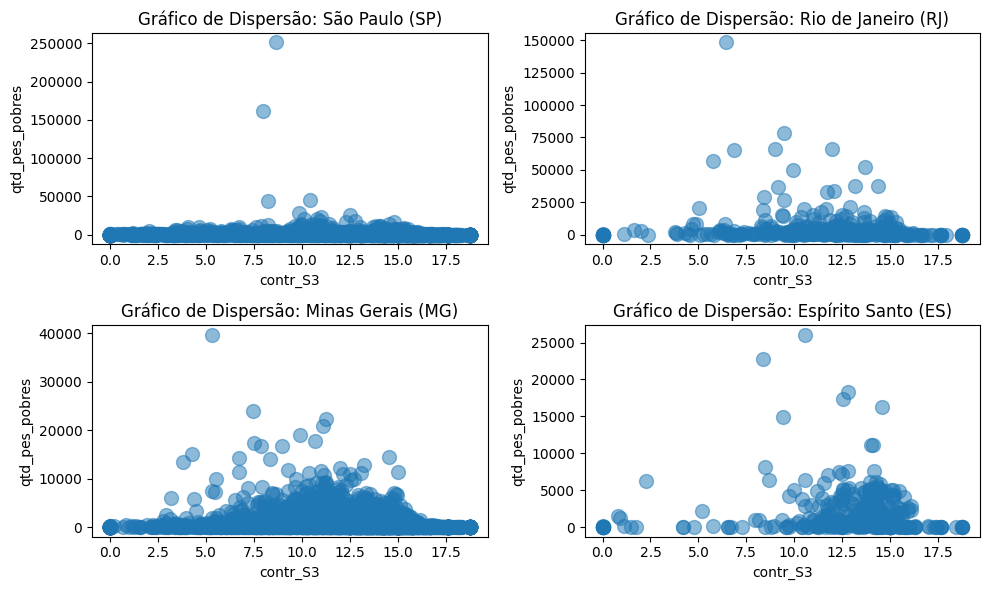

In [72]:

# Suponha que 'regioes' seja o dicionário que contém os DataFrames das regiões
regioes = {
    "Sudeste": regiao_sudeste,  # Substitua 'dados_sudeste' pelo seu DataFrame
    # ... outras regiões ...
}

# Acesse os DataFrames de cada estado na Região Sudeste
dados_sp = regioes["Sudeste"]["São Paulo (SP)"]
dados_rj = regioes["Sudeste"]["Rio de Janeiro (RJ)"]
dados_mg = regioes["Sudeste"]["Minas Gerais (MG)"]
dados_es = regioes["Sudeste"]["Espírito Santo (ES)"]

# Remova as linhas com valores problemáticos (vazios ou caracteres não numéricos)
dados_sp = dados_sp[pd.to_numeric(dados_sp['contr_S3'], errors='coerce').notnull()]
dados_sp = dados_sp[pd.to_numeric(dados_sp['qtd_pes_pobres'], errors='coerce').notnull()]

dados_rj = dados_rj[pd.to_numeric(dados_rj['contr_S3'], errors='coerce').notnull()]
dados_rj = dados_rj[pd.to_numeric(dados_rj['qtd_pes_pobres'], errors='coerce').notnull()]

dados_mg = dados_mg[pd.to_numeric(dados_mg['contr_S3'], errors='coerce').notnull()]
dados_mg = dados_mg[pd.to_numeric(dados_mg['qtd_pes_pobres'], errors='coerce').notnull()]

dados_es = dados_es[pd.to_numeric(dados_es['contr_S3'], errors='coerce').notnull()]
dados_es = dados_es[pd.to_numeric(dados_es['qtd_pes_pobres'], errors='coerce').notnull()]

# Substitua os valores vazios (NaN) por um valor padrão, como 0
dados_sp['contr_S3'].fillna(0, inplace=True)
dados_sp['qtd_pes_pobres'].fillna(0, inplace=True)

dados_rj['contr_S3'].fillna(0, inplace=True)
dados_rj['qtd_pes_pobres'].fillna(0, inplace=True)

dados_mg['contr_S3'].fillna(0, inplace=True)
dados_mg['qtd_pes_pobres'].fillna(0, inplace=True)

dados_es['contr_S3'].fillna(0, inplace=True)
dados_es['qtd_pes_pobres'].fillna(0, inplace=True)

# Criar os gráficos de dispersão
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(dados_sp['contr_S3'], dados_sp['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: São Paulo (SP)')

plt.subplot(222)
plt.scatter(dados_rj['contr_S3'], dados_rj['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Rio de Janeiro (RJ)')

plt.subplot(223)
plt.scatter(dados_mg['contr_S3'], dados_mg['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Minas Gerais (MG)')

plt.subplot(224)
plt.scatter(dados_es['contr_S3'], dados_es['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Espírito Santo (ES)')

# Ajustar layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


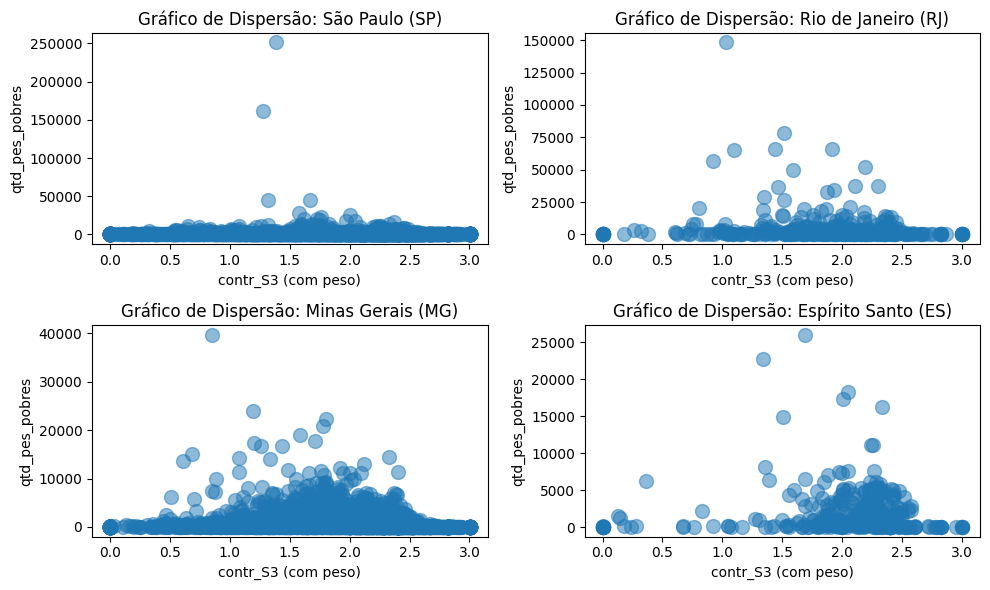

In [73]:

regioes = {
    "Sudeste": regiao_sudeste,

}

# Acesse os DataFrames de cada estado na Região Sudeste
dados_sp = regioes["Sudeste"]["São Paulo (SP)"]
dados_rj = regioes["Sudeste"]["Rio de Janeiro (RJ)"]
dados_mg = regioes["Sudeste"]["Minas Gerais (MG)"]
dados_es = regioes["Sudeste"]["Espírito Santo (ES)"]

# Aplicar o peso 6,25 a 'contr_S3' dividindo por 6,25
dados_sp['contr_S3'] = pd.to_numeric(dados_sp['contr_S3'], errors='coerce') / 6.25
dados_rj['contr_S3'] = pd.to_numeric(dados_rj['contr_S3'], errors='coerce') / 6.25
dados_mg['contr_S3'] = pd.to_numeric(dados_mg['contr_S3'], errors='coerce') / 6.25
dados_es['contr_S3'] = pd.to_numeric(dados_es['contr_S3'], errors='coerce') / 6.25

# Remova as linhas com valores problemáticos (vazios ou caracteres não numéricos)
dados_sp = dados_sp[pd.to_numeric(dados_sp['contr_S3'], errors='coerce').notnull()]
dados_sp = dados_sp[pd.to_numeric(dados_sp['qtd_pes_pobres'], errors='coerce').notnull()]

dados_rj = dados_rj[pd.to_numeric(dados_rj['contr_S3'], errors='coerce').notnull()]
dados_rj = dados_rj[pd.to_numeric(dados_rj['qtd_pes_pobres'], errors='coerce').notnull()]

dados_mg = dados_mg[pd.to_numeric(dados_mg['contr_S3'], errors='coerce').notnull()]
dados_mg = dados_mg[pd.to_numeric(dados_mg['qtd_pes_pobres'], errors='coerce').notnull()]

dados_es = dados_es[pd.to_numeric(dados_es['contr_S3'], errors='coerce').notnull()]
dados_es = dados_es[pd.to_numeric(dados_es['qtd_pes_pobres'], errors='coerce').notnull()]

# Substitua os valores vazios (NaN) por um valor padrão, como 0
dados_sp['contr_S3'].fillna(0, inplace=True)
dados_sp['qtd_pes_pobres'].fillna(0, inplace=True)

dados_rj['contr_S3'].fillna(0, inplace=True)
dados_rj['qtd_pes_pobres'].fillna(0, inplace=True)

dados_mg['contr_S3'].fillna(0, inplace=True)
dados_mg['qtd_pes_pobres'].fillna(0, inplace=True)

dados_es['contr_S3'].fillna(0, inplace=True)
dados_es['qtd_pes_pobres'].fillna(0, inplace=True)

# Criar os gráficos de dispersão
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(dados_sp['contr_S3'], dados_sp['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: São Paulo (SP)')

plt.subplot(222)
plt.scatter(dados_rj['contr_S3'], dados_rj['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Rio de Janeiro (RJ)')

plt.subplot(223)
plt.scatter(dados_mg['contr_S3'], dados_mg['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Minas Gerais (MG)')

plt.subplot(224)
plt.scatter(dados_es['contr_S3'], dados_es['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Gráfico de Dispersão: Espírito Santo (ES)')

# Exibir o gráfico
plt.tight_layout()
plt.show()


O gráfico de dispersão mostra uma relação positiva entre a quantidade de pessoas pobres e a proporção de domicílios em que o esgoto do banheiro ou sanitário não é lançado em rede geral. Em outras palavras, quanto maior a proporção de domicílios sem saneamento básico, maior o número de pessoas pobres.

Essa relação pode ser explicada por uma série de fatores, incluindo:

- A falta de saneamento básico pode levar a doenças, o que pode reduzir a capacidade de trabalho das pessoas e, consequentemente, sua renda.

- A falta de saneamento básico pode também dificultar a frequência escolar das crianças, o que pode limitar suas oportunidades de emprego e renda no futuro.

- A falta de saneamento básico pode também reduzir a qualidade de vida das pessoas, o que pode levar a um estado de pobreza.

A análise dos gráficos de dispersão de cada estado da região Sudeste confirma essa relação. Em todos os estados, a proporção de domicílios sem saneamento básico é maior nos municípios com maior número de pessoas pobres.

Os gráficos também mostram que a relação entre a quantidade de pessoas pobres e a proporção de domicílios sem saneamento básico é mais forte em São Paulo e Rio de Janeiro, os estados mais populosos da região. Isso pode ser explicado pelo fato de que esses estados também apresentam as maiores desigualdades sociais.

Em conclusão, o gráfico de dispersão mostra que a falta de saneamento básico é um importante fator de pobreza na região Sudeste do Brasil. Medidas para melhorar o saneamento básico na região podem contribuir para a redução da pobreza.
*
Aqui estão algumas recomendações para melhorar o saneamento básico na região Sudeste:
*

- Investir na construção de redes de esgoto e tratamento de água.

- Fornecer incentivos financeiros para a construção de banheiros adequados.

- Promover campanhas de conscientização sobre a importância do saneamento básico.


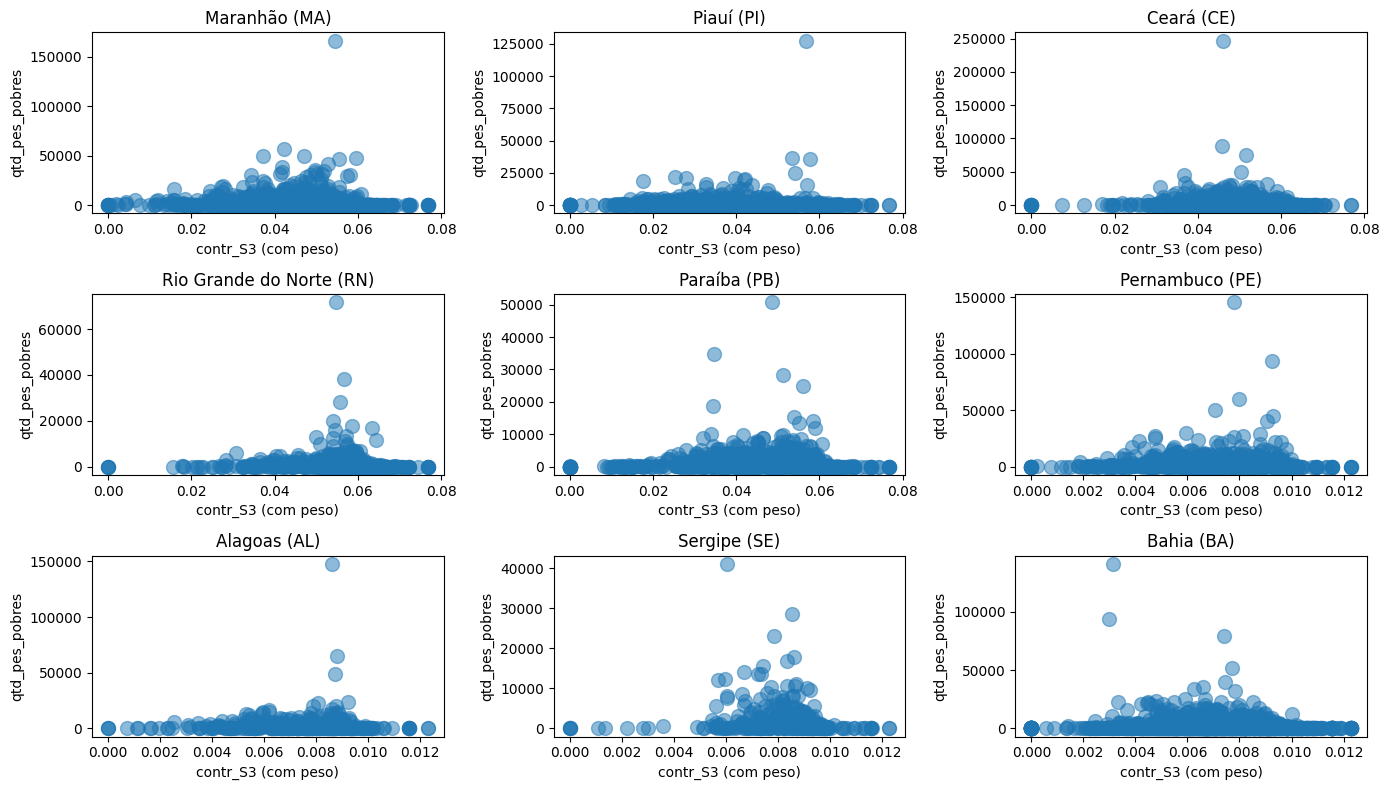

In [146]:

regioes = {
    "Nordeste": regiao_nordeste,
}

# Acesse os DataFrames de cada estado na Região Nordeste
dados_ma = regioes["Nordeste"]["Maranhão (MA)"]
dados_pi = regioes["Nordeste"]["Piauí (PI)"]
dados_ce = regioes["Nordeste"]["Ceará (CE)"]
dados_rn = regioes["Nordeste"]["Rio Grande do Norte (RN)"]
dados_pb = regioes["Nordeste"]["Paraíba (PB)"]
dados_pe = regioes["Nordeste"]["Pernambuco (PE)"]
dados_al = regioes["Nordeste"]["Alagoas (AL)"]
dados_se = regioes["Nordeste"]["Sergipe (SE)"]
dados_ba = regioes["Nordeste"]["Bahia (BA)"]

# Aplicar o peso 6,25 a 'contr_S3' dividindo por 6,25
dados_ma['contr_S3'] = pd.to_numeric(dados_ma['contr_S3'], errors='coerce')
dados_pi['contr_S3'] = pd.to_numeric(dados_pi['contr_S3'], errors='coerce')
dados_ce['contr_S3'] = pd.to_numeric(dados_ce['contr_S3'], errors='coerce')
dados_rn['contr_S3'] = pd.to_numeric(dados_rn['contr_S3'], errors='coerce')
dados_pb['contr_S3'] = pd.to_numeric(dados_pb['contr_S3'], errors='coerce')
dados_pe['contr_S3'] = pd.to_numeric(dados_pe['contr_S3'], errors='coerce') / 6.25
dados_al['contr_S3'] = pd.to_numeric(dados_al['contr_S3'], errors='coerce') / 6.25
dados_se['contr_S3'] = pd.to_numeric(dados_se['contr_S3'], errors='coerce') / 6.25
dados_ba['contr_S3'] = pd.to_numeric(dados_ba['contr_S3'], errors='coerce') / 6.25

# Remova as linhas com valores problemáticos (vazios ou caracteres não numéricos)
dados_ma = dados_ma[pd.to_numeric(dados_ma['contr_S3'], errors='coerce').notnull()]
dados_ma = dados_ma[pd.to_numeric(dados_ma['qtd_pes_pobres'], errors='coerce').notnull()]

dados_pi = dados_pi[pd.to_numeric(dados_pi['contr_S3'], errors='coerce').notnull()]
dados_pi = dados_pi[pd.to_numeric(dados_pi['qtd_pes_pobres'], errors='coerce').notnull()]

dados_ce = dados_ce[pd.to_numeric(dados_ce['contr_S3'], errors='coerce').notnull()]
dados_ce = dados_ce[pd.to_numeric(dados_ce['qtd_pes_pobres'], errors='coerce').notnull()]

dados_rn = dados_rn[pd.to_numeric(dados_rn['contr_S3'], errors='coerce').notnull()]
dados_rn = dados_rn[pd.to_numeric(dados_rn['qtd_pes_pobres'], errors='coerce').notnull()]

dados_pb = dados_pb[pd.to_numeric(dados_pb['contr_S3'], errors='coerce').notnull()]
dados_pb = dados_pb[pd.to_numeric(dados_pb['qtd_pes_pobres'], errors='coerce').notnull()]

dados_pe = dados_pe[pd.to_numeric(dados_pe['contr_S3'], errors='coerce').notnull()]
dados_pe = dados_pe[pd.to_numeric(dados_pe['qtd_pes_pobres'], errors='coerce').notnull()]

dados_al = dados_al[pd.to_numeric(dados_al['contr_S3'], errors='coerce').notnull()]
dados_al = dados_al[pd.to_numeric(dados_al['qtd_pes_pobres'], errors='coerce').notnull()]

dados_se = dados_se[pd.to_numeric(dados_se['contr_S3'], errors='coerce').notnull()]
dados_se = dados_se[pd.to_numeric(dados_se['qtd_pes_pobres'], errors='coerce').notnull()]

dados_ba = dados_ba[pd.to_numeric(dados_ba['contr_S3'], errors='coerce').notnull()]
dados_ba = dados_ba[pd.to_numeric(dados_ba['qtd_pes_pobres'], errors='coerce').notnull()]

# Criar o gráfico de dispersão
plt.figure(figsize=(14, 8))

# Estado: Maranhão
plt.subplot(331)
plt.scatter(dados_ma['contr_S3'], dados_ma['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Maranhão (MA)')

# Estado: Piauí
plt.subplot(332)
plt.scatter(dados_pi['contr_S3'], dados_pi['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Piauí (PI)')

# Estado: Ceará
plt.subplot(333)
plt.scatter(dados_ce['contr_S3'], dados_ce['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Ceará (CE)')

# Estado: Rio Grande do Norte
plt.subplot(334)
plt.scatter(dados_rn['contr_S3'], dados_rn['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Rio Grande do Norte (RN)')

# Estado: Paraíba
plt.subplot(335)
plt.scatter(dados_pb['contr_S3'], dados_pb['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Paraíba (PB)')

# Estado: Pernambuco
plt.subplot(336)
plt.scatter(dados_pe['contr_S3'], dados_pe['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Pernambuco (PE)')

# Estado: Alagoas
plt.subplot(337)
plt.scatter(dados_al['contr_S3'], dados_al['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Alagoas (AL)')

# Estado: Sergipe
plt.subplot(338)
plt.scatter(dados_se['contr_S3'], dados_se['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Sergipe (SE)')

# Estado: Bahia
plt.subplot(339)
plt.scatter(dados_ba['contr_S3'], dados_ba['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Bahia (BA)')

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


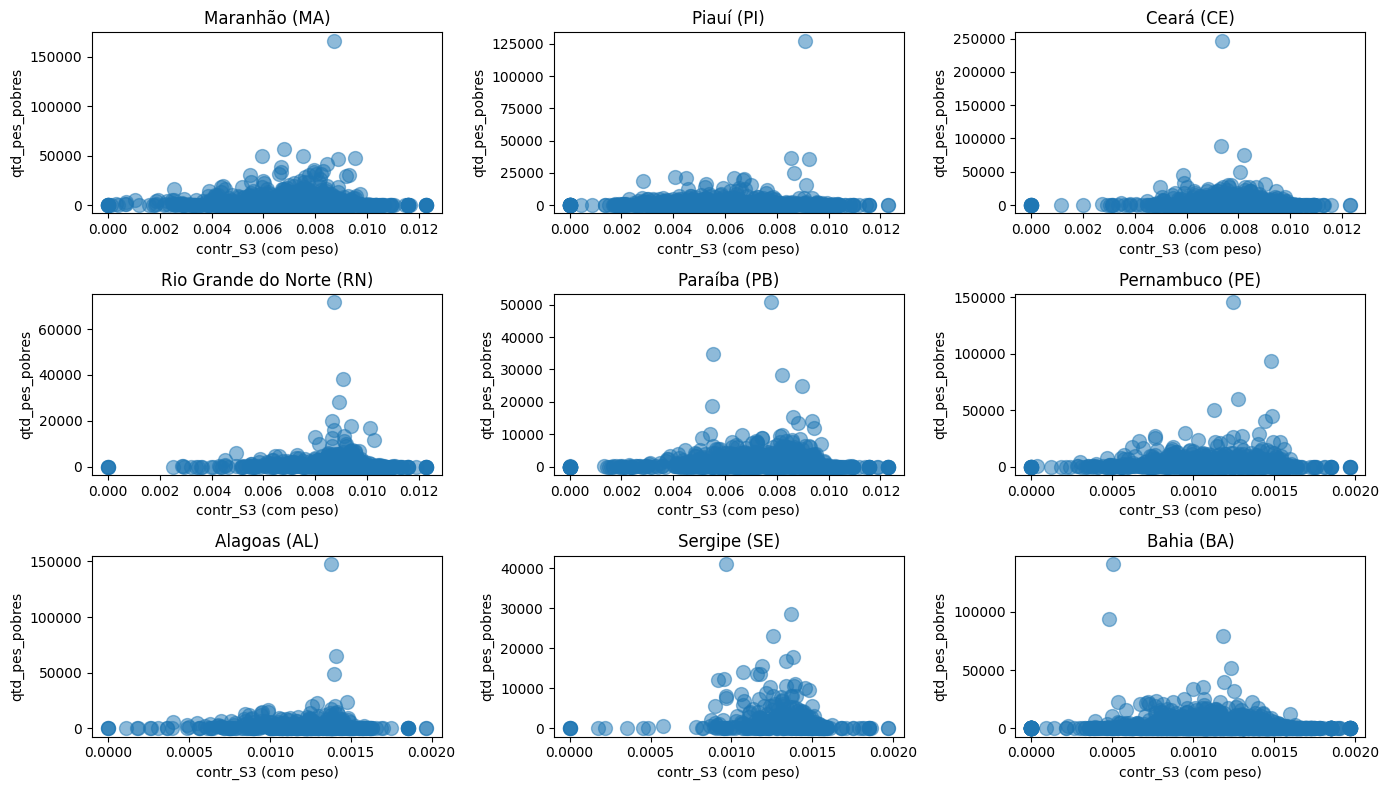

In [147]:
import matplotlib.pyplot as plt

regioes = {
    "Nordeste": regiao_nordeste,
}

estados = ["Maranhão (MA)", "Piauí (PI)", "Ceará (CE)", "Rio Grande do Norte (RN)", "Paraíba (PB)", "Pernambuco (PE)", "Alagoas (AL)", "Sergipe (SE)", "Bahia (BA)"]

# Criar o gráfico de dispersão para cada estado na Região Nordeste
plt.figure(figsize=(14, 8))
for i, estado in enumerate(estados, start=1):
    dados_estado = regioes["Nordeste"][estado]

    # Aplicar o peso 6,25 a 'contr_S3' dividindo por 6,25
    dados_estado['contr_S3'] = pd.to_numeric(dados_estado['contr_S3'], errors='coerce') / 6.25

    # Remover as linhas com valores problemáticos (vazios ou caracteres não numéricos)
    dados_estado = dados_estado[pd.to_numeric(dados_estado['contr_S3'], errors='coerce').notnull()]
    dados_estado = dados_estado[pd.to_numeric(dados_estado['qtd_pes_pobres'], errors='coerce').notnull()]

    # Criar o gráfico de dispersão
    plt.subplot(3, 3, i)
    plt.scatter(dados_estado['contr_S3'], dados_estado['qtd_pes_pobres'], s=100, alpha=0.5)
    plt.xlabel('contr_S3 (com peso)')
    plt.ylabel('qtd_pes_pobres')
    plt.title(estado)

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


Em comparação com os gráficos da região Sudeste do Brasil, as conclusões são as seguintes:

- A relação entre a quantidade de pessoas pobres e a proporção de domicílios sem saneamento básico é mais forte na região Nordeste.

- A falta de saneamento básico é um fator mais importante de pobreza na região Nordeste.

- Medidas para melhorar o saneamento básico na região Nordeste podem contribuir de forma mais significativa para a redução da pobreza.


A região Nordeste apresenta uma taxa de pobreza mais alta do que a região Sudeste. Além disso, a região Nordeste apresenta uma maior desigualdade social. Esses fatores contribuem para que a relação entre a quantidade de pessoas pobres e a proporção de domicílios sem saneamento básico seja mais forte na região Nordeste.


Os gráficos da região Nordeste mostram que, em todos os estados, a proporção de domicílios sem saneamento básico é maior nos municípios com maior número de pessoas pobres. Essa relação é mais forte nos estados do Maranhão, Piauí e Ceará, que apresentam as maiores taxas de pobreza da região.

Em conclusão, a falta de saneamento básico é um importante fator de pobreza na região Nordeste do Brasil. Medidas para melhorar o saneamento básico na região podem contribuir de forma mais significativa para a redução da pobreza.

Aqui estão algumas recomendações para melhorar o saneamento básico na região Nordeste:

- Investir na construção de redes de esgoto e tratamento de água.

- Fornecer incentivos financeiros para a construção de banheiros adequados.

- Promover campanhas de conscientização sobre a importância do saneamento básico.
Além dessas medidas, é importante também investir em educação e saúde para melhorar a qualidade de vida das pessoas na região Nordeste.

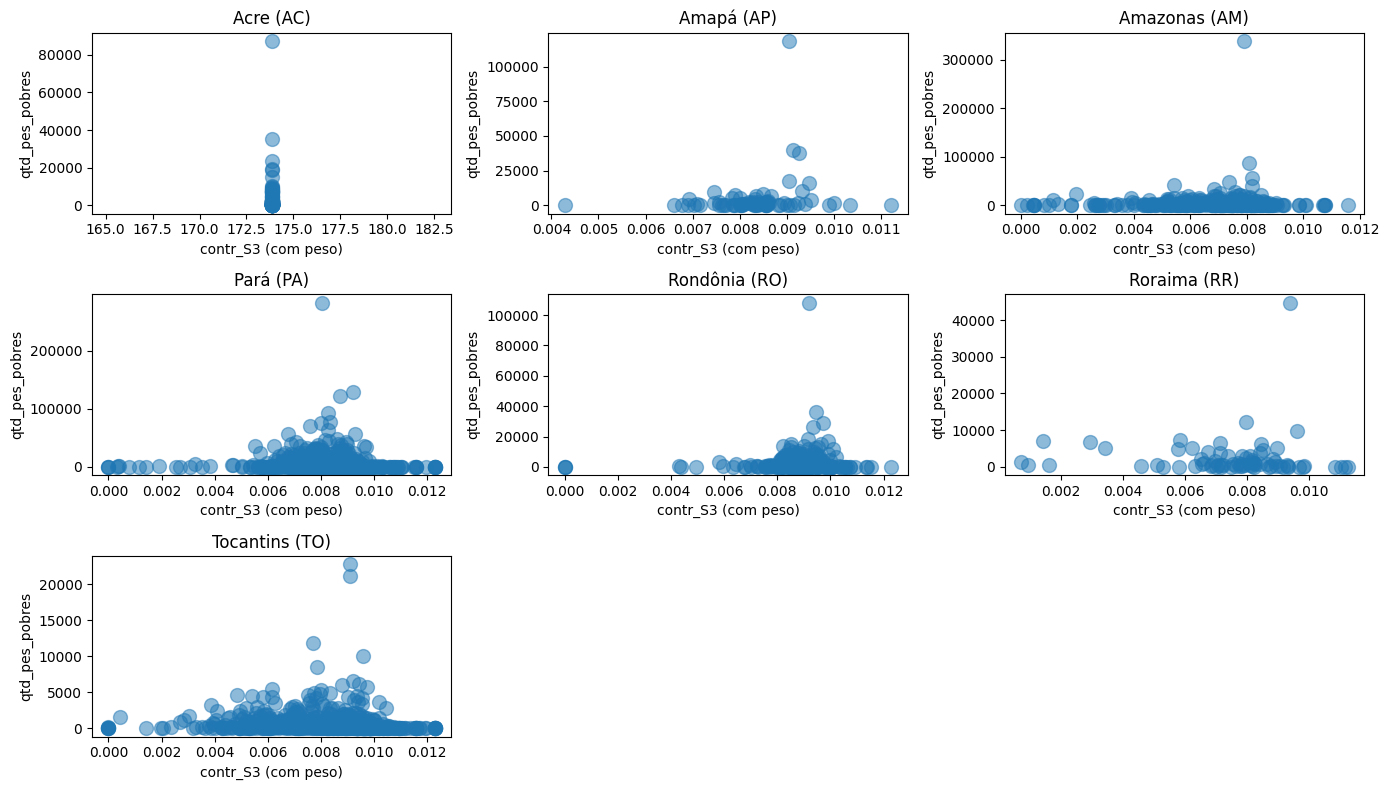

In [153]:
# Suponha que 'regiao_norte' seja o DataFrame da Região Norte
dados_ac = regiao_norte['Acre (AC)']
dados_ap = regiao_norte['Amapá (AP)']
dados_am = regiao_norte['Amazonas (AM)']
dados_pa = regiao_norte['Pará (PA)']
dados_ro = regiao_norte['Rondônia (RO)']
dados_rr = regiao_norte['Roraima (RR)']
dados_to = regiao_norte['Tocantins (TO)']

# Aplicar o peso 6,25 a 'contr_S3' dividindo por 6,25
dados_ac['contr_S3'] = pd.to_numeric(dados_ac['contr_S3'], errors='coerce')
dados_ap['contr_S3'] = pd.to_numeric(dados_ap['contr_S3'], errors='coerce')
dados_am['contr_S3'] = pd.to_numeric(dados_am['contr_S3'], errors='coerce')
dados_pa['contr_S3'] = pd.to_numeric(dados_pa['contr_S3'], errors='coerce')
dados_ro['contr_S3'] = pd.to_numeric(dados_ro['contr_S3'], errors='coerce')
dados_rr['contr_S3'] = pd.to_numeric(dados_rr['contr_S3'], errors='coerce')
dados_to['contr_S3'] = pd.to_numeric(dados_to['contr_S3'], errors='coerce')

# Remova as linhas com valores problemáticos (vazios ou caracteres não numéricos)
dados_ac = dados_ac[pd.to_numeric(dados_ac['contr_S3'], errors='coerce').notnull()]
dados_ac = dados_ac[pd.to_numeric(dados_ac['qtd_pes_pobres'], errors='coerce').notnull()]

dados_ap = dados_ap[pd.to_numeric(dados_ap['contr_S3'], errors='coerce').notnull()]
dados_ap = dados_ap[pd.to_numeric(dados_ap['qtd_pes_pobres'], errors='coerce').notnull()]

dados_am = dados_am[pd.to_numeric(dados_am['contr_S3'], errors='coerce').notnull()]
dados_am = dados_am[pd.to_numeric(dados_am['qtd_pes_pobres'], errors='coerce').notnull()]

dados_pa = dados_pa[pd.to_numeric(dados_pa['contr_S3'], errors='coerce').notnull()]
dados_pa = dados_pa[pd.to_numeric(dados_pa['qtd_pes_pobres'], errors='coerce').notnull()]

dados_ro = dados_ro[pd.to_numeric(dados_ro['contr_S3'], errors='coerce').notnull()]
dados_ro = dados_ro[pd.to_numeric(dados_ro['qtd_pes_pobres'], errors='coerce').notnull()]

dados_rr = dados_rr[pd.to_numeric(dados_rr['contr_S3'], errors='coerce').notnull()]
dados_rr = dados_rr[pd.to_numeric(dados_rr['qtd_pes_pobres'], errors='coerce').notnull()]

dados_to = dados_to[pd.to_numeric(dados_to['contr_S3'], errors='coerce').notnull()]
dados_to = dados_to[pd.to_numeric(dados_to['qtd_pes_pobres'], errors='coerce').notnull()]

# Criar o gráfico de dispersão
plt.figure(figsize=(14, 8))

# Estado: Acre
plt.subplot(331)
plt.scatter(dados_ac['contr_S3'], dados_ac['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Acre (AC)')

# Estado: Amapá
plt.subplot(332)
plt.scatter(dados_ap['contr_S3'], dados_ap['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Amapá (AP)')

# Estado: Amazonas
plt.subplot(333)
plt.scatter(dados_am['contr_S3'], dados_am['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Amazonas (AM)')

# Estado: Pará
plt.subplot(334)
plt.scatter(dados_pa['contr_S3'], dados_pa['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Pará (PA)')

# Estado: Rondônia
plt.subplot(335)
plt.scatter(dados_ro['contr_S3'], dados_ro['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Rondônia (RO)')

# Estado: Roraima
plt.subplot(336)
plt.scatter(dados_rr['contr_S3'], dados_rr['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Roraima (RR)')

# Estado: Tocantins
plt.subplot(337)
plt.scatter(dados_to['contr_S3'], dados_to['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Tocantins (TO)')

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


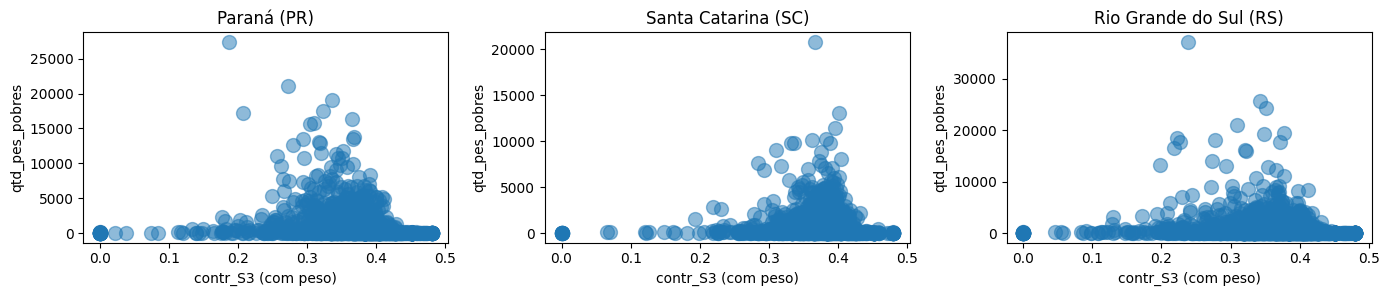

In [152]:
import matplotlib.pyplot as plt

regioes = {
    "Sul": regiao_sul,
}

# Acesse os DataFrames de cada estado na Região Sul
dados_pr = regioes["Sul"]["Paraná (PR)"]
dados_sc = regioes["Sul"]["Santa Catarina (SC)"]
dados_rs = regioes["Sul"]["Rio Grande do Sul (RS)"]

# Aplicar o peso 6,25 a 'contr_S3' dividindo por 6,25
dados_pr['contr_S3'] = pd.to_numeric(dados_pr['contr_S3'], errors='coerce') / 6.25
dados_sc['contr_S3'] = pd.to_numeric(dados_sc['contr_S3'], errors='coerce') / 6.25
dados_rs['contr_S3'] = pd.to_numeric(dados_rs['contr_S3'], errors='coerce') / 6.25

# Remova as linhas com valores problemáticos (vazios ou caracteres não numéricos)
dados_pr = dados_pr[pd.to_numeric(dados_pr['contr_S3'], errors='coerce').notnull()]
dados_pr = dados_pr[pd.to_numeric(dados_pr['qtd_pes_pobres'], errors='coerce').notnull()]

dados_sc = dados_sc[pd.to_numeric(dados_sc['contr_S3'], errors='coerce').notnull()]
dados_sc = dados_sc[pd.to_numeric(dados_sc['qtd_pes_pobres'], errors='coerce').notnull()]

dados_rs = dados_rs[pd.to_numeric(dados_rs['contr_S3'], errors='coerce').notnull()]
dados_rs = dados_rs[pd.to_numeric(dados_rs['qtd_pes_pobres'], errors='coerce').notnull()]

# Criar o gráfico de dispersão
plt.figure(figsize=(14, 8))

# Estado: Paraná
plt.subplot(331)
plt.scatter(dados_pr['contr_S3'], dados_pr['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Paraná (PR)')

# Estado: Santa Catarina
plt.subplot(332)
plt.scatter(dados_sc['contr_S3'], dados_sc['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Santa Catarina (SC)')

# Estado: Rio Grande do Sul
plt.subplot(333)
plt.scatter(dados_rs['contr_S3'], dados_rs['qtd_pes_pobres'], s=100, alpha=0.5)
plt.xlabel('contr_S3 (com peso)')
plt.ylabel('qtd_pes_pobres')
plt.title('Rio Grande do Sul (RS)')

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


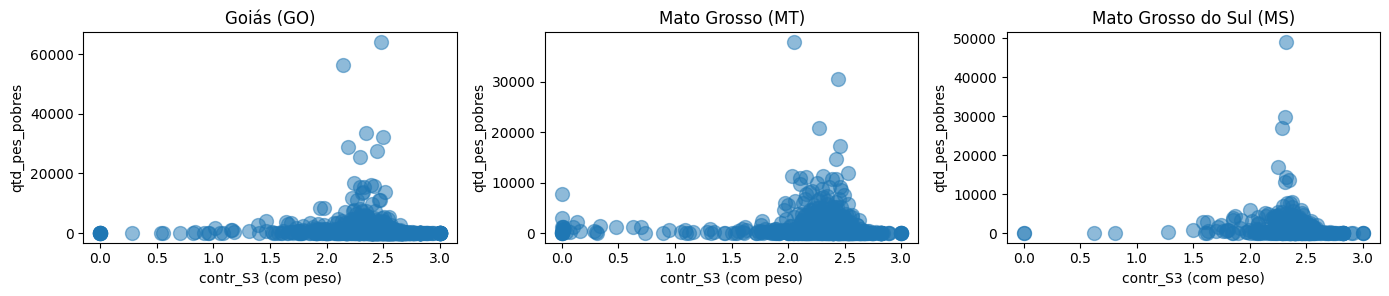

In [144]:
import matplotlib.pyplot as plt

regioes = {
    "Centro-Oeste": regiao_centro_oeste,
}

estados = ["Goiás (GO)", "Mato Grosso (MT)", "Mato Grosso do Sul (MS)"]

# Criar o gráfico de dispersão para cada estado na Região Centro-Oeste
plt.figure(figsize=(14, 8))
for i, estado in enumerate(estados, start=1):
    dados_estado = regioes["Centro-Oeste"][estado]

    # Aplicar o peso 6,25 a 'contr_S3' dividindo por 6,25
    dados_estado['contr_S3'] = pd.to_numeric(dados_estado['contr_S3'], errors='coerce') / 6.25

    # Remover as linhas com valores problemáticos (vazios ou caracteres não numéricos)
    dados_estado = dados_estado[pd.to_numeric(dados_estado['contr_S3'], errors='coerce').notnull()]
    dados_estado = dados_estado[pd.to_numeric(dados_estado['qtd_pes_pobres'], errors='coerce').notnull()]

    # Criar o gráfico de dispersão
    plt.subplot(3, 3, i)
    plt.scatter(dados_estado['contr_S3'], dados_estado['qtd_pes_pobres'], s=100, alpha=0.5)
    plt.xlabel('contr_S3 (com peso)')
    plt.ylabel('qtd_pes_pobres')
    plt.title(estado)

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [75]:


# Acesse os DataFrames da Região Nordeste usando a chave "Nordeste"
regiao_nordeste = regioes["Nordeste"]

# Acesse os DataFrames dos estados na Região Nordeste
dados_ma = regiao_nordeste["Maranhão (MA)"]
dados_pi = regiao_nordeste["Piauí (PI)"]
dados_ce = regiao_nordeste["Ceará (CE)"]
dados_rn = regiao_nordeste["Rio Grande do Norte (RN)"]
dados_pb = regiao_nordeste["Paraíba (PB)"]
dados_pe = regiao_nordeste["Pernambuco (PE)"]
dados_al = regiao_nordeste["Alagoas (AL)"]
dados_se = regiao_nordeste["Sergipe (SE)"]
dados_ba = regiao_nordeste["Bahia (BA)"]

# Crie um DataFrame 'dados_nordeste' com os dados dos estados do Nordeste
dados_nordeste = pd.concat([dados_ma, dados_pi, dados_ce, dados_rn, dados_pb, dados_pe, dados_al, dados_se, dados_ba], axis=0)

# Remova as linhas com valores problemáticos (vazios ou caracteres não numéricos)
dados_nordeste['contr_T1'] = pd.to_numeric(dados_nordeste['contr_T1'], errors='coerce')
dados_nordeste['contr_E1'] = pd.to_numeric(dados_nordeste['contr_E1'], errors='coerce')

# Substitua os valores vazios (NaN) por um valor padrão, como 0
dados_nordeste['contr_T1'].fillna(0, inplace=True)
dados_nordeste['contr_E1'].fillna(0, inplace=True)

# Calcule o coeficiente de correlação ponderado entre 'contr_T1' e 'contr_E1' com os pesos atribuídos
peso_contr_T1 = 8.33
peso_contr_E1 = 8.33

# Aplicar as ponderações
dados_nordeste['contr_T1'] = dados_nordeste['contr_T1'] / peso_contr_T1
dados_nordeste['contr_E1'] = dados_nordeste['contr_E1'] / peso_contr_E1

# Calcule o coeficiente de correlação
coef_correlacao = dados_nordeste['contr_T1'].corr(dados_nordeste['contr_E1'])

print(f'Coeficiente de Correlação entre contr_T1 e contr_E1 na Região Nordeste: {coef_correlacao}')


Coeficiente de Correlação entre contr_T1 e contr_E1 na Região Nordeste: 0.046479778849050364


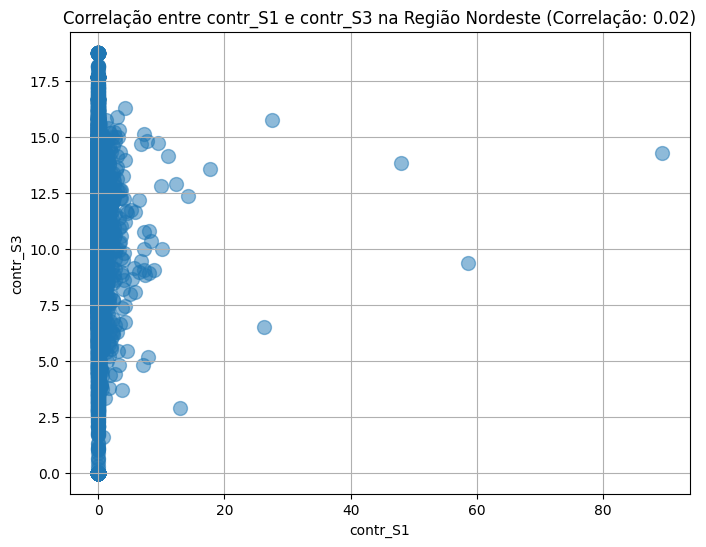

Correlação entre contr_S1 e contr_S3 na Região Nordeste: 0.02


In [76]:

from scipy.stats import pearsonr

# Acesse os DataFrames da região Nordeste usando a chave "Nordeste"
regiao_nordeste = regioes["Nordeste"]

# Acesse os DataFrames de cada estado na Região Nordeste
dados_ma = regiao_nordeste["Maranhão (MA)"]
dados_pi = regiao_nordeste["Piauí (PI)"]
dados_ce = regiao_nordeste["Ceará (CE)"]
dados_rn = regiao_nordeste["Rio Grande do Norte (RN)"]
dados_pb = regiao_nordeste["Paraíba (PB)"]
dados_pe = regiao_nordeste["Pernambuco (PE)"]
dados_al = regiao_nordeste["Alagoas (AL)"]
dados_se = regiao_nordeste["Sergipe (SE)"]
dados_ba = regiao_nordeste["Bahia (BA)"]

# Combine todos os DataFrames dos estados da Região Nordeste em um único DataFrame
dados_nordeste = pd.concat([dados_ma, dados_pi, dados_ce, dados_rn, dados_pb, dados_pe, dados_al, dados_se, dados_ba], axis=0)

# Certifique-se de que as colunas 'contr_s1' e 'contr_s3' estejam no formato numérico
dados_nordeste['contr_S1'] = pd.to_numeric(dados_nordeste['contr_S1'], errors='coerce')
dados_nordeste['contr_S3'] = pd.to_numeric(dados_nordeste['contr_S3'], errors='coerce')

# Substitua os valores vazios (NaN) por um valor padrão, considerando o peso 6,25
dados_nordeste['contr_S1'].fillna(0, inplace=True)
dados_nordeste['contr_S3'].fillna(0, inplace=True)

# Aplique o peso 6,25
dados_nordeste['contr_S1'] = dados_nordeste['contr_S1'] * 6.25
dados_nordeste['contr_S3'] = dados_nordeste['contr_S3'] * 6.25

# Calcule a correlação entre as variáveis 'contr_s1' e 'contr_s3'
correlation, _ = pearsonr(dados_nordeste['contr_S1'], dados_nordeste['contr_S3'])

# Crie um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(8, 6))
plt.scatter(dados_nordeste['contr_S1'], dados_nordeste['contr_S3'], s=100, alpha=0.5)

# Configurações do gráfico
plt.xlabel('contr_S1')
plt.ylabel('contr_S3')
plt.title(f'Correlação entre contr_S1 e contr_S3 na Região Nordeste (Correlação: {correlation:.2f})')
plt.grid(True)

# Exiba o gráfico
plt.show()

# Imprima o valor da correlação
print(f'Correlação entre contr_S1 e contr_S3 na Região Nordeste: {correlation:.2f}')


Correlação entre 'contr_E3' e 'qtd_pes_pobres' na Região Nordeste: -0.03764632322168658
Correlação entre "qtd_pes_pob_vul" e "qtd_pes_T2" na Região Nordeste: 0.9579030696776979


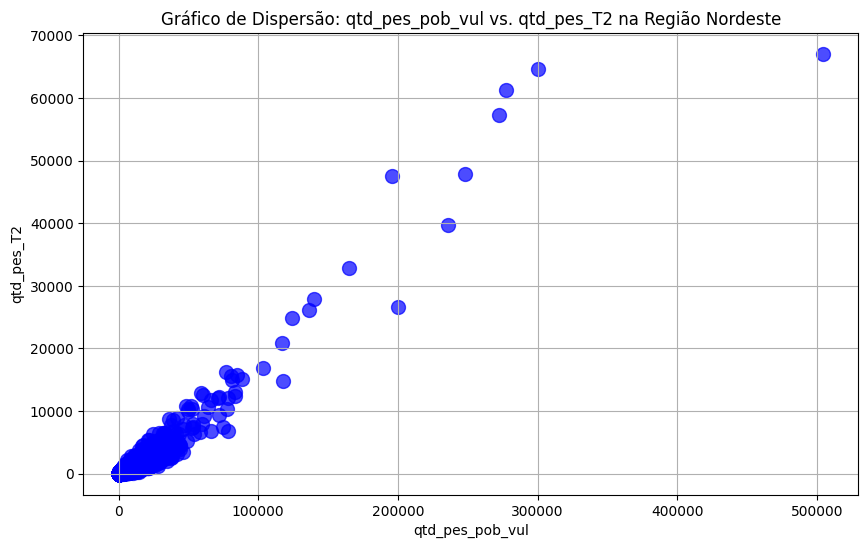

ValueError: ignored

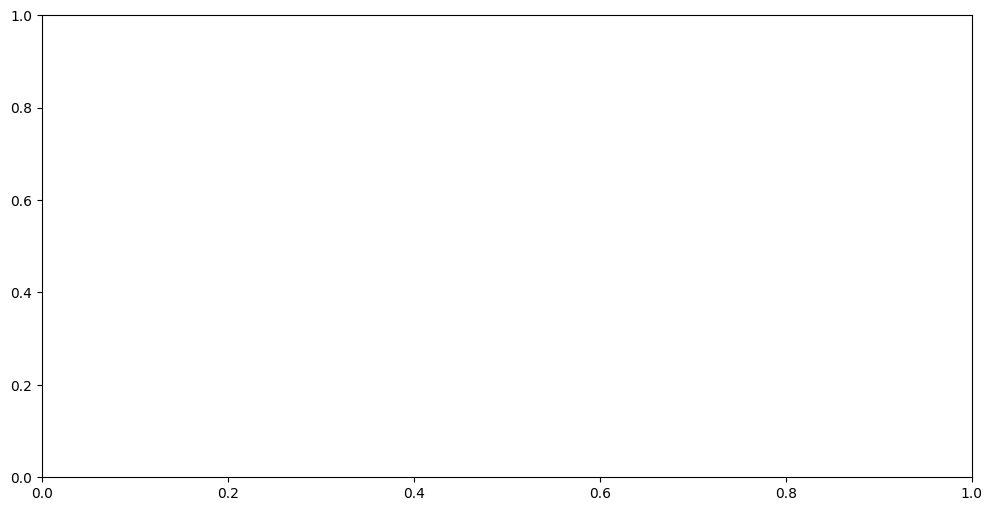

In [77]:


# Combine os DataFrames dos estados da região Nordeste em um único DataFrame
seu_dataframe_nordeste = pd.concat(regiao_nordeste)

# Converter a coluna 'contr_E3' para tipo numérico, tratando valores não numéricos como NaN
seu_dataframe_nordeste['contr_E3'] = pd.to_numeric(seu_dataframe_nordeste['contr_E3'], errors='coerce')

# Remover linhas com NaN na coluna 'contr_E3'
seu_dataframe_nordeste.dropna(subset=['contr_E3'], inplace=True)

# Calcular a correlação entre 'contr_E3' e 'qtd_pes_pobres'
correlacao = seu_dataframe_nordeste['contr_E3'].corr(seu_dataframe_nordeste['qtd_pes_pobres'])

# Exibir o valor da correlação
print(f"Correlação entre 'contr_E3' e 'qtd_pes_pobres' na Região Nordeste: {correlacao}")

seu_dataframe_nordeste['qtd_pes_pob_vul'] = pd.to_numeric(seu_dataframe_nordeste['qtd_pes_pob_vul'], errors='coerce')
seu_dataframe_nordeste['qtd_pes_T2'] = pd.to_numeric(seu_dataframe_nordeste['qtd_pes_T2'], errors='coerce')
correlacao = seu_dataframe_nordeste['qtd_pes_pob_vul'].corr(seu_dataframe_nordeste['qtd_pes_T2'])

print(f'Correlação entre "qtd_pes_pob_vul" e "qtd_pes_T2" na Região Nordeste: {correlacao}')


# Dados para o gráfico
x = seu_dataframe_nordeste['qtd_pes_pob_vul']
y = seu_dataframe_nordeste['qtd_pes_T2']

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=100, alpha=0.7, color='blue')

# Adicionar rótulos aos pontos de dados
plt.xlabel('qtd_pes_pob_vul')
plt.ylabel('qtd_pes_T2')
plt.title('Gráfico de Dispersão: qtd_pes_pob_vul vs. qtd_pes_T2 na Região Nordeste')
plt.grid(True)

# Exibir o gráfico
plt.show()


import numpy as np

# Dados para o gráfico

qtd_pes_pob_vul = seu_dataframe_nordeste['qtd_pes_pob_vul']
qtd_pes_T2 = seu_dataframe_nordeste['qtd_pes_T2']

# Defina a largura da barra
largura_barra = 0.35

# Índices para os municípios
indices = np.arange(len(municipios))

# Crie os gráficos de barras
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(indices, qtd_pes_pob_vul, largura_barra, label='qtd_pes_pob_vul')
bar2 = ax.bar(indices + largura_barra, qtd_pes_T2, largura_barra, label='qtd_pes_T2')

# Configure rótulos e título
ax.set_xlabel('Municípios')
ax.set_ylabel('Valores')
ax.set_title('Comparação de qtd_pes_pob_vul e qtd_pes_T2 na Região Nordeste')
ax.set_xticks(indices + largura_barra / 2)
ax.set_xticklabels(municipios, rotation=90)
ax.legend()

# Exiba o gráfico
plt.tight_layout()
plt.show()





Média: contr_P4    0.577488
dtype: float64
Mediana: contr_P4    0.543978
dtype: float64
Quartis:
          contr_P4
count  2077.000000
mean      0.577488
std       0.346981
min       0.000000
25%       0.349008
50%       0.543978
75%       0.756537
max       2.251125


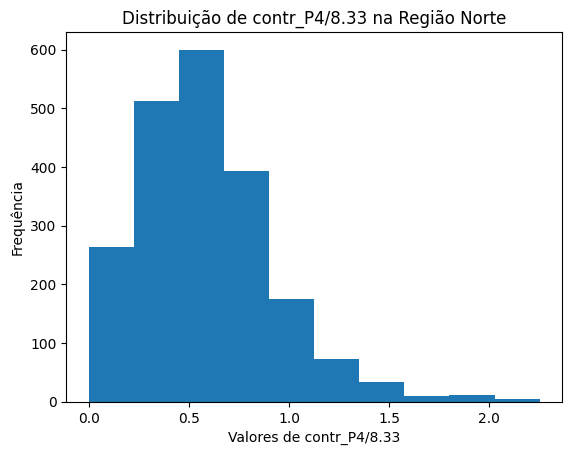

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha carregado seus dados e tenha DataFrames individuais para cada estado na região Norte.

# Vamos criar um DataFrame 'dados_norte' unindo os DataFrames dos estados da região Norte.
dados_norte = pd.concat([dados_ac, dados_am, dados_ro, dados_rr, dados_ap, dados_pa, dados_to], axis=0)

# Limpe os valores não numéricos na coluna 'contr_P4'
dados_norte['contr_P4'] = pd.to_numeric(dados_norte['contr_P4'], errors='coerce')

# Remova as linhas com valores nulos
dados_norte.dropna(subset=['contr_P4'], inplace=True)

# Agora você tem uma coluna 'contr_P4' limpa no DataFrame 'dados_norte'.

# Crie um novo DataFrame com a coluna 'contr_P4' dividida por 8,33
novo_dataframe = dados_norte[['contr_P4']].div(8.33)

# Calcule as estatísticas resumidas
media = novo_dataframe.mean()
mediana = novo_dataframe.median()
quartis = novo_dataframe.describe()

# Exiba as estatísticas
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print('Quartis:')
print(quartis)

# Crie um gráfico de barras para visualizar os dados
novo_dataframe.plot(kind='hist', legend=False)
plt.title('Distribuição de contr_P4/8.33 na Região Norte')
plt.xlabel('Valores de contr_P4/8.33')
plt.ylabel('Frequência')
plt.show()


Média: contr_P4    0.248507
dtype: float64
Mediana: contr_P4    0.156474
dtype: float64
Quartis:
          contr_P4
count  4731.000000
mean      0.248507
std       0.335082
min       0.000000
25%       0.000000
50%       0.156474
75%       0.343763
max       2.251125


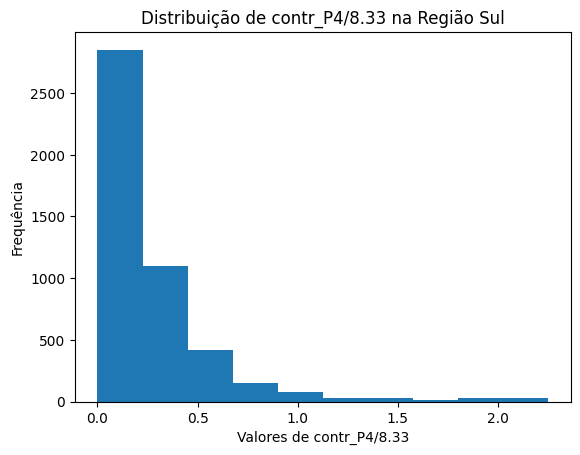

In [79]:


# Suponha que você já tenha carregado seus dados e tenha DataFrames individuais para cada estado na região Sul.

# Vamos criar um DataFrame 'dados_sul' unindo os DataFrames dos estados da região Sul.
dados_sul = pd.concat([dados_pr, dados_sc, dados_rs], axis=0)

# Limpe os valores não numéricos na coluna 'contr_P4'
dados_sul['contr_P4'] = pd.to_numeric(dados_sul['contr_P4'], errors='coerce')

# Remova as linhas com valores nulos
dados_sul.dropna(subset=['contr_P4'], inplace=True)

# Agora você tem uma coluna 'contr_P4' limpa no DataFrame 'dados_sul'.

# Crie um novo DataFrame com a coluna 'contr_P4' dividida por 8,33
novo_dataframe = dados_sul[['contr_P4']].div(8.33)

# Calcule as estatísticas resumidas
media = novo_dataframe.mean()
mediana = novo_dataframe.median()
quartis = novo_dataframe.describe()

# Exiba as estatísticas
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print('Quartis:')
print(quartis)

# Crie um gráfico de barras para visualizar os dados
novo_dataframe.plot(kind='hist', legend=False)
plt.title('Distribuição de contr_P4/8.33 na Região Sul')
plt.xlabel('Valores de contr_P4/8.33')
plt.ylabel('Frequência')
plt.show()


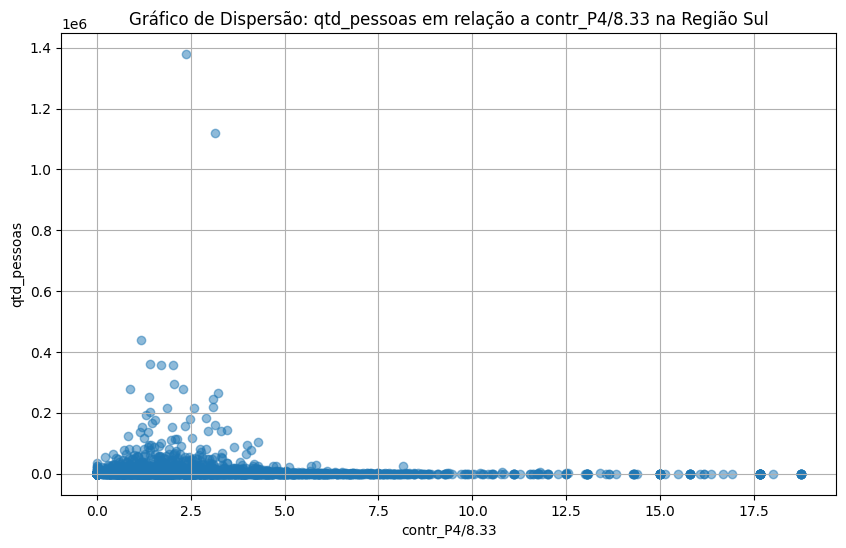

In [80]:


# Certifique-se de que 'qtd_pessoas' e 'contr_P4' sejam do tipo numérico
dados_sul['qtd_pessoas'] = pd.to_numeric(dados_sul['qtd_pessoas'], errors='coerce')
dados_sul['contr_P4'] = pd.to_numeric(dados_sul['contr_P4'], errors='coerce')

# Crie o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_sul['contr_P4'], dados_sul['qtd_pessoas'], alpha=0.5)
plt.xlabel('contr_P4/8.33')
plt.ylabel('qtd_pessoas')
plt.title('Gráfico de Dispersão: qtd_pessoas em relação a contr_P4/8.33 na Região Sul')
plt.grid(True)

# Exibir o gráfico
plt.show()


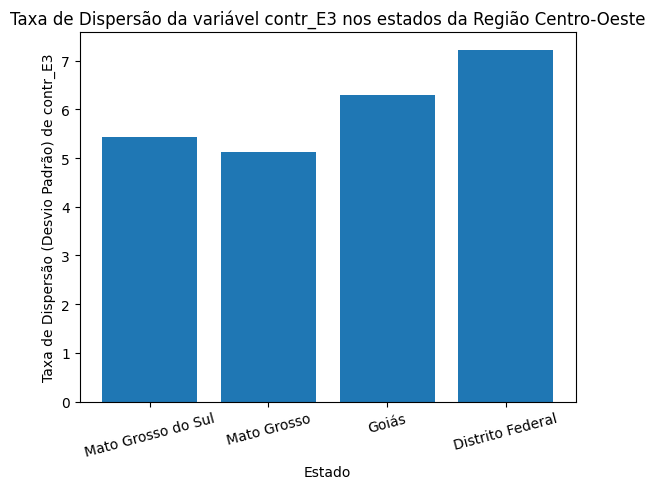

In [81]:


# Acesse os DataFrames de cada estado na Região Centro-Oeste
dados_ms = regiao_centro_oeste["Mato Grosso do Sul (MS)"]
dados_mt = regiao_centro_oeste["Mato Grosso (MT)"]
dados_go = regiao_centro_oeste["Goiás (GO)"]
dados_df = regiao_centro_oeste["Distrito Federal (DF)"]

# Função para converter valores em float e lidar com não numéricos
def converter_para_float(valor):
    try:
        return float(valor)
    except (ValueError, TypeError):
        return 0.0  # Trate os valores não numéricos como zero

# Limpe e converta os dados para float
dados_estados = [
    [converter_para_float(valor) for valor in dados_ms['contr_E3']],
    [converter_para_float(valor) for valor in dados_mt['contr_E3']],
    [converter_para_float(valor) for valor in dados_go['contr_E3']],
    [converter_para_float(valor) for valor in dados_df['contr_E3']]
]

# Calcule a taxa de dispersão (desvio padrão) em vez da média
taxa_dispersao_contr_E3 = [round(statistics.stdev(dados), 2) for dados in dados_estados]

# Crie o gráfico de barras
estados = ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']

plt.bar(estados, taxa_dispersao_contr_E3)
plt.xlabel('Estado')
plt.ylabel('Taxa de Dispersão (Desvio Padrão) de contr_E3')
plt.title('Taxa de Dispersão da variável contr_E3 nos estados da Região Centro-Oeste')

# Exiba o gráfico
plt.xticks(rotation=15)
plt.show()


https://we.tl/t-erV07qh8YU

In [82]:
# Filtrar o DataFrame para incluir apenas raças brancas (raça 1) e pardas (raça 4)
dados_branco_pardo = df[(df['raca'] == 1) | (df['raca'] == 4)]

# Exibir os dados
print(dados_branco_pardo)


       cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
0      1100015     1  1.058332e+04     7179.226549          1992.031046   
3      1100015     4  1.212225e+04     8958.390641          1716.999407   
5      1100023     1  3.202519e+04    12764.498897          6823.654233   
8      1100023     4  4.850537e+04    26059.381560         10559.963483   
10     1100031     1  2.917935e+03     1854.660088           643.368206   
...        ...   ...           ...             ...                  ...   
25434  5222203     4  3.401256e+03     1400.562680           672.016759   
25435  5222302     1  1.381155e+03      700.431428           247.532623   
25438  5222302     4  3.314944e+03     1665.477489           687.939017   
25440  5300108     1  1.075079e+06    45425.699052         59933.909618   
25443  5300108     4  1.250315e+06   114139.044161        120619.822639   

       qtd_pes_pob_vul       qtd_0a11  qtd_0a11_pobres  qtd_0a11_vulneraveis  \
0          9171.257

In [86]:
import pandas as pd

# Converter a coluna 'intensidade' para tipo numérico
dados_branco['intensidade'] = pd.to_numeric(dados_branco['intensidade'], errors='coerce')
dados_pardo['intensidade'] = pd.to_numeric(dados_pardo['intensidade'], errors='coerce')

# Calcular a média de intensidade para cada grupo
media_intensidade_branco = dados_branco['intensidade'].mean()
media_intensidade_pardo = dados_pardo['intensidade'].mean()

print("Média de Intensidade de Pobreza para o Grupo Branco:", media_intensidade_branco)
print("Média de Intensidade de Pobreza para o Grupo Pardo:", media_intensidade_pardo)


Média de Intensidade de Pobreza para o Grupo Branco: 41.38710798168035
Média de Intensidade de Pobreza para o Grupo Pardo: 42.3711038587893


In [87]:
import pandas as pd

# Converter a coluna 'incidencia' para tipo numérico
dados_branco['incidencia'] = pd.to_numeric(dados_branco['incidencia'], errors='coerce')
dados_pardo['incidencia'] = pd.to_numeric(dados_pardo['incidencia'], errors='coerce')

# Calcular a média de incidência para cada grupo
media_incidencia_branco = dados_branco['incidencia'].mean()
media_incidencia_pardo = dados_pardo['incidencia'].mean()

print("Média de Incidência de Pobreza para o Grupo Branco:", media_incidencia_branco)
print("Média de Incidência de Pobreza para o Grupo Pardo:", media_incidencia_pardo)


Média de Incidência de Pobreza para o Grupo Branco: 35.16155505369646
Média de Incidência de Pobreza para o Grupo Pardo: 42.21583205563428


In [157]:
import pandas as pd

# Converter a coluna 'incidencia' para tipo numérico
dados_branco['incidencia'] = pd.to_numeric(dados_branco['incidencia'], errors='coerce')
dados_pardo['incidencia'] = pd.to_numeric(dados_pardo['incidencia'], errors='coerce')
dados_preto['incidencia'] = pd.to_numeric(dados_negro['incidencia'], errors='coerce')
dados_amarelo['incidencia'] = pd.to_numeric(dados_amarelo['incidencia'], errors='coerce')
dados_indigena['incidencia'] = pd.to_numeric(dados_indigena['incidencia'], errors='coerce')

# Calcular a média de incidência para cada grupo
media_incidencia_branco = dados_branco['incidencia'].mean()
media_incidencia_pardo = dados_pardo['incidencia'].mean()
media_incidencia_negro = dados_preto['incidencia'].mean()
media_incidencia_amarelo = dados_amarelo['incidencia'].mean()
media_incidencia_indigena = dados_indigena['incidencia'].mean()

print("Média de Incidência de Pobreza para o Grupo Branco:", media_incidencia_branco)
print("Média de Incidência de Pobreza para o Grupo Pardo:", media_incidencia_pardo)
print("Média de Incidência de Pobreza para o Grupo Negro:", media_incidencia_negro)
print("Média de Incidência de Pobreza para o Grupo Amarelo:", media_incidencia_amarelo)
print("Média de Incidência de Pobreza para o Grupo Indígena:", media_incidencia_indigena)


NameError: ignored

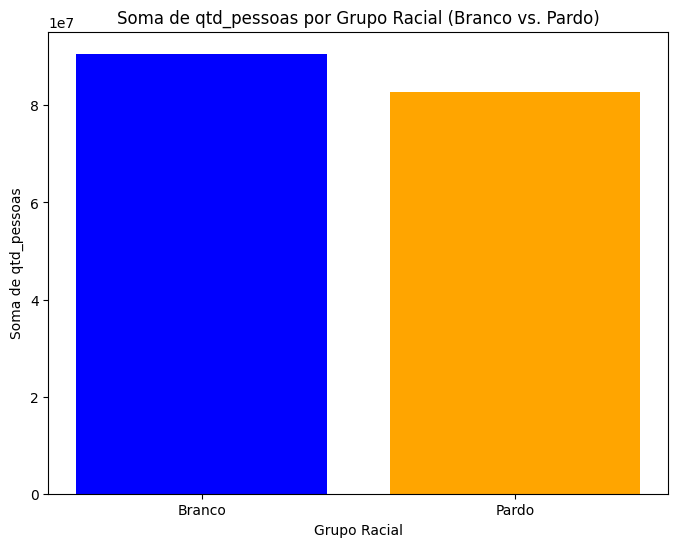

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados fictícios
data = {
    'Grupo': ['Branco', 'Pardo'],
    'Soma de qtd_pessoas': [
        dados_branco['qtd_pessoas'].sum(),
        dados_pardo['qtd_pessoas'].sum()
    ]
}

df = pd.DataFrame(data)

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df['Grupo'], df['Soma de qtd_pessoas'], color=['blue', 'orange'])
plt.xlabel('Grupo Racial')
plt.ylabel('Soma de qtd_pessoas')
plt.title('Soma de qtd_pessoas por Grupo Racial (Branco vs. Pardo)')
plt.show()


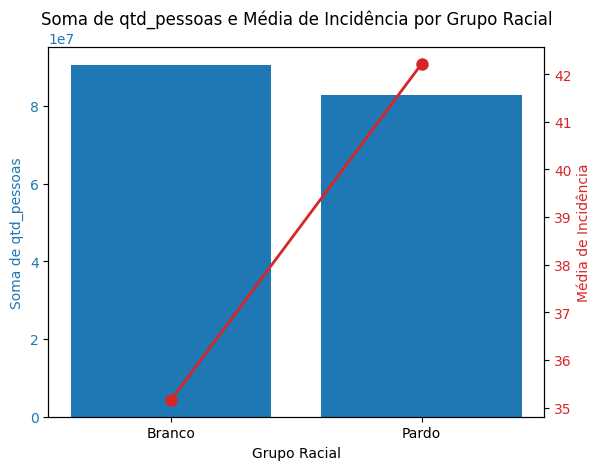

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados fictícios
data = {
    'Grupo': ['Branco', 'Pardo'],
    'Soma de qtd_pessoas': [dados_branco['qtd_pessoas'].sum(), dados_pardo['qtd_pessoas'].sum()],
    'Média de Incidência': [dados_branco['incidencia'].mean(), dados_pardo['incidencia'].mean()]
}

df = pd.DataFrame(data)

# Configurações do gráfico
fig, ax1 = plt.subplots()

# Barras para a Soma de qtd_pessoas
color = 'tab:blue'
ax1.set_xlabel('Grupo Racial')
ax1.set_ylabel('Soma de qtd_pessoas', color=color)
ax1.bar(df['Grupo'], df['Soma de qtd_pessoas'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Segundo eixo y para a Média de Incidência
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Média de Incidência', color=color)
ax2.plot(df['Grupo'], df['Média de Incidência'], marker='o', color=color, linestyle='-', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor=color)

# Título e rótulos dos eixos
plt.title('Soma de qtd_pessoas e Média de Incidência por Grupo Racial')
plt.show()


In [90]:
# Dicionário com os DataFrames de cada estado na Região Sudeste
regioes = {
    "São Paulo (SP)": dados_sp,
    "Rio de Janeiro (RJ)": dados_rj,
    "Minas Gerais (MG)": dados_mg,
    "Espírito Santo (ES)": dados_es,
}

# Variáveis que desejamos calcular a média
variaveis = ["qtd_pes_E1", "qtd_pes_E2", "qtd_pes_E3", "qtd_pes_S1", "qtd_pes_S2", "qtd_pes_S3",
             "qtd_pes_S4", "qtd_pes_T1", "qtd_pes_T2", "qtd_pes_T3", "qtd_pes_P1", "qtd_pes_P2",
             "qtd_pes_P3", "qtd_pes_P4"]
# Dicionário para armazenar as médias
medias_por_estado = {}

# Calcula a média para cada estado e variável
for estado, df_estado in regioes.items():
    medias_estado = {}
    for variavel in variaveis:
        valores = pd.to_numeric(df_estado.iloc[1:][variavel], errors='coerce')
        # Calcula a média dos valores numéricos
        media1 = valores.mean()
        medias_estado[variavel] = media1
    medias_por_estado[estado] = medias_estado

# Cria um DataFrame com as médias por estado
df_medias = pd.DataFrame(medias_por_estado)
df_medias1 = pd.DataFrame(medias_por_estado).sum();
# Transpõe o DataFrame para ter os estados como índice
df_medias = df_medias.T

# Exibe o DataFrame com as médias
print(df_medias)


                     qtd_pes_E1   qtd_pes_E2   qtd_pes_E3  qtd_pes_S1  \
São Paulo (SP)       265.010452   294.123109   954.664138    2.511157   
Rio de Janeiro (RJ)  785.155952  1941.590690  3754.331494   10.959570   
Minas Gerais (MG)    160.096399   264.546549   880.703147    1.664806   
Espírito Santo (ES)  320.106934   497.435444  1648.012197    3.304284   

                      qtd_pes_S2   qtd_pes_S3   qtd_pes_S4  qtd_pes_T1  \
São Paulo (SP)        434.502101   723.259467   221.459405  111.498416   
Rio de Janeiro (RJ)  2409.182986  3056.437222   892.787819  289.480279   
Minas Gerais (MG)     605.447079   744.979152   611.795505  105.045198   
Espírito Santo (ES)  1207.780065  1598.299719  1053.183382  211.367301   

                      qtd_pes_T2   qtd_pes_T3  qtd_pes_P1   qtd_pes_P2  \
São Paulo (SP)        326.768596   709.514573  133.198597   799.364102   
Rio de Janeiro (RJ)  1291.118853  2878.786657  123.184596  3297.135089   
Minas Gerais (MG)     155.510361   627.47

In [91]:
dados_rj.describe

<bound method NDFrame.describe of        cod_mun  raca    qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
14429  3300100     1   88454.404487     7256.340901          8666.687147   
14430  3300100     2   12273.308214     1875.382818          1398.955863   
14431  3300100     3    1714.847155      289.779098           194.352354   
14432  3300100     4   66365.519849     9557.847766          8449.465561   
14433  3300100     5     473.195911      312.369309             0.000000   
...        ...   ...            ...             ...                  ...   
14879  3306305     1  135307.805660     2077.299596          4511.557670   
14880  3306305     2   32832.111301     1822.899075          2916.344783   
14881  3306305     3    1896.939053      163.375656            56.733862   
14882  3306305     4   87549.477388     4176.281966          5935.426862   
14883  3306305     5     216.666598       34.850404            32.839913   

       qtd_pes_pob_vul      qtd_0a11  qtd_0a11_pobres

In [92]:
import pandas as pd

# Dicionário com os DataFrames de cada estado na Região Sudeste
regioes = {
    "São Paulo (SP)": dados_sp,
    "Rio de Janeiro (RJ)": dados_rj,
    "Minas Gerais (MG)": dados_mg,
    "Espírito Santo (ES)": dados_es,
}

# Variáveis que deseja calcular a média
variaveis = ["IPM"]

# Dicionário para armazenar as médias
medias_por_estado = {}

# Calcula a média para cada estado e variável
for estado, df_estado in regioes.items():
    medias_estado = {}
    for variavel in variaveis:
        valores = pd.to_numeric(df_estado[variavel], errors='coerce')
        # Calcula a média dos valores numéricos
        media = valores.mean()
        medias_estado[variavel] = media
    medias_por_estado[estado] = medias_estado

df_medias = pd.DataFrame(medias_por_estado)

# Calcula a média da região Sudeste para cada variável
medias_sudeste = {}
for variavel in variaveis:
    media_sudeste = df_medias[variavel].mean()
    medias_sudeste[variavel] = media_sudeste

# Adiciona as médias da região Sudeste ao DataFrame
df_medias_sudeste = pd.DataFrame(medias_sudeste, index=["Sudeste"])

# Transpõe o DataFrame para ter os estados como índice
df_medias_sudeste = df_medias_sudeste.T

# Exibe o DataFrame com as médias por estado
print(df_medias)
print("\nMédias da Região Sudeste:")
print(df_medias_sudeste)


KeyError: ignored

In [93]:
# Dicionário com os DataFrames de cada estado na Região Sudeste
regioes = {
    "São Paulo (SP)": dados_sp,
    "Rio de Janeiro (RJ)": dados_rj,
    "Minas Gerais (MG)": dados_mg,
    "Espírito Santo (ES)": dados_es,
}

# Itera sobre os DataFrames de cada estado
for estado, df_estado in regioes.items():
    coluna_ipm = df_estado["IPM"]
    print(f"Coluna IPM do estado {estado}:\n{coluna_ipm.mean()}\n")


Coluna IPM do estado São Paulo (SP):
6.138369090417308

Coluna IPM do estado Rio de Janeiro (RJ):
8.969058972624879

Coluna IPM do estado Minas Gerais (MG):
13.551141709672727

Coluna IPM do estado Espírito Santo (ES):
13.877411409333511



In [94]:
# Dicionário com os DataFrames de cada estado na Região Nordeste
regiao_nordeste = {
    "Maranhão (MA)": dados_ma,
    "Piauí (PI)": dados_pi,
    "Ceará (CE)": dados_ce,
    "Rio Grande do Norte (RN)": dados_rn,
    "Paraíba (PB)": dados_pb,
    "Pernambuco (PE)": dados_pe,
    "Alagoas (AL)": dados_al,
    "Sergipe (SE)": dados_se,
    "Bahia (BA)": dados_ba
}

# Itera sobre os DataFrames de cada estado na Região Nordeste
for estado, df_estado in regiao_nordeste.items():
    coluna_ipm = df_estado.iloc[1:]["IPM"]
    print(f"Coluna IPM do estado {estado} - Média: {coluna_ipm.mean()}\n")


Coluna IPM do estado Maranhão (MA) - Média: 30.190832833063013

Coluna IPM do estado Piauí (PI) - Média: 25.373988108478066

Coluna IPM do estado Ceará (CE) - Média: 21.74848797788945

Coluna IPM do estado Rio Grande do Norte (RN) - Média: 17.33049764693696

Coluna IPM do estado Paraíba (PB) - Média: 22.102481900989158

Coluna IPM do estado Pernambuco (PE) - Média: 19.386398923267077

Coluna IPM do estado Alagoas (AL) - Média: 24.04455907385108

Coluna IPM do estado Sergipe (SE) - Média: 18.870118662078788

Coluna IPM do estado Bahia (BA) - Média: 20.08694487521036



In [95]:
import pandas as pd

# Dicionário com os DataFrames de cada estado na Região Nordeste
regiao_nordeste = {
    "Maranhão (MA)": dados_ma,
    "Piauí (PI)": dados_pi,
    "Ceará (CE)": dados_ce,
    "Rio Grande do Norte (RN)": dados_rn,
    "Paraíba (PB)": dados_pb,
    "Pernambuco (PE)": dados_pe,
    "Alagoas (AL)": dados_al,
    "Sergipe (SE)": dados_se,
    "Bahia (BA)": dados_ba
}

# Inicializa uma variável para a soma do IPM para raça = 1
soma_ipm_raca_1 = 0

# Itera sobre os DataFrames de cada estado
for estado, df_estado in regiao_nordeste.items():
    # Filtra as linhas com 'raca' igual a 1
    df_raca_1 = df_estado[df_estado['raca'] == 1]

    # Calcula a soma do IPM para a raça = 1 no estado atual
    soma_ipm_estado = df_raca_1.iloc[1:]['IPM'].mean()

    # Adiciona a soma do estado à variável geral
    soma_ipm_raca_1 += soma_ipm_estado

    # Exibe a soma do IPM para a raça = 1 no estado atual
    print(f"Soma do IPM para raça = 1 em {estado}: {soma_ipm_estado}")

# Exibe a soma total do IPM para raça = 1 na região Nordeste
print(f"Soma total do IPM para raça = 1 na Região Nordeste: {soma_ipm_raca_1/9}")


Soma do IPM para raça = 1 em Maranhão (MA): 27.655967045587598
Soma do IPM para raça = 1 em Piauí (PI): 22.82649087486038
Soma do IPM para raça = 1 em Ceará (CE): 19.65274980064419
Soma do IPM para raça = 1 em Rio Grande do Norte (RN): 16.23396159233099
Soma do IPM para raça = 1 em Paraíba (PB): 20.553131444287597
Soma do IPM para raça = 1 em Pernambuco (PE): 17.90014713627565
Soma do IPM para raça = 1 em Alagoas (AL): 22.350310048429193
Soma do IPM para raça = 1 em Sergipe (SE): 18.16865603257879
Soma do IPM para raça = 1 em Bahia (BA): 18.497426442592133
Soma total do IPM para raça = 1 na Região Nordeste: 20.426537824176282


In [96]:
import pandas as pd

# Dicionário com os DataFrames de cada estado na Região Nordeste
regiao_nordeste = {
    "Maranhão (MA)": dados_ma,
    "Piauí (PI)": dados_pi,
    "Ceará (CE)": dados_ce,
    "Rio Grande do Norte (RN)": dados_rn,
    "Paraíba (PB)": dados_pb,
    "Pernambuco (PE)": dados_pe,
    "Alagoas (AL)": dados_al,
    "Sergipe (SE)": dados_se,
    "Bahia (BA)": dados_ba
}

# Inicializa uma variável para a soma do IPM para raça = 3
soma_ipm_raca_3 = 0

# Itera sobre os DataFrames de cada estado
for estado, df_estado in regiao_nordeste.items():
    # Filtra as linhas com 'raca' igual a 3
    df_raca_3 = df_estado[df_estado['raca'] == 3]

    # Calcula a soma do IPM para a raça = 3 no estado atual
    soma_ipm_estado = df_raca_3.iloc[1:]['IPM'].mean()

    # Adiciona a soma do estado à variável geral
    soma_ipm_raca_3 += soma_ipm_estado

    # Exibe a soma do IPM para a raça = 3 no estado atual
    print(f"Média do IPM para raça = 3 em {estado}: {soma_ipm_estado/100}")

# Exibe a soma total do IPM para raça = 3 na região Nordeste
print(f"Média do IPM para raça = 3 na Região Nordeste: {(soma_ipm_raca_3/9)/100}")


Média do IPM para raça = 3 em Maranhão (MA): 0.3024901289693615
Média do IPM para raça = 3 em Piauí (PI): 0.2594510322489038
Média do IPM para raça = 3 em Ceará (CE): 0.21890620148545245
Média do IPM para raça = 3 em Rio Grande do Norte (RN): 0.1638593848993708
Média do IPM para raça = 3 em Paraíba (PB): 0.22329344215690405
Média do IPM para raça = 3 em Pernambuco (PE): 0.20514375745326077
Média do IPM para raça = 3 em Alagoas (AL): 0.2403064154663884
Média do IPM para raça = 3 em Sergipe (SE): 0.19191478614362026
Média do IPM para raça = 3 em Bahia (BA): 0.20100245007369152
Média do IPM para raça = 3 na Região Nordeste: 0.22292973321077258


In [97]:
import pandas as pd

# Dicionário com os DataFrames de cada estado na Região Nordeste
regiao_nordeste = {
    "Maranhão (MA)": dados_ma,
    "Piauí (PI)": dados_pi,
    "Ceará (CE)": dados_ce,
    "Rio Grande do Norte (RN)": dados_rn,
    "Paraíba (PB)": dados_pb,
    "Pernambuco (PE)": dados_pe,
    "Alagoas (AL)": dados_al,
    "Sergipe (SE)": dados_se,
    "Bahia (BA)": dados_ba
}

# Dicionário para mapear as raças
racas = {
    1: "Branco",
    2: "Preto",
    3: "Amarelo",
    4: "Pardo",
    5: "Indígena"
}

# Inicializa um dicionário para armazenar as somas do IPM por raça
somas_ipm_por_raca = {raca: 0 for raca in racas}

# Itera sobre os DataFrames de cada estado
for estado, df_estado in regiao_nordeste.items():
    # Itera sobre as raças
    for raca, nome_raca in racas.items():
        # Filtra as linhas com 'raca' igual à raça atual
        df_raca = df_estado[df_estado['raca'] == raca]

        # Calcula a soma do IPM para a raça atual no estado atual
        soma_ipm_raca = df_raca.iloc[1:]['IPM'].mean()

        # Adiciona a soma da raça ao dicionário geral
        somas_ipm_por_raca[raca] += soma_ipm_raca

        # Exibe a soma do IPM para a raça atual no estado atual
        print(f"Média do IPM para {nome_raca} em {estado}: {soma_ipm_raca}\n\n")

# Exibe as somas totais do IPM para cada raça na região Nordeste
for raca, soma in somas_ipm_por_raca.items():
    print(f"Média total do IPM para {racas[raca]}: {(soma/9)/100}")


Média do IPM para Branco em Maranhão (MA): 27.655967045587598


Média do IPM para Preto em Maranhão (MA): 32.19686942970237


Média do IPM para Amarelo em Maranhão (MA): 30.24901289693615


Média do IPM para Pardo em Maranhão (MA): 31.691412277252827


Média do IPM para Indígena em Maranhão (MA): 28.779008624159317


Média do IPM para Branco em Piauí (PI): 22.82649087486038


Média do IPM para Preto em Piauí (PI): 27.3388632138377


Média do IPM para Amarelo em Piauí (PI): 25.94510322489038


Média do IPM para Pardo em Piauí (PI): 26.139108641802483


Média do IPM para Indígena em Piauí (PI): 23.10190300470074


Média do IPM para Branco em Ceará (CE): 19.65274980064419


Média do IPM para Preto em Ceará (CE): 24.466524025040783


Média do IPM para Amarelo em Ceará (CE): 21.890620148545246


Média do IPM para Pardo em Ceará (CE): 23.948609551040633


Média do IPM para Indígena em Ceará (CE): 16.54378687516066


Média do IPM para Branco em Rio Grande do Norte (RN): 16.23396159233099


Mé

In [98]:
import pandas as pd

# Dicionário com os DataFrames de cada estado na Região Nordeste
regioes = {
    "São Paulo (SP)": dados_sp,
    "Rio de Janeiro (RJ)": dados_rj,
    "Minas Gerais (MG)": dados_mg,
    "Espírito Santo (ES)": dados_es,
}

# Dicionário para mapear as raças
racas = {
    1: "Branco",
    2: "Preto",
    3: "Amarelo",
    4: "Pardo",
    5: "Indígena"
}

# Inicializa um dicionário para armazenar as somas do IPM por raça
somas_ipm_por_raca = {raca: 0 for raca in racas}

# Itera sobre os DataFrames de cada estado
for estado, df_estado in regiao_sudeste.items():
    # Itera sobre as raças
    for raca, nome_raca in racas.items():
        # Filtra as linhas com 'raca' igual à raça atual
        df_raca = df_estado[df_estado['raca'] == raca]

        # Calcula a soma do IPM para a raça atual no estado atual
        soma_ipm_raca = df_raca.iloc[1:]['IPM'].mean()

        # Adiciona a soma da raça ao dicionário geral
        somas_ipm_por_raca[raca] += soma_ipm_raca

        # Exibe a soma do IPM para a raça atual no estado atual
        print(f"Média do IPM para {nome_raca} em {estado}: {soma_ipm_raca}\n\n")

# Exibe as somas totais do IPM para cada raça na região Nordeste
for raca, soma in somas_ipm_por_raca.items():
    print(f"Média total do IPM para {racas[raca]}: {(soma/4)/100}") # Divisão pelo numero de estados da região e adequação para IPM medido de 0 a 1


Média do IPM para Branco em Minas Gerais (MG): 11.171402242970322


Média do IPM para Preto em Minas Gerais (MG): 13.50812327492719


Média do IPM para Amarelo em Minas Gerais (MG): 11.27054572768113


Média do IPM para Pardo em Minas Gerais (MG): 13.71839632753724


Média do IPM para Indígena em Minas Gerais (MG): 8.804751433690958


Média do IPM para Branco em Espírito Santo (ES): 11.879640486064996


Média do IPM para Preto em Espírito Santo (ES): 15.184987251196002


Média do IPM para Amarelo em Espírito Santo (ES): 9.694725678479767


Média do IPM para Pardo em Espírito Santo (ES): 14.50836510622993


Média do IPM para Indígena em Espírito Santo (ES): 10.73698794537475


Média do IPM para Branco em Rio de Janeiro (RJ): 5.8293502315730725


Média do IPM para Preto em Rio de Janeiro (RJ): 11.067156666456954


Média do IPM para Amarelo em Rio de Janeiro (RJ): 7.651861376341901


Média do IPM para Pardo em Rio de Janeiro (RJ): 9.448235151700267


Média do IPM para Indígena em Rio de J

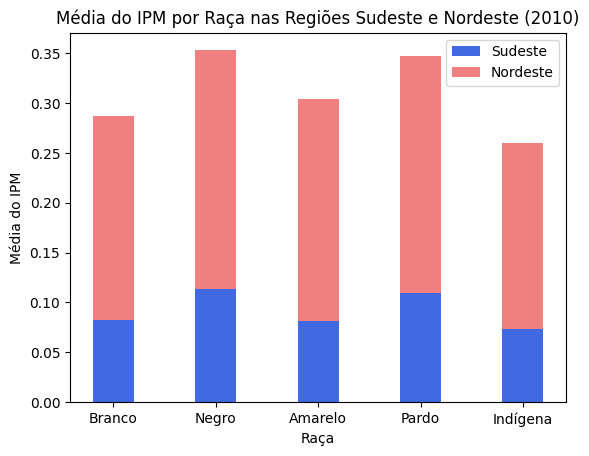

In [99]:
import matplotlib.pyplot as plt

# Médias do IPM para cada raça nas regiões Sudeste, Nordeste e Sul
racas = ["Branco", "Negro", "Amarelo", "Pardo", "Indígena"]
media_sudeste = [0.08250815799578282, 0.11311820799623912, 0.08136842314779064, 0.10915008617761979, 0.07309513396881558]
media_nordeste = [0.20426537824176283, 0.2397684378487159, 0.22292973321077258, 0.23790284856799823, 0.1864549658077462]

# Posição das barras no gráfico
x = range(len(racas))

# Cria o gráfico de barras empilhadas
plt.bar(x, media_sudeste, width=0.4, label='Sudeste', color='royalblue')
plt.bar(x, media_nordeste, width=0.4, label='Nordeste', color='lightcoral', bottom=media_sudeste)

# Configurações do gráfico
plt.xlabel('Raça')
plt.ylabel('Média do IPM')
plt.title('Média do IPM por Raça nas Regiões Sudeste e Nordeste (2010)')
plt.xticks(x, racas)
plt.legend()

# Exibe o gráfico
plt.show()


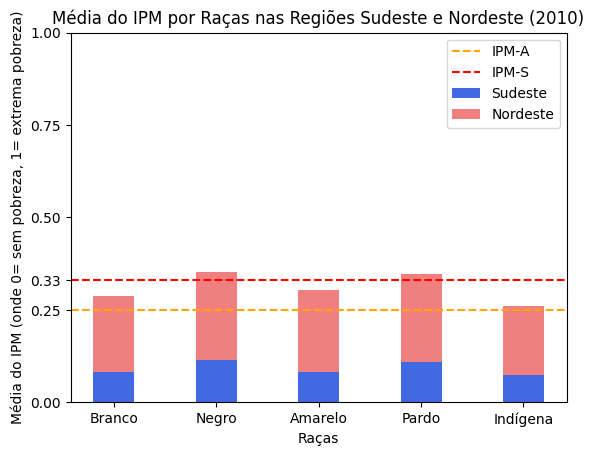

In [100]:
import matplotlib.pyplot as plt

# Médias do IPM para cada raça nas regiões Sudeste, Nordeste e Sul
racas = ["Branco", "Negro", "Amarelo", "Pardo", "Indígena"]
media_sudeste = [0.08250815799578282, 0.11311820799623912, 0.08136842314779064, 0.10915008617761979, 0.07309513396881558]
media_nordeste = [0.20426537824176283, 0.2397684378487159, 0.22292973321077258, 0.23790284856799823, 0.1864549658077462]
# Posição das barras no gráfico
x = range(len(racas))

# Cria o gráfico de barras empilhadas
plt.bar(x, media_sudeste, width=0.4, label='Sudeste', color='royalblue')
plt.bar(x, media_nordeste, width=0.4, label='Nordeste', color='lightcoral', bottom=media_sudeste)

# Adiciona as linhas horizontais
plt.axhline(y=0.25, color='orange', linestyle='--', label='IPM-A')
plt.axhline(y=0.33, color='red', linestyle='--', label='IPM-S')

# Configurações do gráfico
plt.xlabel('Raças')
plt.ylabel('Média do IPM (onde 0= sem pobreza, 1= extrema pobreza)')
plt.title('Média do IPM por Raças nas Regiões Sudeste e Nordeste (2010)')
plt.xticks(x, racas)
plt.yticks([0, 0.25, 0.33, 0.5, 0.75, 1.0], ['0.00', '0.25', '0.33', '0.50', '0.75', '1.00'])
plt.legend()

# Exibe o gráfico
plt.show()


In [123]:
# Dicionário com os DataFrames de cada estado na Região Nordeste
regiao_nordeste = {
    "Maranhão (MA)": dados_ma,
    "Piauí (PI)": dados_pi,
    "Ceará (CE)": dados_ce,
    "Rio Grande do Norte (RN)": dados_rn,
    "Paraíba (PB)": dados_pb,
    "Pernambuco (PE)": dados_pe,
    "Alagoas (AL)": dados_al,
    "Sergipe (SE)": dados_se,
    "Bahia (BA)": dados_ba
}

# Dicionário para armazenar as médias
medias_por_estado_nordeste = {}

# Calcula a média para cada estado e variável, ignorando a primeira linha
for estado, df_estado in regiao_nordeste.items():
    medias_estado = {}
    for variavel in variaveis:
      valores = pd.to_numeric(df_estado.iloc[1:][variavel], errors='coerce')
        # Calcula a média dos valores numéricos
        media = valores.mean()
        medias_estado[variavel] = media
    medias_por_estado_nordeste[estado] = medias_estado


# Cria um DataFrame com as médias por estado
df_medias_nordeste = pd.DataFrame(medias_por_estado_nordeste)

# Transpõe o DataFrame para ter os estados como índice
df_medias_nordeste = df_medias_nordeste.T

# Exibe o DataFrame com as médias para a Região Nordeste
print(df_medias_nordeste)


IndentationError: ignored

In [102]:
# Dicionário com os DataFrames de cada estado na Região Sul
regiao_sul = {
    "Paraná (PR)": dados_pr,
    "Santa Catarina (SC)": dados_sc,
    "Rio Grande do Sul (RS)": dados_rs,
}

# Dicionário para mapear as raças
racas = {
    1: "Branco",
    2: "Preto",
    3: "Amarelo",
    4: "Pardo",
    5: "Indígena"
}

# Inicializa um dicionário para armazenar as somas do IPM por raça
somas_ipm_por_raca = {raca: 0 for raca in racas}

# Itera sobre os DataFrames de cada estado na Região Sul
for estado, df_estado in regiao_sul.items():
    # Itera sobre as raças
    for raca, nome_raca in racas.items():
        # Filtra as linhas com 'raca' igual à raça atual
        df_raca = df_estado[df_estado['raca'] == raca]

        # Calcula a soma do IPM para a raça atual no estado atual
        soma_ipm_raca = df_raca.iloc[1:]['IPM'].mean()

        # Adiciona a soma da raça ao dicionário geral
        somas_ipm_por_raca[raca] += soma_ipm_raca

        # Exibe a média do IPM para a raça atual no estado atual
        print(f"Média do IPM para {nome_raca} em {estado}: {soma_ipm_raca}")

# Exibe as médias totais do IPM para cada raça na Região Sul
for raca, soma in somas_ipm_por_raca.items():
    print(f"Média total do IPM para {racas[raca]}: {soma/len(regiao_sul)/100}") # Média em relação ao número de estados da região e adequado ao IPM


Média do IPM para Branco em Paraná (PR): 12.80008765577487
Média do IPM para Preto em Paraná (PR): 16.09944769756427
Média do IPM para Amarelo em Paraná (PR): 13.239979328042494
Média do IPM para Pardo em Paraná (PR): 16.69566343107616
Média do IPM para Indígena em Paraná (PR): 15.61927897749966
Média do IPM para Branco em Santa Catarina (SC): 13.399995994864737
Média do IPM para Preto em Santa Catarina (SC): 18.753241974403508
Média do IPM para Amarelo em Santa Catarina (SC): 14.551780147885665
Média do IPM para Pardo em Santa Catarina (SC): 18.56158215132849
Média do IPM para Indígena em Santa Catarina (SC): 15.138361243836268
Média do IPM para Branco em Rio Grande do Sul (RS): 12.329183055051468
Média do IPM para Preto em Rio Grande do Sul (RS): 17.80849622517751
Média do IPM para Amarelo em Rio Grande do Sul (RS): 16.090363596189082
Média do IPM para Pardo em Rio Grande do Sul (RS): 17.05479279019522
Média do IPM para Indígena em Rio Grande do Sul (RS): 17.71794059123493
Média tota

In [103]:
# Dicionário com os DataFrames de cada estado na Região Norte
regiao_norte = {
    "Acre (AC)": dados_ac,
    "Amapá (AP)": dados_ap,
    "Amazonas (AM)": dados_am,
    "Pará (PA)": dados_pa,
    "Rondônia (RO)": dados_ro,
    "Roraima (RR)": dados_rr,
    "Tocantins (TO)": dados_to,
}

# Dicionário para mapear as raças
racas = {
    1: "Brancos",
    2: "Negros",
    3: "Amarelos",
    4: "Pardos",
    5: "Indígenas"
}

# Inicializa um dicionário para armazenar as somas do IPM por raça
somas_ipm_por_raca = {raca: 0 for raca in racas}

# Itera sobre os DataFrames de cada estado na Região Norte
for estado, df_estado in regiao_norte.items():
    # Itera sobre as raças
    for raca, nome_raca in racas.items():
        # Filtra as linhas com 'raca' igual à raça atual
        df_raca = df_estado[df_estado['raca'] == raca]

        # Calcula a média do IPM para a raça atual no estado atual
        media_ipm_raca = df_raca.iloc[1:]['IPM'].mean()

        # Adiciona a média da raça ao dicionário geral
        somas_ipm_por_raca[raca] += media_ipm_raca

        # Exibe a média do IPM para a raça atual no estado atual
        print(f"Média do IPM para {nome_raca} em {estado}: {media_ipm_raca}")

# Exibe as médias totais do IPM para cada raça na Região Norte
for raca, soma in somas_ipm_por_raca.items():
    media_total = soma / len(regiao_norte)/100
    print(f"Média total do IPM para {racas[raca]} na Região Norte: {media_total}")


Média do IPM para Brancos em Acre (AC): 32.10252662549975
Média do IPM para Negros em Acre (AC): 35.841987375897304
Média do IPM para Amarelos em Acre (AC): 35.3338179565784
Média do IPM para Pardos em Acre (AC): 34.710574550592305
Média do IPM para Indígenas em Acre (AC): 45.735544980804434
Média do IPM para Brancos em Amapá (AP): 28.764638088338657
Média do IPM para Negros em Amapá (AP): 31.777408096135005
Média do IPM para Amarelos em Amapá (AP): 31.49526658812101
Média do IPM para Pardos em Amapá (AP): 32.53273340514637
Média do IPM para Indígenas em Amapá (AP): 30.876366969001594
Média do IPM para Brancos em Amazonas (AM): 33.415967019519435
Média do IPM para Negros em Amazonas (AM): 39.02151007669623
Média do IPM para Amarelos em Amazonas (AM): 36.78488267773755
Média do IPM para Pardos em Amazonas (AM): 38.691776637336936
Média do IPM para Indígenas em Amazonas (AM): 48.43761921727099
Média do IPM para Brancos em Pará (PA): 32.08725048299276
Média do IPM para Negros em Pará (PA)

In [104]:


# Dicionário com os DataFrames de cada estado na Região Centro-Oeste, excluindo o Distrito Federal
regiao_centro_oeste = {
    "Goiás (GO)": dados_go,
    "Mato Grosso (MT)": dados_mt,
    "Mato Grosso do Sul (MS)": dados_ms,
}

# Dicionário para mapear as raças
racas = {
    1: "Branco",
    2: "Preto",
    3: "Amarelo",
    4: "Pardo",
    5: "Indígena"
}

# Inicializa um dicionário para armazenar as somas do IPM por raça
somas_ipm_por_raca = {raca: 0 for raca in racas}

# Itera sobre os DataFrames de cada estado na Região Centro-Oeste
for estado, df_estado in regiao_centro_oeste.items():
    # Itera sobre as raças
    for raca, nome_raca in racas.items():
        # Filtra as linhas com 'raca' igual à raça atual
        df_raca = df_estado[df_estado['raca'] == raca]

        # Calcula a média do IPM para a raça atual no estado atual
        media_ipm_raca = df_raca.iloc[1:]['IPM'].mean()

        # Adiciona a média da raça ao dicionário geral
        somas_ipm_por_raca[raca] += media_ipm_raca

        # Exibe a média do IPM para a raça atual no estado atual
        print(f"Média do IPM para {nome_raca} em {estado}: {media_ipm_raca}")

# Exibe as médias totais do IPM para cada raça na Região Centro-Oeste
for raca, soma in somas_ipm_por_raca.items():
    media_media = soma / len(regiao_centro_oeste)
    if not pd.isna(media_media):
        print(f"Média total do IPM para {racas[raca]} na Região Centro-Oeste: {media_media / 100}")  # Média em relação ao número de estados da região e adequada ao IPM


Média do IPM para Branco em Goiás (GO): 10.461770075138082
Média do IPM para Preto em Goiás (GO): 13.38367868746806
Média do IPM para Amarelo em Goiás (GO): 9.8585493657996
Média do IPM para Pardo em Goiás (GO): 12.693966998037716
Média do IPM para Indígena em Goiás (GO): 10.284149394384604
Média do IPM para Branco em Mato Grosso (MT): 15.274495306632454
Média do IPM para Preto em Mato Grosso (MT): 18.515069805834873
Média do IPM para Amarelo em Mato Grosso (MT): 14.577895042254937
Média do IPM para Pardo em Mato Grosso (MT): 19.18511511204348
Média do IPM para Indígena em Mato Grosso (MT): 28.35378241166783
Média do IPM para Branco em Mato Grosso do Sul (MS): 12.169722206406902
Média do IPM para Preto em Mato Grosso do Sul (MS): 15.785151653514406
Média do IPM para Amarelo em Mato Grosso do Sul (MS): 9.798106760250054
Média do IPM para Pardo em Mato Grosso do Sul (MS): 16.508768715493353
Média do IPM para Indígena em Mato Grosso do Sul (MS): 24.383658661105503
Média total do IPM para 

In [105]:


# Dicionários com os DataFrames de cada estado nas regiões
regioes = {
    "Sudeste": {
        "São Paulo (SP)": dados_sp,
        "Rio de Janeiro (RJ)": dados_rj,
        "Minas Gerais (MG)": dados_mg,
        "Espírito Santo (ES)": dados_es,
    },
    "Nordeste": {
        "Maranhão (MA)": dados_ma,
        "Piauí (PI)": dados_pi,
        "Ceará (CE)": dados_ce,
        "Rio Grande do Norte (RN)": dados_rn,
        "Paraíba (PB)": dados_pb,
        "Pernambuco (PE)": dados_pe,
        "Alagoas (AL)": dados_al,
        "Sergipe (SE)": dados_se,
        "Bahia (BA)": dados_ba,
    },
    "Sul": {
        "Paraná (PR)": dados_pr,
        "Santa Catarina (SC)": dados_sc,
        "Rio Grande do Sul (RS)": dados_rs,
    },
    "Centro-Oeste": {
        "Goiás (GO)": dados_go,
        "Mato Grosso (MT)": dados_mt,
        "Mato Grosso do Sul (MS)": dados_ms,
    },
    "Norte": {
        "Rondônia (RO)": dados_ro,
        "Acre (AC)": dados_ac,
        "Amazonas (AM)": dados_am,
        "Roraima (RR)": dados_rr,
        "Pará (PA)": dados_pa,
        "Amapá (AP)": dados_ap,
        "Tocantins (TO)": dados_to,
    }
}

# Dicionário para mapear as raças
racas = {
    1: "Branco",
    2: "Preto",
    3: "Amarelo",
    4: "Pardo",
    5: "Indígena"
}

# Nome correto da coluna de raça nos DataFrames
nome_da_coluna_de_raca = "raca"

# Inicializa um dicionário para armazenar as médias do IPM por raça e por região
medias_por_raca_e_regiao = {raca: {regiao: 0 for regiao in regioes} for raca in racas}

# Itera sobre as regiões
# Itera sobre as regiões
for regiao, estados in regioes.items():
    # Itera sobre os estados na região
    for estado, df_estado in estados.items():
        # Itera sobre as raças
        for raca, nome_raca in racas.items():
            # Filtra as linhas com 'raca' igual à raça atual
            df_raca = df_estado[df_estado['raca'] == raca]

            # Calcula a média do IPM para a raça atual no estado atual
            media_ipm_raca = df_raca.iloc[1:]['IPM'].mean()

            # Adiciona a média ao resultado da raça e região
            medias_por_raca_e_regiao[raca][regiao] += media_ipm_raca


# Exibe as médias do IPM para cada raça em todas as regiões
for raca, medias_regiao in medias_por_raca_e_regiao.items():
    print(f"Médias do IPM para a raça {racas[raca]}:")
    for regiao, media in medias_regiao.items():
        media_regiao = media / len(regioes[regiao]) / 100  # Média em relação ao número de estados da região e adequação ao IPM
        print(f"Média do IPM para {racas[raca]} na Região {regiao}: {media_regiao:.4f}")
    print("\n")


Médias do IPM para a raça Branco:
Média do IPM para Branco na Região Sudeste: 0.0825
Média do IPM para Branco na Região Nordeste: 0.2043
Média do IPM para Branco na Região Sul: 0.1284
Média do IPM para Branco na Região Centro-Oeste: 0.1264
Média do IPM para Branco na Região Norte: 0.2748


Médias do IPM para a raça Preto:
Média do IPM para Preto na Região Sudeste: 0.1137
Média do IPM para Preto na Região Nordeste: 0.2398
Média do IPM para Preto na Região Sul: 0.1755
Média do IPM para Preto na Região Centro-Oeste: 0.1589
Média do IPM para Preto na Região Norte: 0.3159


Médias do IPM para a raça Amarelo:
Média do IPM para Amarelo na Região Sudeste: 0.1036
Média do IPM para Amarelo na Região Nordeste: 0.2229
Média do IPM para Amarelo na Região Sul: 0.1463
Média do IPM para Amarelo na Região Centro-Oeste: 0.1141
Média do IPM para Amarelo na Região Norte: 0.2884


Médias do IPM para a raça Pardo:
Média do IPM para Pardo na Região Sudeste: 0.1092
Média do IPM para Pardo na Região Nordeste: 

In [106]:


# Dicionário com os DataFrames de cada estado na Região Centro-Oeste, excluindo o Distrito Federal
regiao_sul = {
       "Paraná (PR)": dados_pr,
        "Santa Catarina (SC)": dados_sc,
        "Rio Grande do Sul (RS)": dados_rs,
}

# Dicionário para mapear as raças
racas = {
    1: "Branco",
    2: "Preto",
    3: "Amarelo",
    4: "Pardo",
    5: "Indígena"
}

# Inicializa um dicionário para armazenar as somas do IPM por raça
somas_ipm_por_raca = {raca: 0 for raca in racas}

# Itera sobre os DataFrames de cada estado na Região Centro-Oeste
for estado, df_estado in regiao_sul.items():
    # Itera sobre as raças
    for raca, nome_raca in racas.items():
        # Filtra as linhas com 'raca' igual à raça atual
        df_raca = df_estado[df_estado['raca'] == raca]

        # Calcula a média do IPM para a raça atual no estado atual
        media_ipm_raca = df_raca.iloc[1:]['IPM'].mean()

        # Adiciona a média da raça ao dicionário geral
        somas_ipm_por_raca[raca] += media_ipm_raca

        # Exibe a média do IPM para a raça atual no estado atual
        print(f"Média do IPM para {nome_raca} em {estado}: {media_ipm_raca}")

# Exibe as médias totais do IPM para cada raça na Região Centro-Oeste
for raca, soma in somas_ipm_por_raca.items():
    media_media = soma / len(regiao_centro_oeste)
    if not pd.isna(media_media):
        print(f"Média total do IPM para {racas[raca]} na Região Sul: {media_media / 100}")  # Média em relação ao número de estados da região e adequada ao IPM


Média do IPM para Branco em Paraná (PR): 12.80008765577487
Média do IPM para Preto em Paraná (PR): 16.09944769756427
Média do IPM para Amarelo em Paraná (PR): 13.239979328042494
Média do IPM para Pardo em Paraná (PR): 16.69566343107616
Média do IPM para Indígena em Paraná (PR): 15.61927897749966
Média do IPM para Branco em Santa Catarina (SC): 13.399995994864737
Média do IPM para Preto em Santa Catarina (SC): 18.753241974403508
Média do IPM para Amarelo em Santa Catarina (SC): 14.551780147885665
Média do IPM para Pardo em Santa Catarina (SC): 18.56158215132849
Média do IPM para Indígena em Santa Catarina (SC): 15.138361243836268
Média do IPM para Branco em Rio Grande do Sul (RS): 12.329183055051468
Média do IPM para Preto em Rio Grande do Sul (RS): 17.80849622517751
Média do IPM para Amarelo em Rio Grande do Sul (RS): 16.090363596189082
Média do IPM para Pardo em Rio Grande do Sul (RS): 17.05479279019522
Média do IPM para Indígena em Rio Grande do Sul (RS): 17.71794059123493
Média tota

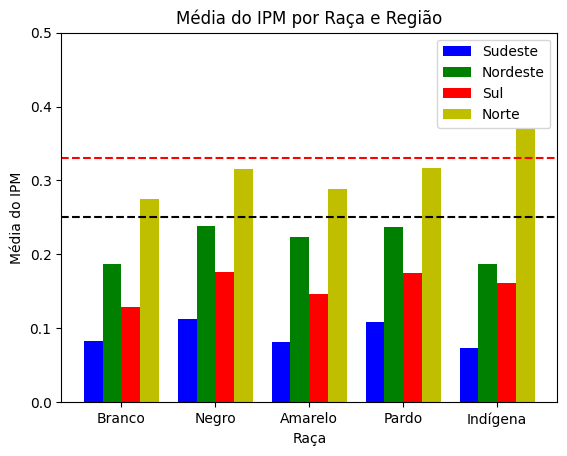

In [109]:

# Médias do IPM para cada raça nas regiões Sudeste, Nordeste, Sul e Norte
racas = ["Branco", "Negro", "Amarelo", "Pardo", "Indígena"]
media_sudeste = [0.0826, 0.1131, 0.0820, 0.1091, 0.0735]
media_nordeste = [0.1864, 0.2379, 0.2229, 0.2377, 0.1865]
media_sul = [0.1284, 0.1755, 0.1463, 0.1744, 0.1616]
media_norte = [0.2748, 0.3159, 0.2884, 0.3163, 0.3694]  # Médias atualizadas para a Região Norte

# Largura da barra
bar_width = 0.2

# Posições das barras no eixo x
posicoes = range(len(racas))

# Cria o gráfico de barras
plt.bar(posicoes, media_sudeste, bar_width, label='Sudeste', color='b', align='center')
plt.bar([p + bar_width for p in posicoes], media_nordeste, bar_width, label='Nordeste', color='g', align='center')
plt.bar([p + 2 * bar_width for p in posicoes], media_sul, bar_width, label='Sul', color='r', align='center')
plt.bar([p + 3 * bar_width for p in posicoes], media_norte, bar_width, label='Norte', color='y', align='center')

# Rótulos no eixo x
plt.xticks([p + 1.5 * bar_width for p in posicoes], racas)

# Título e rótulos dos eixos
plt.title('Média do IPM por Raça e Região')
plt.xlabel('Raça')
plt.ylabel('Média do IPM')

# Legenda
plt.legend()

# Adiciona linhas horizontais para as médias de referência
plt.axhline(y=0.25, color='k', linestyle='--', label='IPM-A')
plt.axhline(y=0.33, color='r', linestyle='--', label='IPM-S')

# Define o limite do eixo y de 0 a 1
plt.ylim(0, 0.5)

# Mostra o gráfico
plt.show()


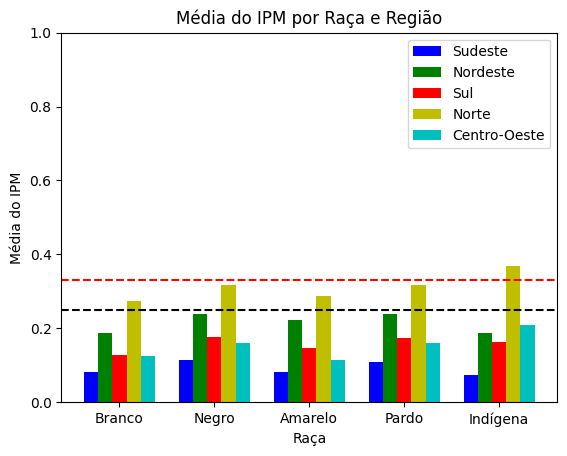

In [110]:

# Médias do IPM para cada raça nas regiões Sudeste, Nordeste, Sul, e Norte
racas = ["Branco", "Negro", "Amarelo", "Pardo", "Indígena"]
media_sudeste = [0.0826, 0.1131, 0.0820, 0.1091, 0.0735]
media_nordeste = [0.1864, 0.2379, 0.2229, 0.2377, 0.1865]
media_sul = [0.1284, 0.1755, 0.1463, 0.1744, 0.1616]
media_norte = [0.2748, 0.3159, 0.2884, 0.3163, 0.3694]  # Médias atualizadas para a Região Norte
media_centro_oeste = [0.1264, 0.1589, 0.1141, 0.1613, 0.2101]  # Médias para a Região Centro-Oeste

# Largura da barra
bar_width = 0.15

# Posições das barras no eixo x
posicoes = range(len(racas))

# Cria o gráfico de barras
plt.bar(posicoes, media_sudeste, bar_width, label='Sudeste', color='b', align='center')
plt.bar([p + bar_width for p in posicoes], media_nordeste, bar_width, label='Nordeste', color='g', align='center')
plt.bar([p + 2 * bar_width for p in posicoes], media_sul, bar_width, label='Sul', color='r', align='center')
plt.bar([p + 3 * bar_width for p in posicoes], media_norte, bar_width, label='Norte', color='y', align='center')
plt.bar([p + 4 * bar_width for p in posicoes], media_centro_oeste, bar_width, label='Centro-Oeste', color='c', align='center')

# Rótulos no eixo x
plt.xticks([p + 2 * bar_width for p in posicoes], racas)

# Título e rótulos dos eixos
plt.title('Média do IPM por Raça e Região')
plt.xlabel('Raça')
plt.ylabel('Média do IPM')

# Legenda
plt.legend()

# Adiciona linhas horizontais para as médias de referência
plt.axhline(y=0.25, color='k', linestyle='--', label='IPM-A')
plt.axhline(y=0.33, color='r', linestyle='--', label='IPM-S')

# Define o limite do eixo y de 0 a 0.5
plt.ylim(0, 1)

# Mostra o gráfico
plt.show()


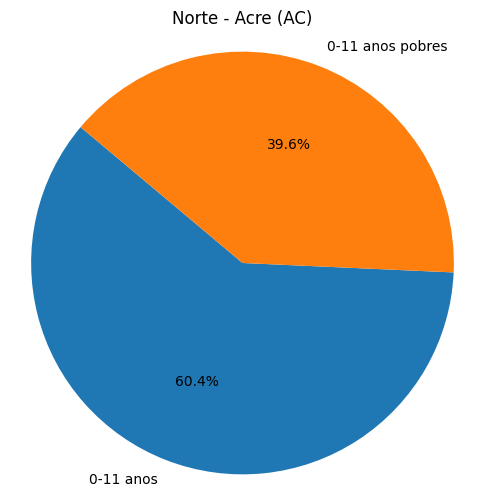

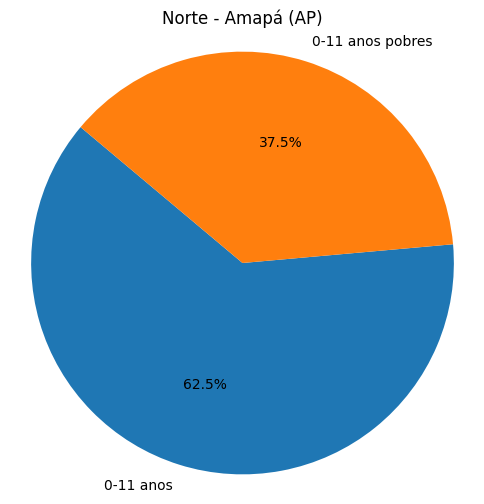

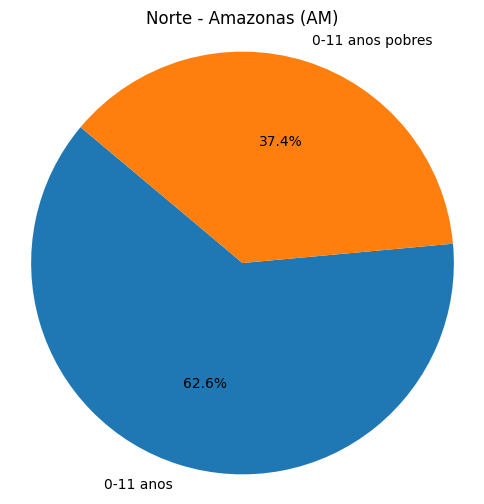

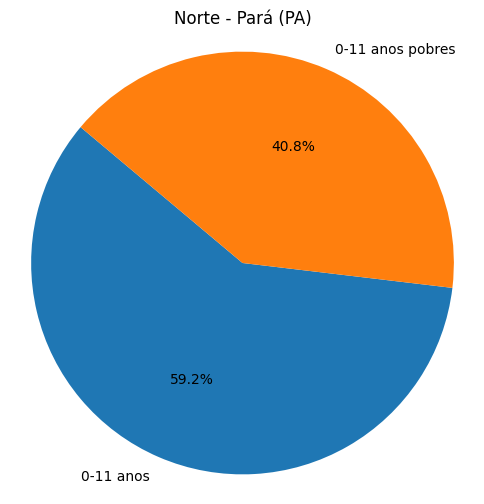

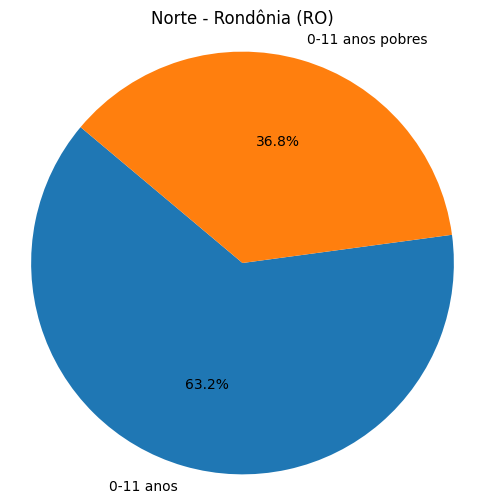

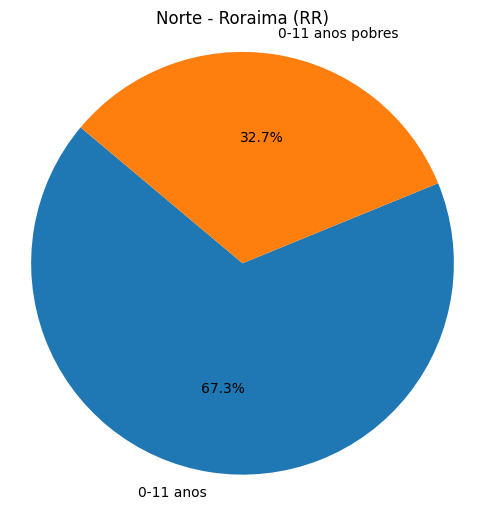

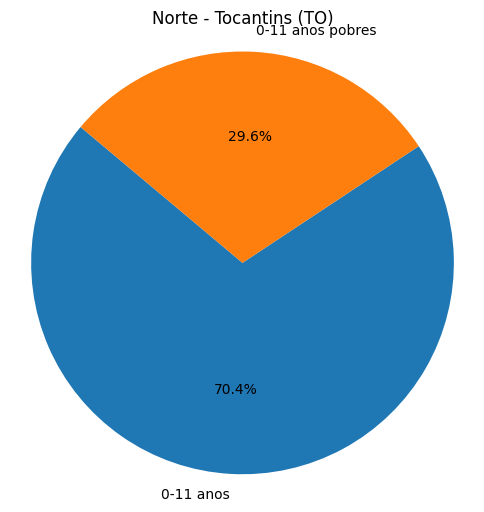

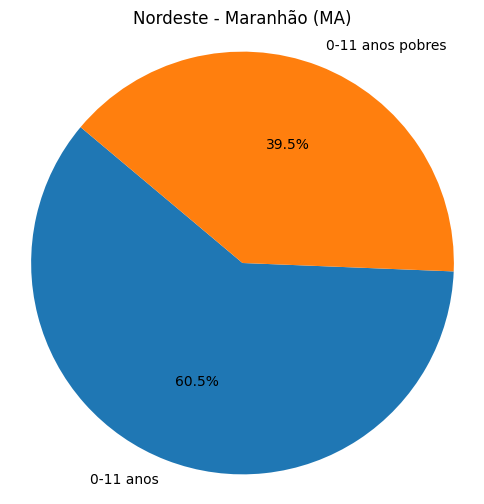

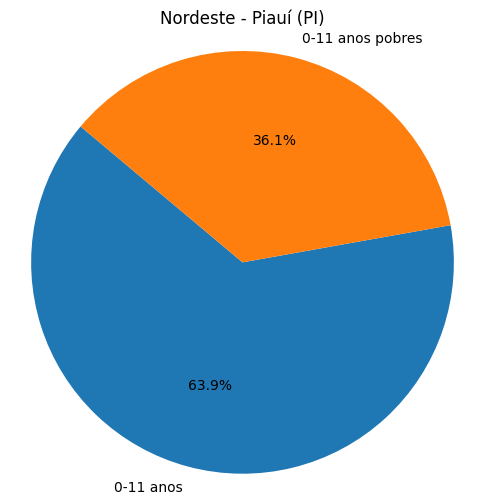

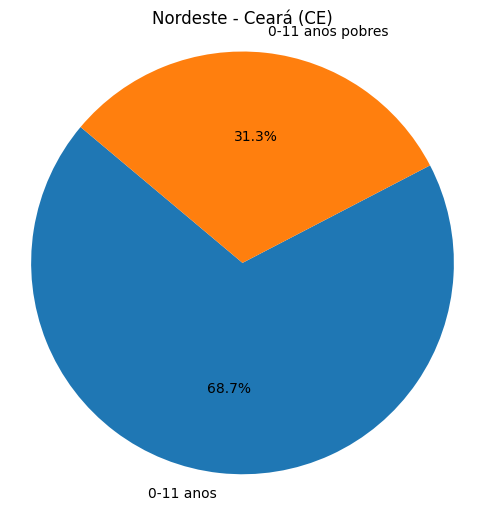

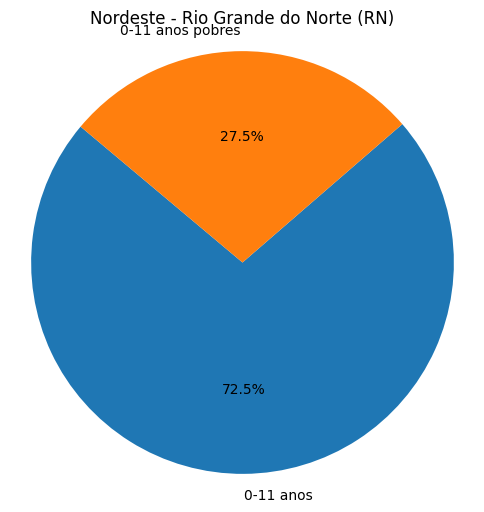

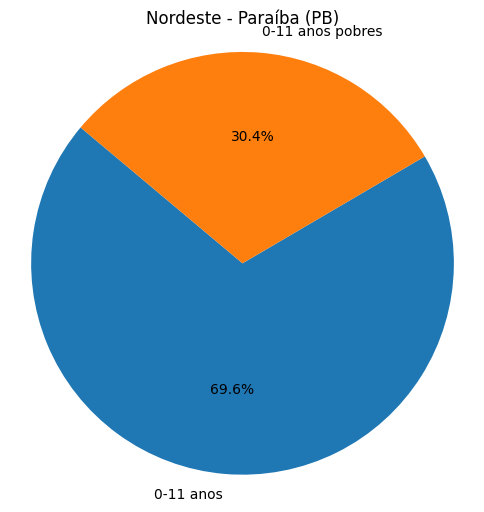

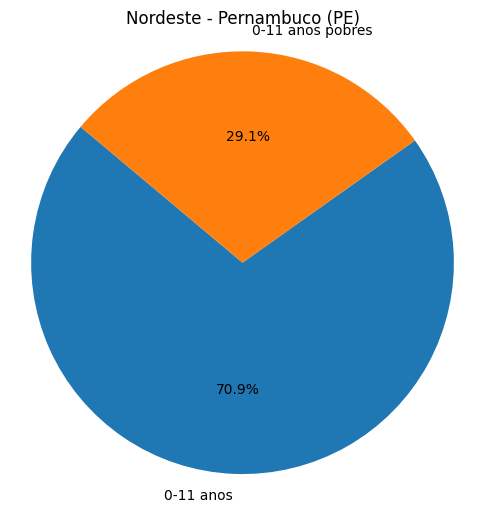

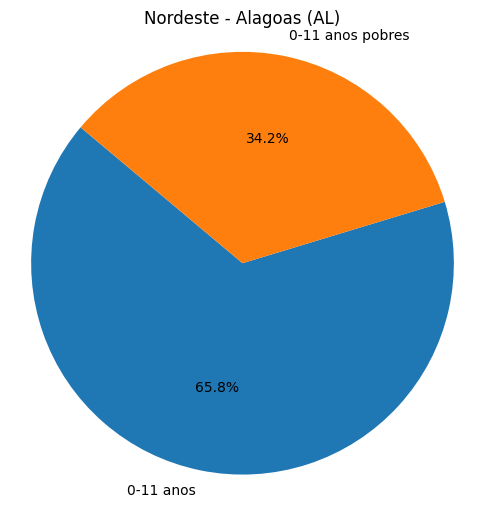

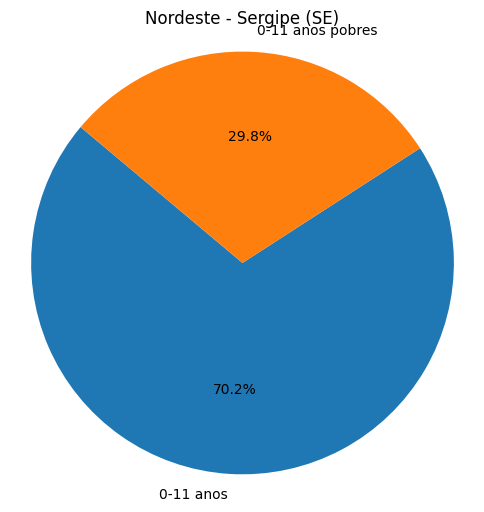

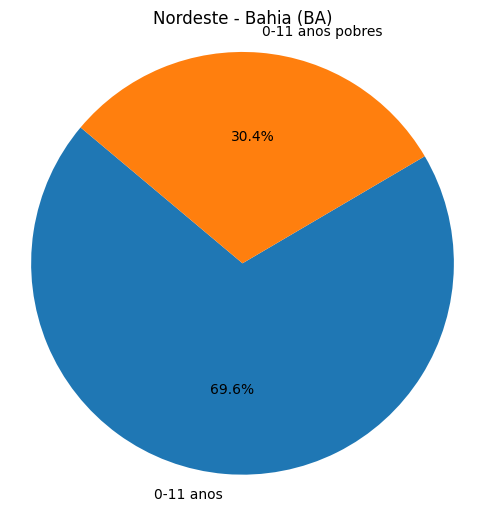

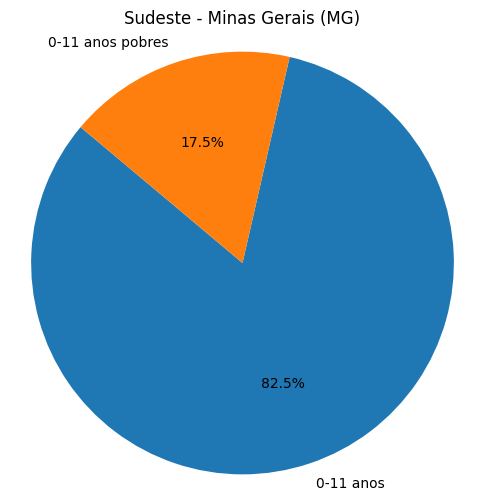

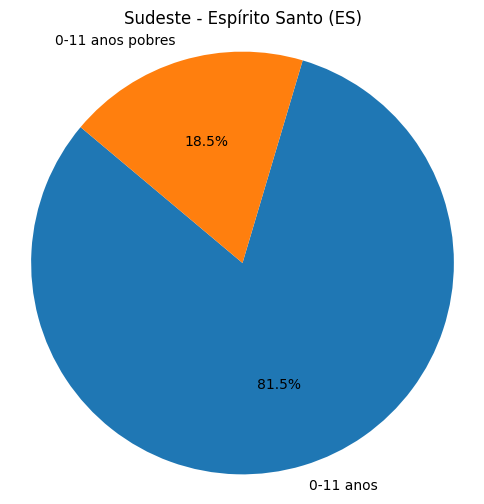

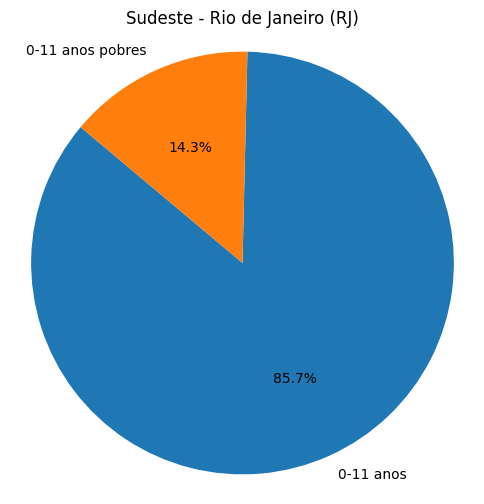

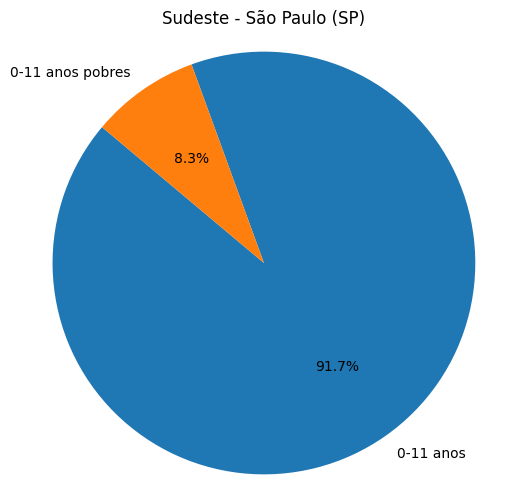

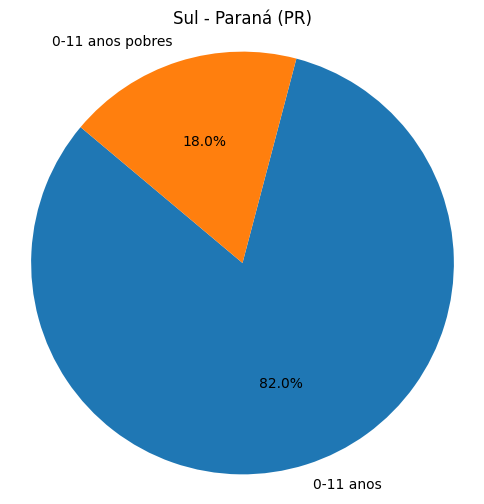

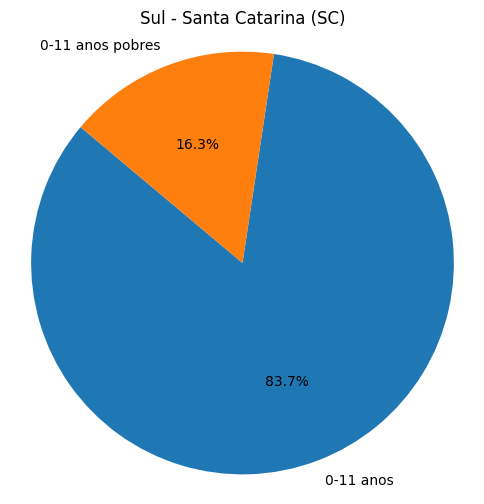

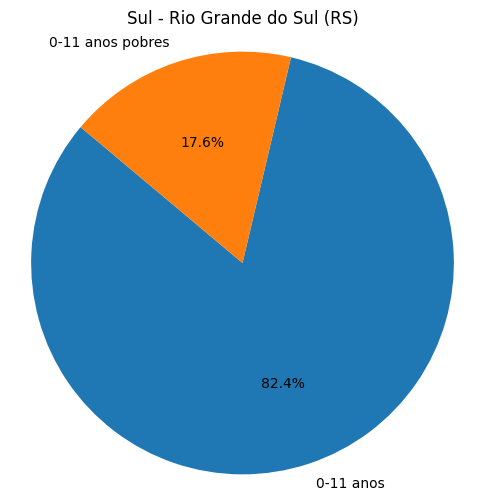

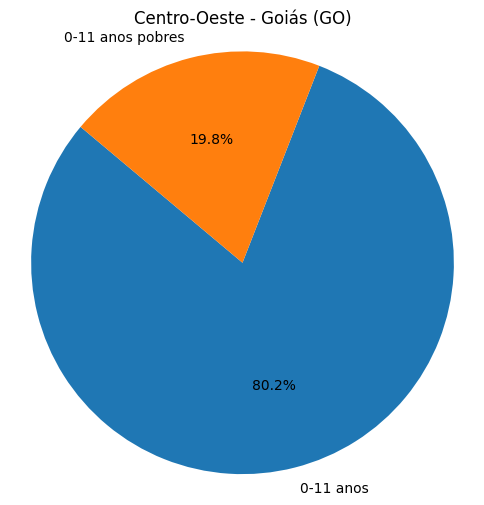

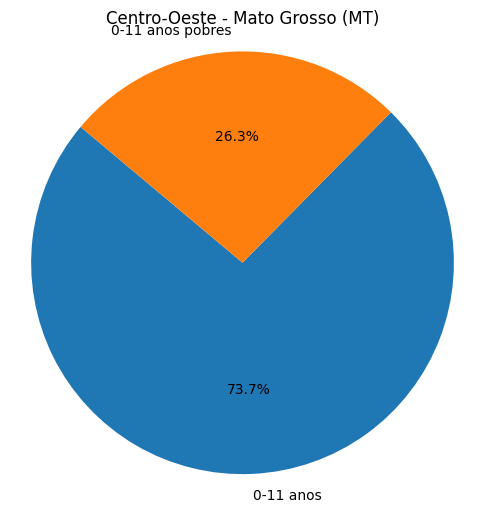

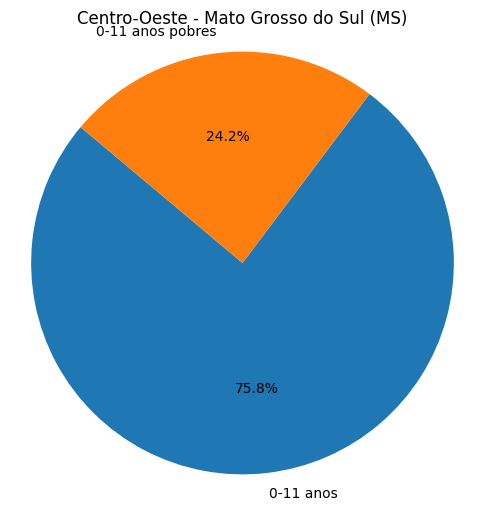

In [112]:


# Lista de DataFrames das regiões
regioes = [regiao_norte, regiao_nordeste, regiao_sudeste, regiao_sul, regiao_centro_oeste]

# Títulos das regiões
titulos = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

# Nomes das colunas que você deseja plotar
coluna_qtd_0a11 = 'qtd_0a11'
coluna_qtd_0a11_pobres = 'qtd_0a11_pobres'

# Loop para criar gráficos de pizza para as colunas 'qtd_0a11' e 'qtd_0a11_pobres' em cada estado de cada região
for regiao, titulo in zip(regioes, titulos):
    for estado in regiao.keys():
        # Cria um gráfico de pizza para as colunas 'qtd_0a11' e 'qtd_0a11_pobres' em cada estado
        estado_dataframe = regiao[estado]
        if coluna_qtd_0a11 in estado_dataframe.columns and coluna_qtd_0a11_pobres in estado_dataframe.columns:
            # Exclua a primeira linha (título) e calcule as somas
            qtd_0a11_sum = estado_dataframe.iloc[1:][coluna_qtd_0a11].sum()
            qtd_0a11_pobres_sum = estado_dataframe.iloc[1:][coluna_qtd_0a11_pobres].sum()

            # Cria um gráfico de pizza
            labels = ['0-11 anos', '0-11 anos pobres']
            sizes = [qtd_0a11_sum, qtd_0a11_pobres_sum]
            plt.figure(figsize=(6, 6))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.axis('equal')  # O gráfico de pizza aparecerá como um círculo.
            plt.title(f'{titulo} - {estado}')
            plt.show()


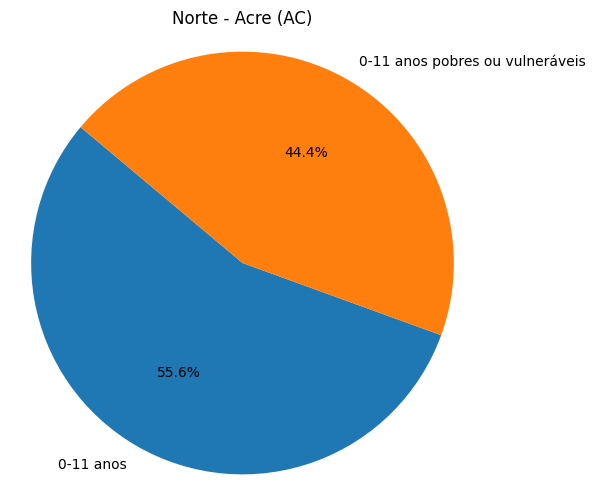

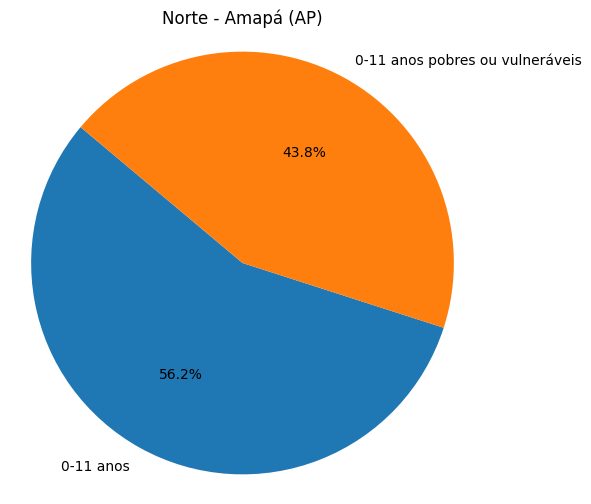

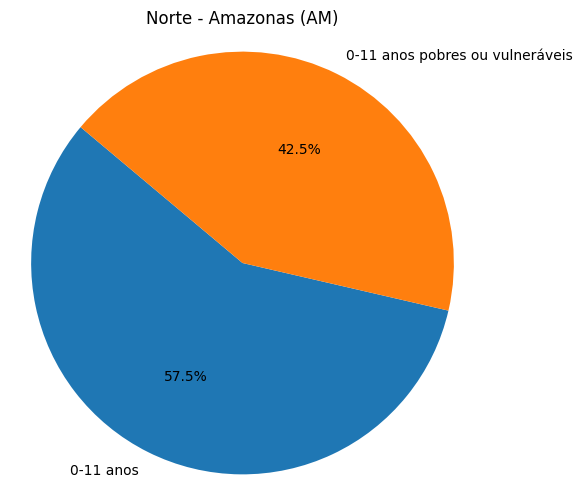

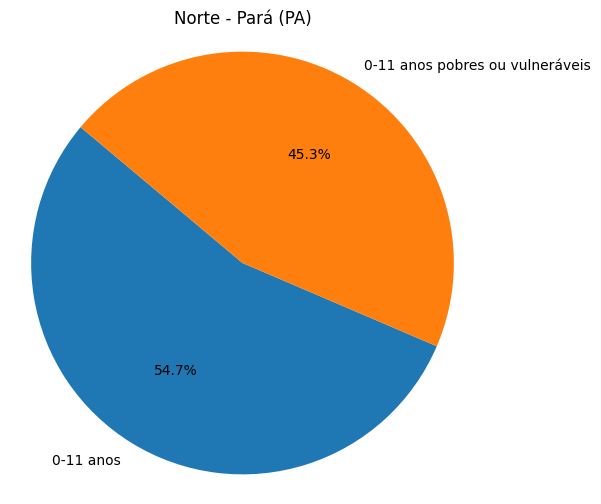

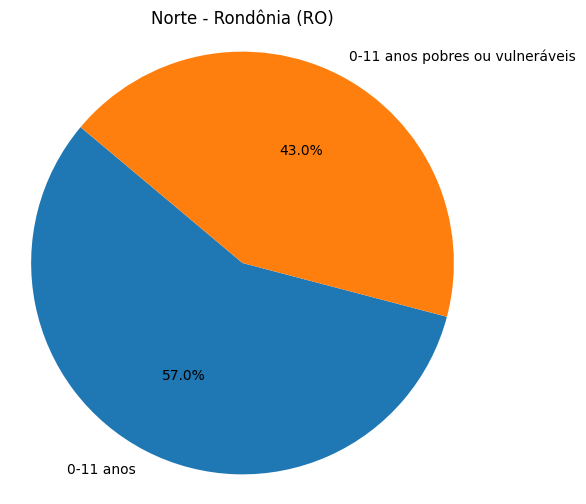

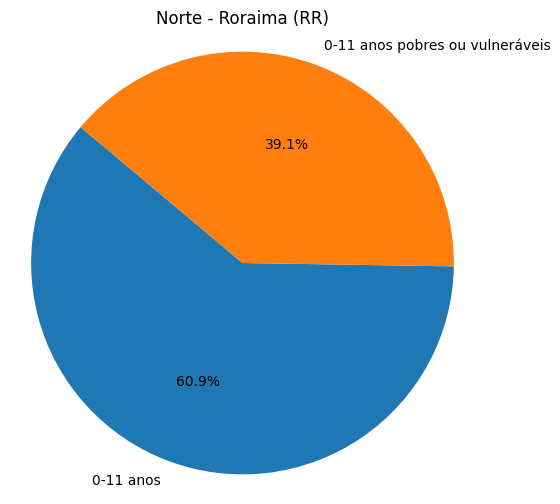

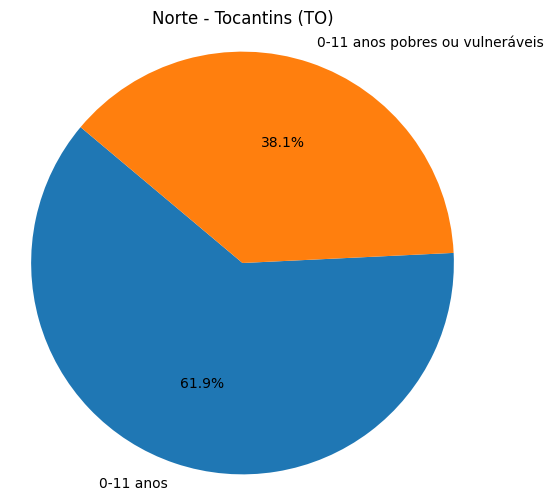

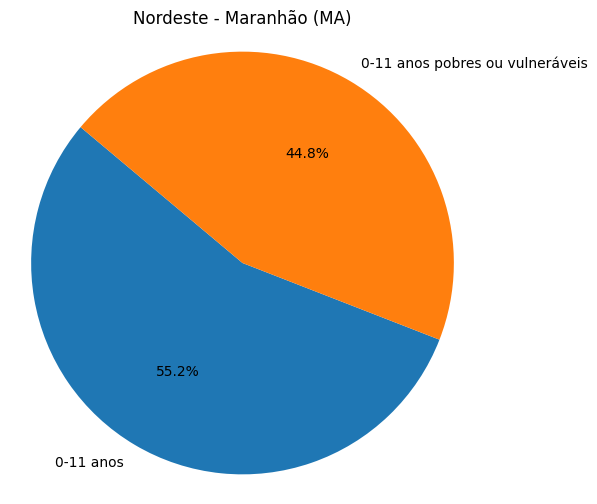

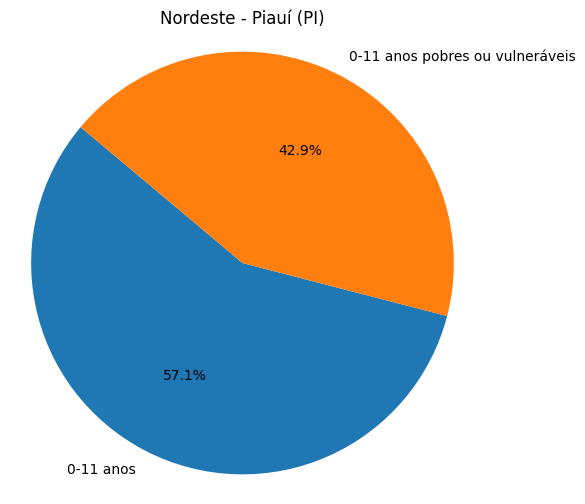

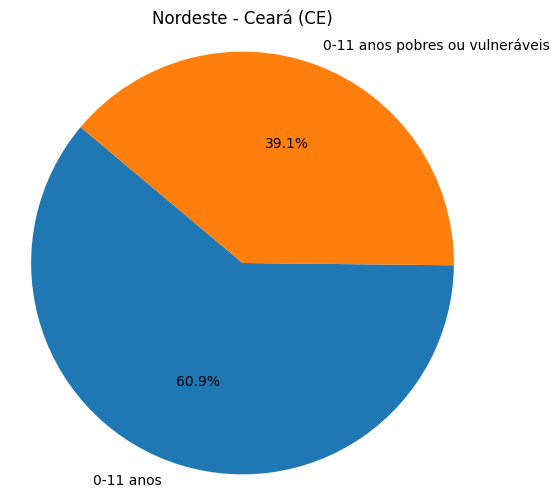

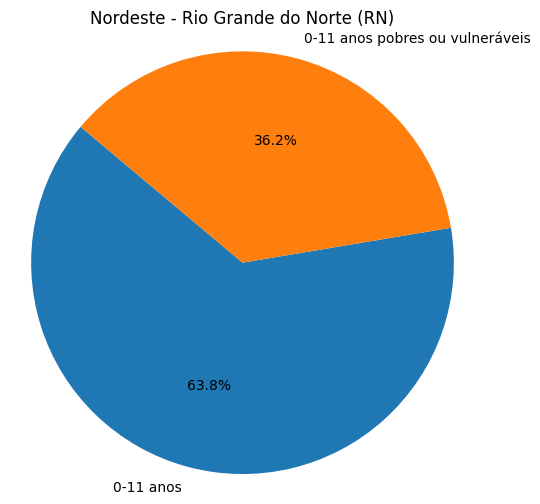

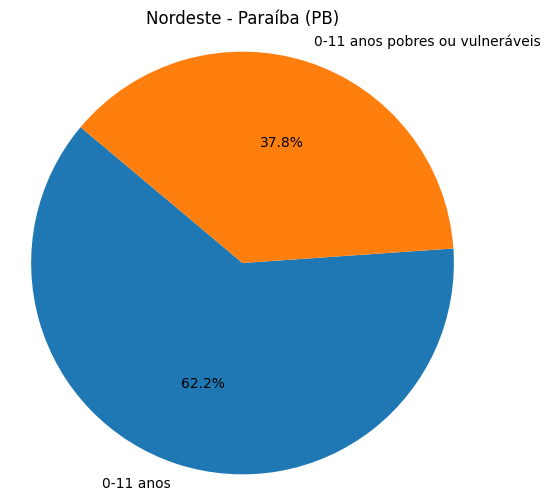

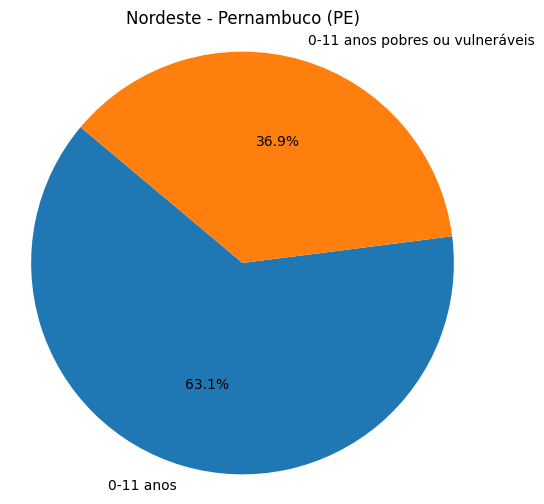

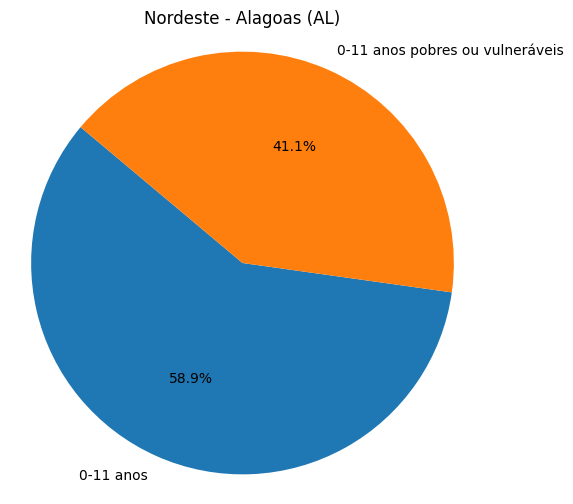

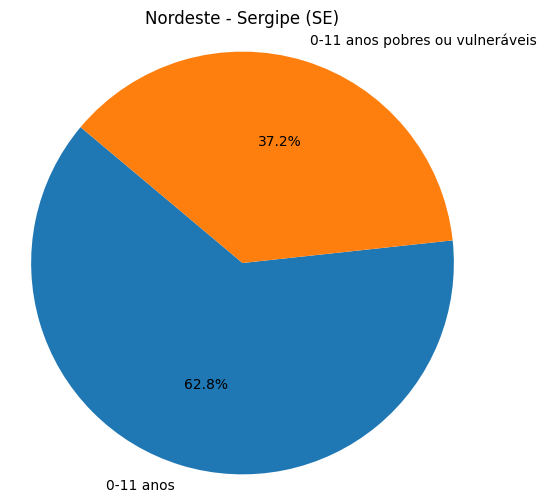

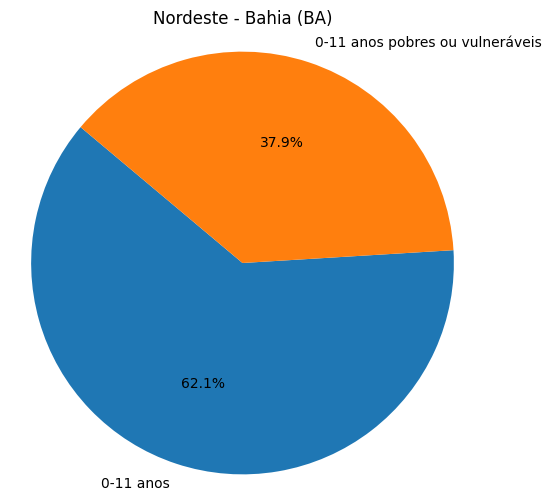

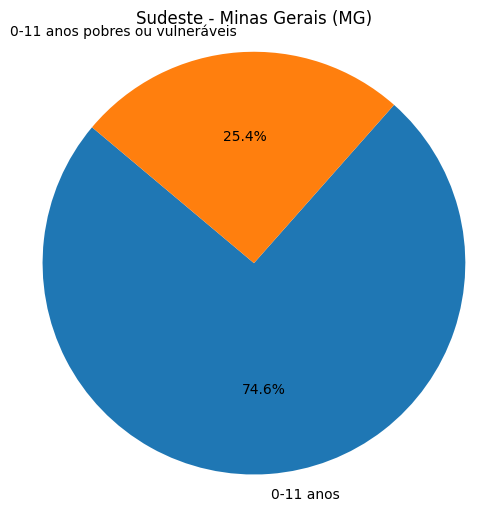

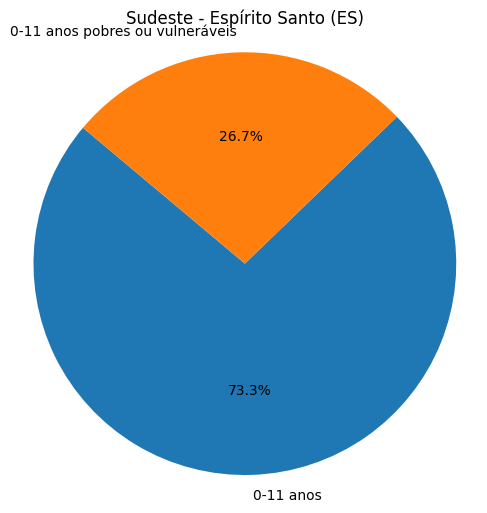

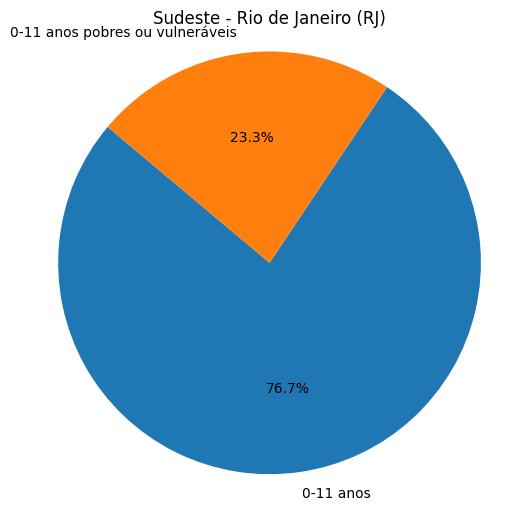

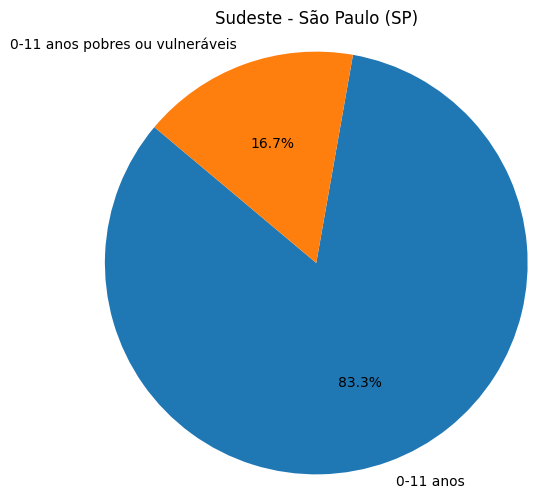

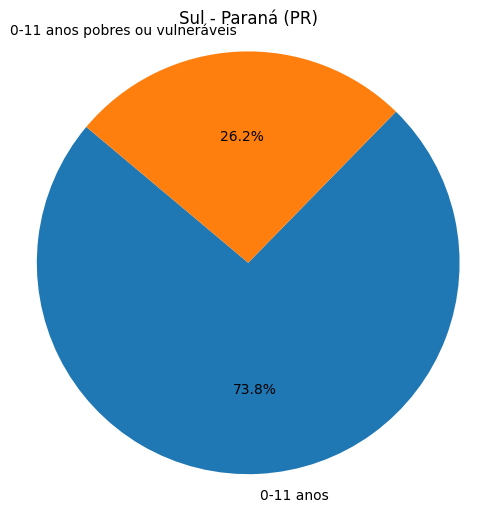

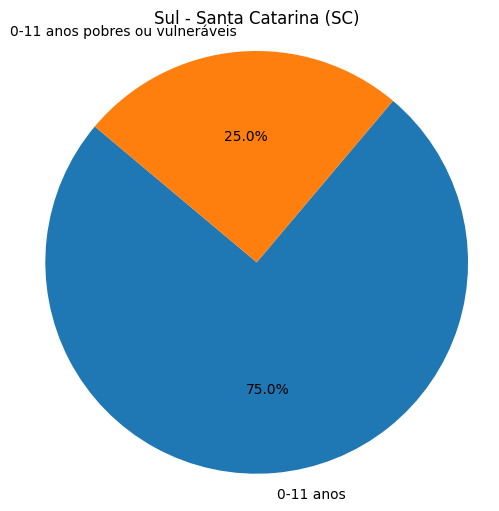

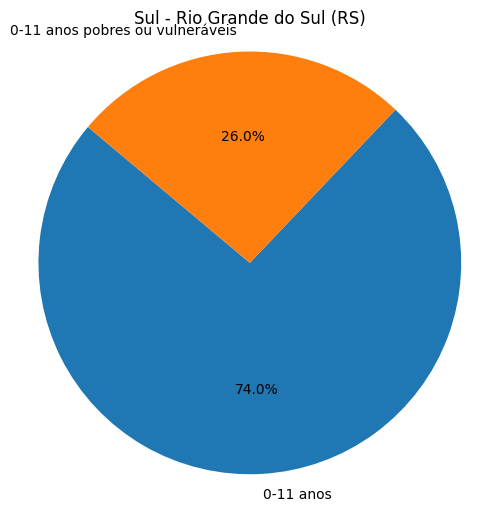

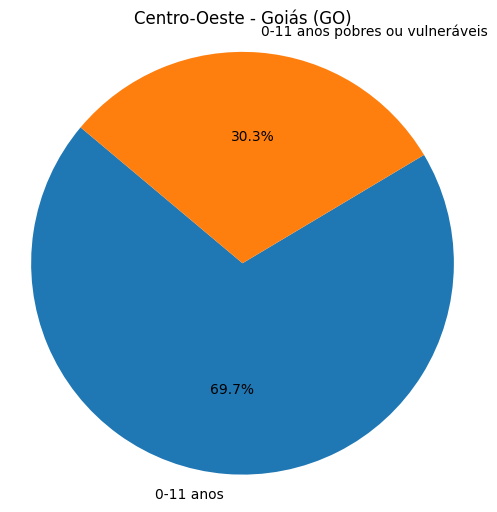

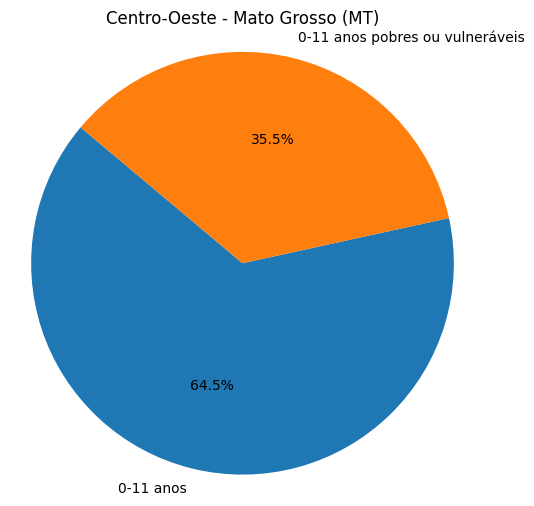

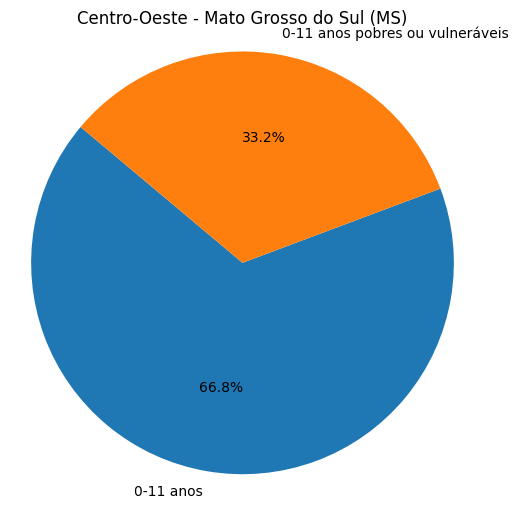

In [113]:

# Lista de DataFrames das regiões
regioes = [regiao_norte, regiao_nordeste, regiao_sudeste, regiao_sul, regiao_centro_oeste]

# Títulos das regiões
titulos = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

# Nomes das colunas que você deseja plotar
coluna_qtd_0a11 = 'qtd_0a11'
coluna_qtd_0a11_pob_vul = 'qtd_0a11_pob_vul'

# Loop para criar gráficos de pizza para as colunas 'qtd_0a11' e 'qtd_0a11_pob_vul' em cada estado de cada região
for regiao, titulo in zip(regioes, titulos):
    for estado in regiao.keys():
        # Cria um gráfico de pizza para as colunas 'qtd_0a11' e 'qtd_0a11_pob_vul' em cada estado
        estado_dataframe = regiao[estado]
        if coluna_qtd_0a11 in estado_dataframe.columns and coluna_qtd_0a11_pob_vul in estado_dataframe.columns:
            # Exclua a primeira linha (título) e calcule as somas
            qtd_0a11_sum = estado_dataframe.iloc[1:][coluna_qtd_0a11].sum()
            qtd_0a11_pob_vul_sum = estado_dataframe.iloc[1:][coluna_qtd_0a11_pob_vul].sum()

            # Cria um gráfico de pizza
            labels = ['0-11 anos', '0-11 anos pobres ou vulneráveis']
            sizes = [qtd_0a11_sum, qtd_0a11_pob_vul_sum]
            plt.figure(figsize=(6, 6))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.axis('equal')  # O gráfico de pizza aparecerá como um círculo.
            plt.title(f'{titulo} - {estado}')
            plt.show()


Norte - Acre (AC) - 0-11 anos: 55.6%
Norte - Acre (AC) - 0-11 anos pobres ou vulneráveis: 44.4%
Norte - Amapá (AP) - 0-11 anos: 56.2%
Norte - Amapá (AP) - 0-11 anos pobres ou vulneráveis: 43.8%
Norte - Amazonas (AM) - 0-11 anos: 57.5%
Norte - Amazonas (AM) - 0-11 anos pobres ou vulneráveis: 42.5%
Norte - Pará (PA) - 0-11 anos: 54.7%
Norte - Pará (PA) - 0-11 anos pobres ou vulneráveis: 45.3%
Norte - Rondônia (RO) - 0-11 anos: 57.0%
Norte - Rondônia (RO) - 0-11 anos pobres ou vulneráveis: 43.0%
Norte - Roraima (RR) - 0-11 anos: 60.9%
Norte - Roraima (RR) - 0-11 anos pobres ou vulneráveis: 39.1%
Norte - Tocantins (TO) - 0-11 anos: 61.9%
Norte - Tocantins (TO) - 0-11 anos pobres ou vulneráveis: 38.1%
Nordeste - Maranhão (MA) - 0-11 anos: 55.2%
Nordeste - Maranhão (MA) - 0-11 anos pobres ou vulneráveis: 44.8%
Nordeste - Piauí (PI) - 0-11 anos: 57.1%
Nordeste - Piauí (PI) - 0-11 anos pobres ou vulneráveis: 42.9%
Nordeste - Ceará (CE) - 0-11 anos: 60.9%
Nordeste - Ceará (CE) - 0-11 anos pobre

<ipython-input-114-0dbaf063044e>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


Sul - Santa Catarina (SC) - 0-11 anos: 75.0%
Sul - Santa Catarina (SC) - 0-11 anos pobres ou vulneráveis: 25.0%
Sul - Rio Grande do Sul (RS) - 0-11 anos: 74.0%
Sul - Rio Grande do Sul (RS) - 0-11 anos pobres ou vulneráveis: 26.0%
Centro-Oeste - Goiás (GO) - 0-11 anos: 69.7%
Centro-Oeste - Goiás (GO) - 0-11 anos pobres ou vulneráveis: 30.3%
Centro-Oeste - Mato Grosso (MT) - 0-11 anos: 64.5%
Centro-Oeste - Mato Grosso (MT) - 0-11 anos pobres ou vulneráveis: 35.5%
Centro-Oeste - Mato Grosso do Sul (MS) - 0-11 anos: 66.8%
Centro-Oeste - Mato Grosso do Sul (MS) - 0-11 anos pobres ou vulneráveis: 33.2%


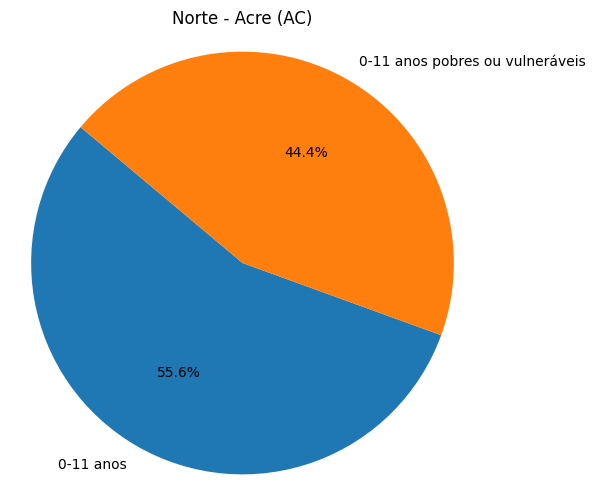

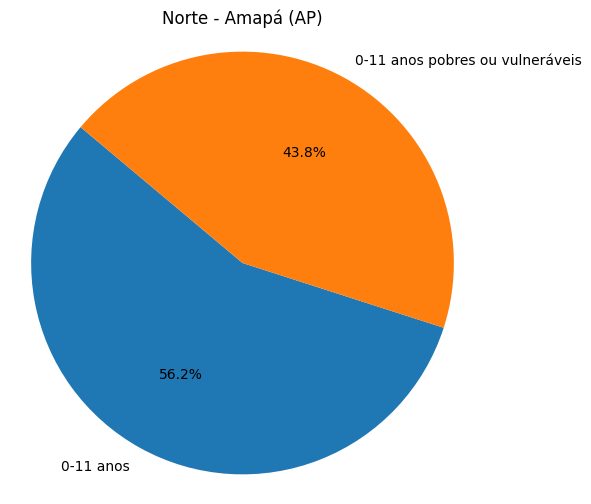

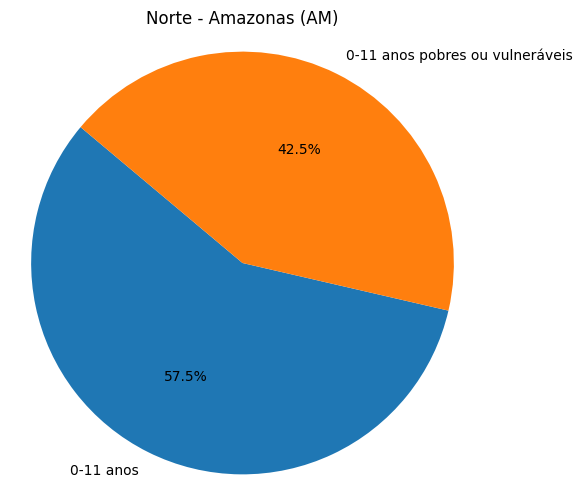

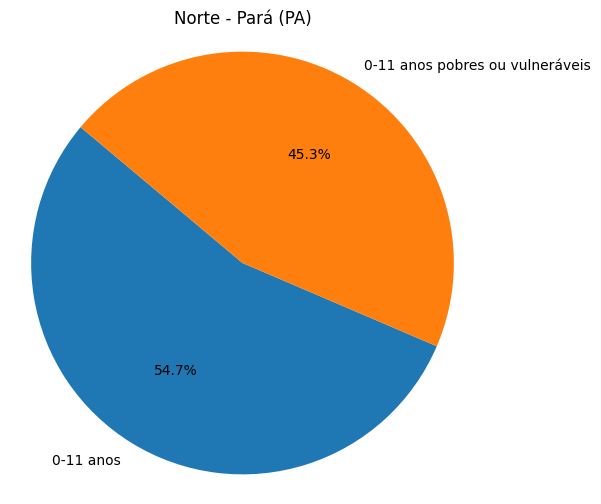

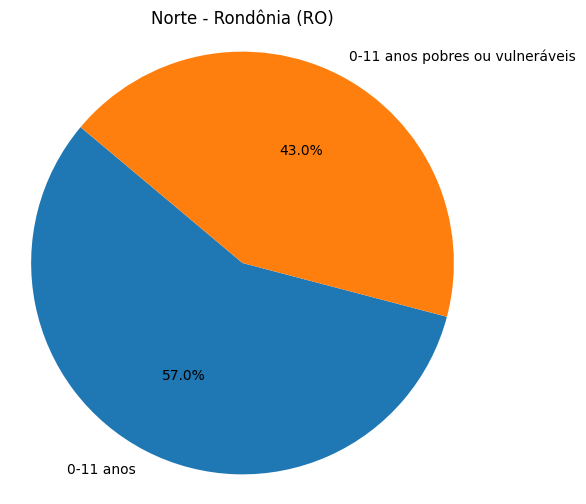

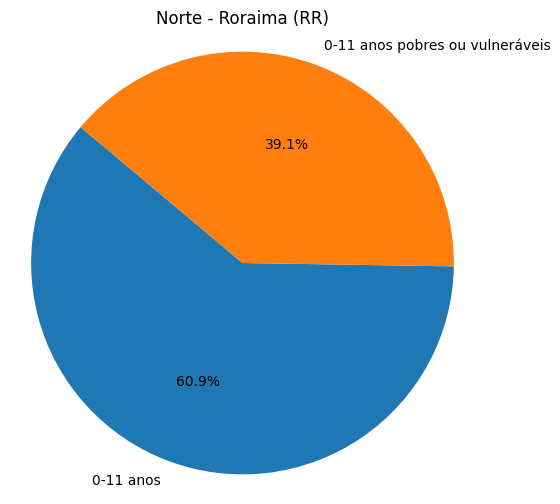

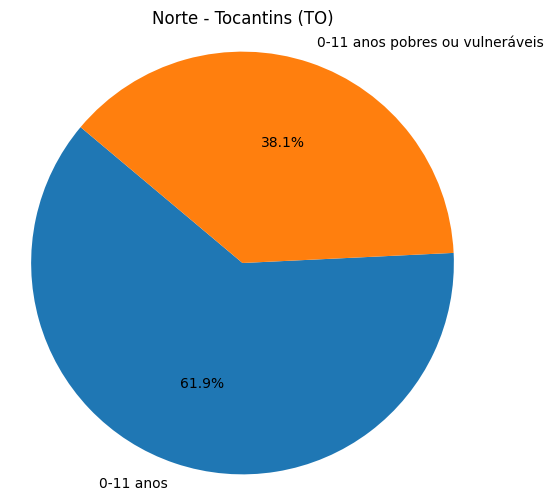

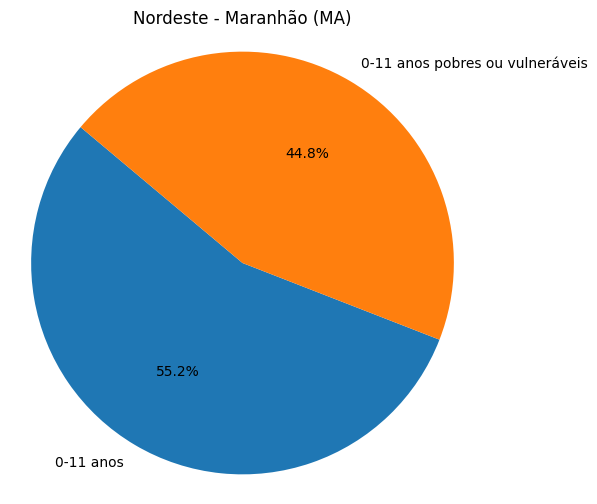

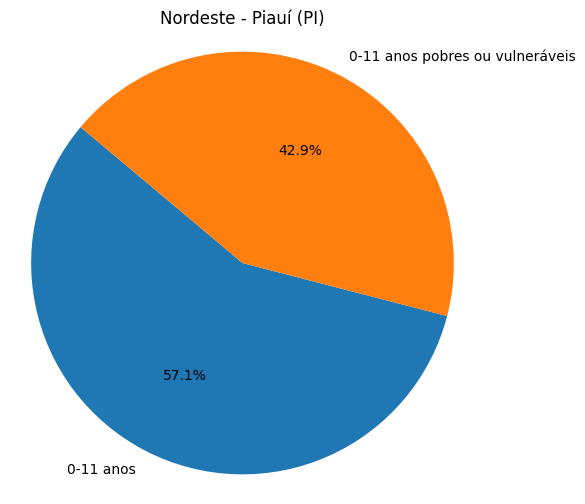

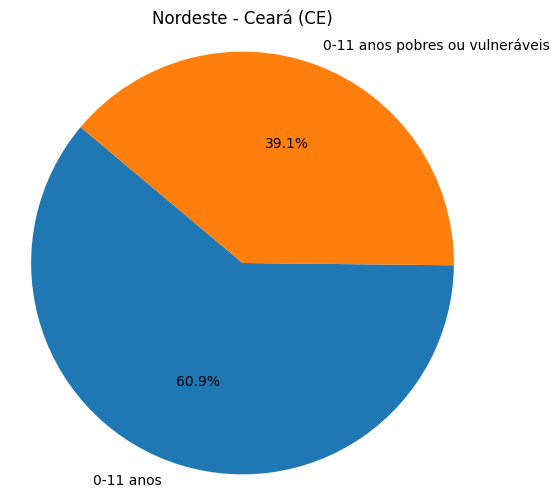

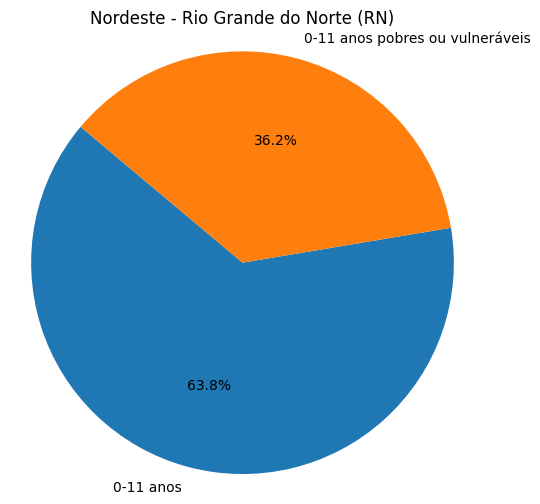

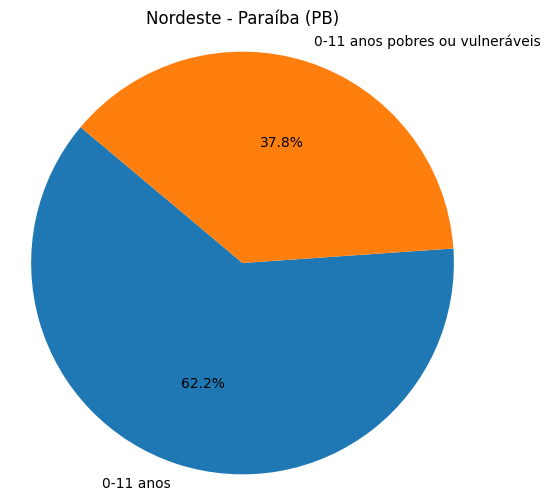

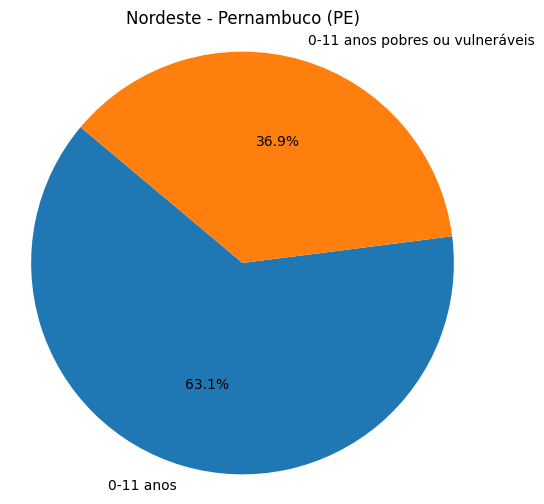

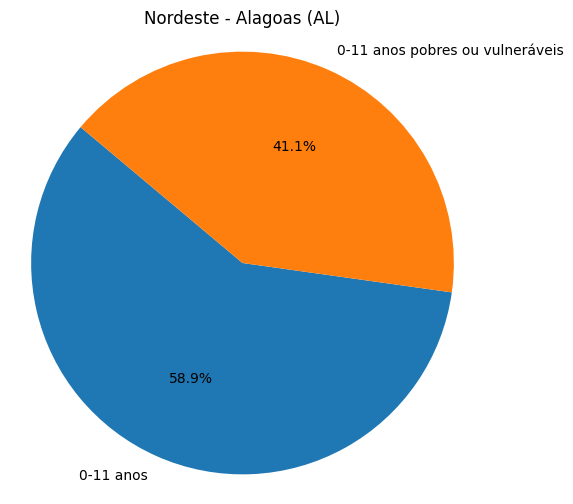

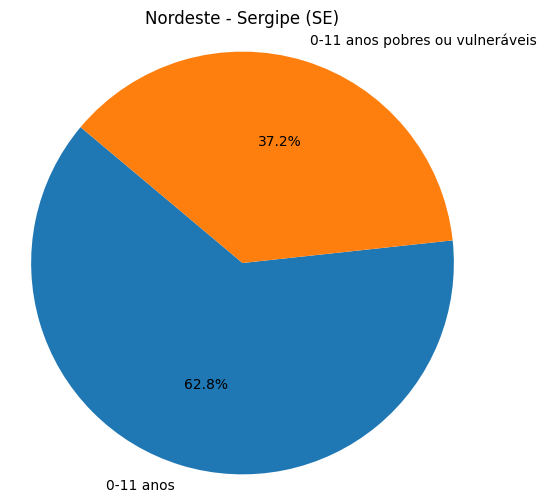

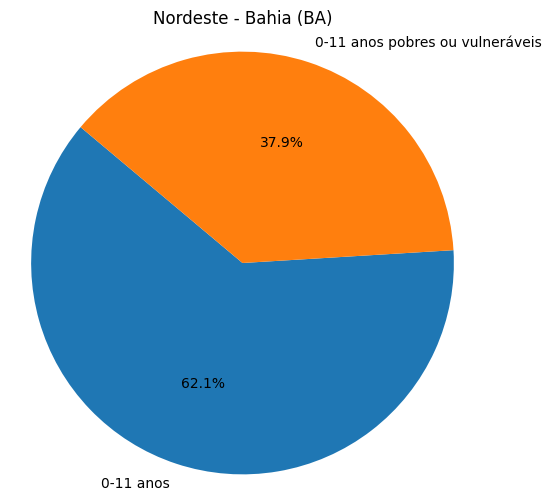

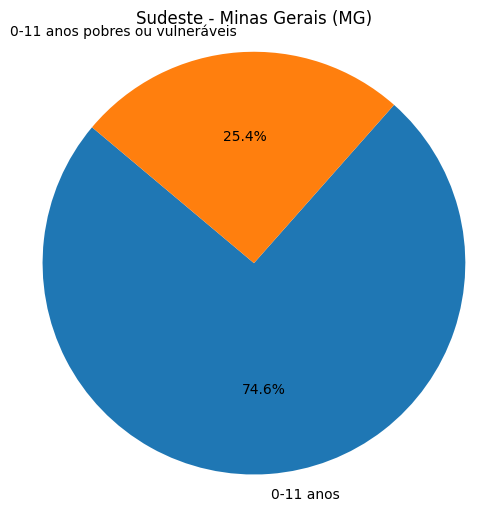

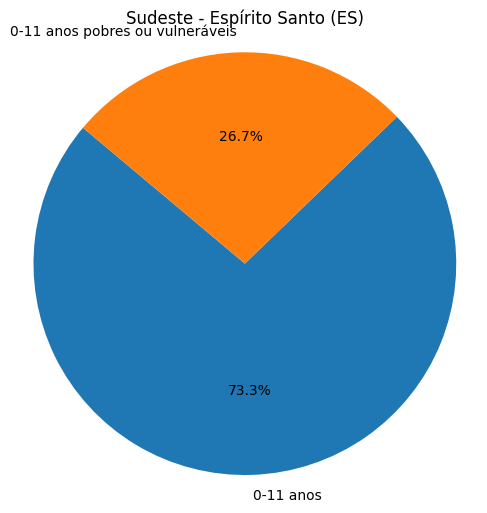

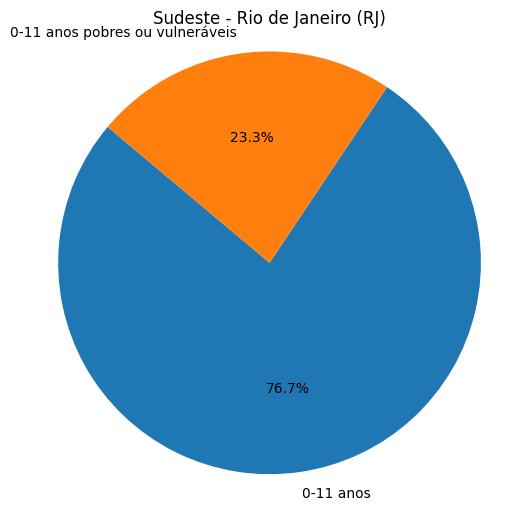

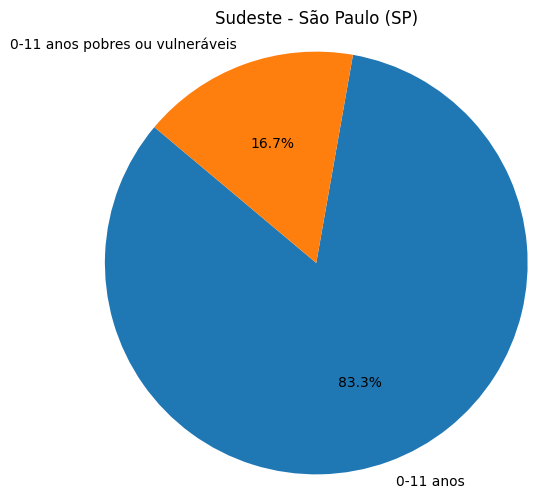

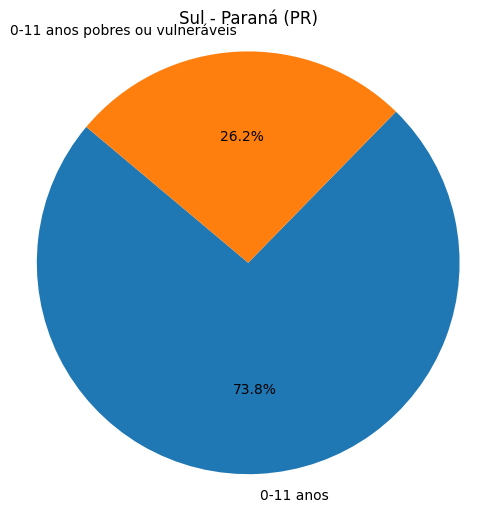

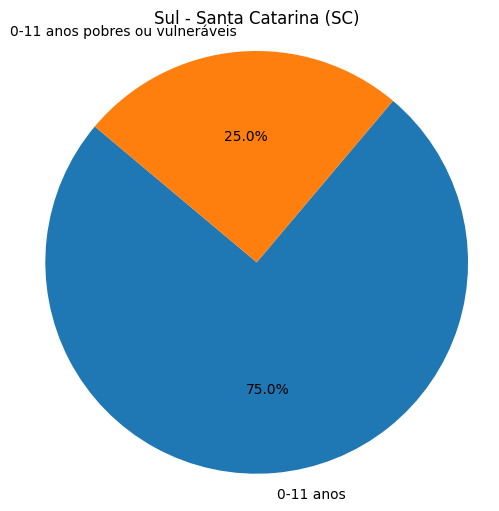

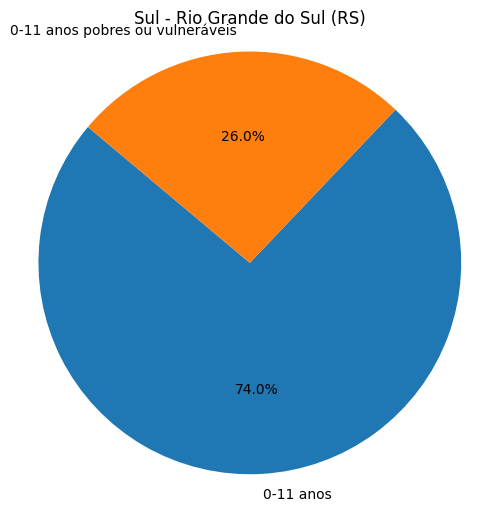

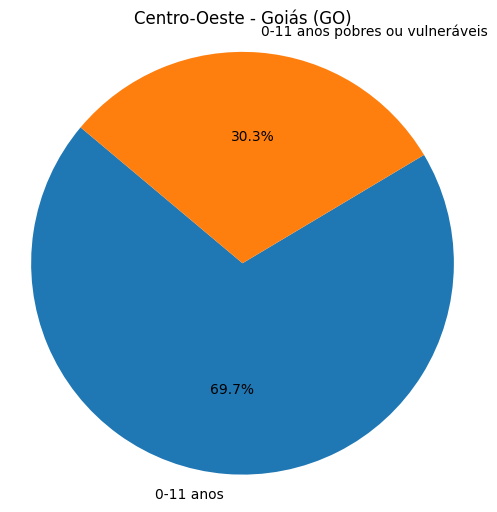

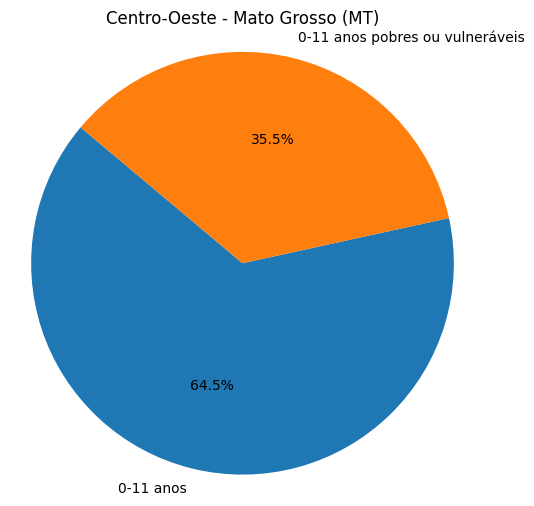

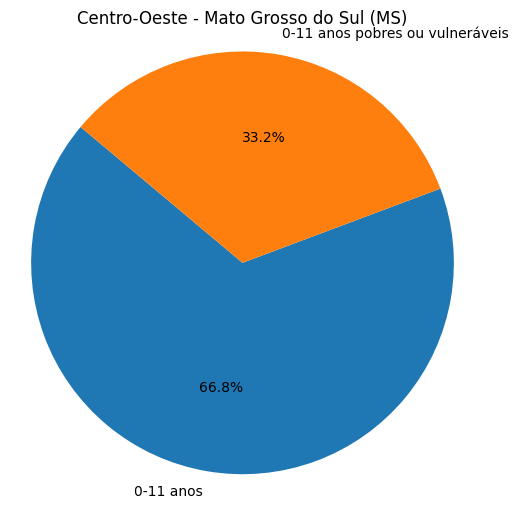

In [114]:

# Lista de DataFrames das regiões
regioes = [regiao_norte, regiao_nordeste, regiao_sudeste, regiao_sul, regiao_centro_oeste]

# Títulos das regiões
titulos = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

# Nomes das colunas que você deseja plotar
coluna_qtd_0a11 = 'qtd_0a11'
coluna_qtd_0a11_pob_vul = 'qtd_0a11_pob_vul'

# Loop para criar gráficos de pizza para as colunas 'qtd_0a11' e 'qtd_0a11_pob_vul' em cada estado de cada região
for regiao, titulo in zip(regioes, titulos):
    for estado in regiao.keys():
        # Crie um gráfico de pizza para as colunas 'qtd_0a11' e 'qtd_0a11_pob_vul' em cada estado
        estado_dataframe = regiao[estado]
        if coluna_qtd_0a11 in estado_dataframe.columns and coluna_qtd_0a11_pob_vul in estado_dataframe.columns:
            # Exclua a primeira linha (título)
            estado_dataframe = estado_dataframe.iloc[1:]

            # Calcule as somas
            qtd_0a11_sum = estado_dataframe[coluna_qtd_0a11].sum()
            qtd_0a11_pob_vul_sum = estado_dataframe[coluna_qtd_0a11_pob_vul].sum()

            # Crie um gráfico de pizza
            labels = ['0-11 anos', '0-11 anos pobres ou vulneráveis']
            sizes = [qtd_0a11_sum, qtd_0a11_pob_vul_sum]
            percentages = [qtd_0a11_sum / (qtd_0a11_sum + qtd_0a11_pob_vul_sum) * 100,
                           qtd_0a11_pob_vul_sum / (qtd_0a11_sum + qtd_0a11_pob_vul_sum) * 100]

            plt.figure(figsize=(6, 6))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.axis('equal')  # O gráfico de pizza aparecerá como um círculo.
            plt.title(f'{titulo} - {estado}')


            # Exiba as porcentagens fora do gráfico
            for i, label in enumerate(labels):
                print(f'{titulo} - {estado} - {label}: {percentages[i]:.1f}%')


In [130]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Suponha que 'regiao_norte' seja um DataFrame da região norte com as colunas 'qtd_dom_E1' e 'qtd_0a11_pob_vul'.
# Certifique-se de que seus dados estejam preparados e divididos em treinamento e teste.

# Selecionar as variáveis independentes (X) e a variável dependente (y)
X = dados_sp['qtd_0a11_pob_vul'].values.reshape(-1, 1)  # Reshape para a forma correta
y = dados_sp['qtd_0a11_pob_vul']

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X, y)

# Fazer previsões
previsoes = modelo.predict(X)

# Calcular a correlação (coeficiente de correlação de Pearson)
correlacao = regiao_norte['qtd_dom_E1'].corr(regiao_norte['qtd_0a11_pob_vul'])

# Plotar o gráfico de dispersão com a linha de regressão
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, previsoes, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('qtd_dom_E1')
plt.ylabel('qtd_0a11_pob_vul')
plt.title(f'Correlação: {correlacao:.2f}')
plt.legend()
plt.show()


KeyError: ignored

In [135]:
dados_sp.describe


<bound method NDFrame.describe of        cod_mun  raca   qtd_pessoas  qtd_pes_pobres  qtd_pes_vulneraveis  \
14884  3500105     1  25019.629308     1060.970540          1259.376632   
14885  3500105     2    754.481861       23.713187            56.215746   
14886  3500105     3    716.950546        4.690886             9.476426   
14887  3500105     4   7292.731352      547.573442           813.028714   
14889  3500204     1   2993.521969      175.867933           157.371532   
...        ...   ...           ...             ...                  ...   
17903  3557204     2    614.770069       79.185343           144.304805   
17905  3557204     4   3167.827644      245.155178           406.578219   
17907  3557303     1   7871.546353      442.562909           666.451649   
17908  3557303     2    210.118671        5.955287             0.000000   
17910  3557303     4   1909.562967      319.742654           204.892358   

       qtd_pes_pob_vul     qtd_0a11  qtd_0a11_pobres  qtd_0a11_vu

In [134]:
dados_sp['qtd_0a11_vulneraveis']


14884    218.564511
14885      0.000000
14886      0.000000
14887    171.963673
14889     38.502487
            ...    
17903     22.908197
17905    107.074761
17907    150.513623
17908      0.000000
17910     34.141508
Name: qtd_0a11_vulneraveis, Length: 2387, dtype: float64